<a href="https://colab.research.google.com/github/BhanuSrihridai/British-Airways/blob/main/Task_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [917]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings("ignore")

- **`num_passengers`** = number of passengers travelling
- **`sales_channel`** = sales channel booking was made on
- **`trip_type`** = trip Type (Round Trip, One Way, Circle Trip)
- **`purchase_lead`** = number of days between travel date and booking date
- **`length_of_stay`** = number of days spent at destination
- **`flight_hour`** = hour of flight departure
- **`flight_day`** = day of week of flight departure
- **`route`** = origin -> destination flight route
- **`booking_origin`** = country from where booking was made
- **`wants_extra_baggage`** = if the customer wanted extra baggage in the booking
- **`wants_preferred_seat`** = if the customer wanted a preferred seat in the booking
- **`wants_in_flight_meals`** = if the customer wanted in-flight meals in the booking
- **`flight_duration`** = total duration of flight (in hours)
- **`booking_complete`** = flag indicating if the customer completed the booking

# **Glimpse of the data**

In [918]:
data=pd.read_csv("customer_booking.csv",encoding="ISO-8859-1")
data.head()

num_passengers sales_channel  trip_type  purchase_lead  length_of_stay  \
0               2      Internet  RoundTrip            262              19   
1               1      Internet  RoundTrip            112              20   
2               2      Internet  RoundTrip            243              22   
3               1      Internet  RoundTrip             96              31   
4               2      Internet  RoundTrip             68              22   

   flight_hour flight_day   route booking_origin  wants_extra_baggage  \
0            7        Sat  AKLDEL    New Zealand                    1   
1            3        Sat  AKLDEL    New Zealand                    0   
2           17        Wed  AKLDEL          India                    1   
3            4        Sat  AKLDEL    New Zealand                    0   
4           15        Wed  AKLDEL          India                    1   

   wants_preferred_seat  wants_in_flight_meals  flight_duration  \
0                     0                      0             5.52   
1                     0                      0             5.52   
2                     1                      0             5.52   
3                     0                      1             5.52   
4                     0                      1             5.52   

   booking_complete  
0                 0  
1                 0  
2                 0  
3                 0  
4                 0

In [919]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num_passengers         50000 non-null  int64  
 1   sales_channel          50000 non-null  object 
 2   trip_type              50000 non-null  object 
 3   purchase_lead          50000 non-null  int64  
 4   length_of_stay         50000 non-null  int64  
 5   flight_hour            50000 non-null  int64  
 6   flight_day             50000 non-null  object 
 7   route                  50000 non-null  object 
 8   booking_origin         50000 non-null  object 
 9   wants_extra_baggage    50000 non-null  int64  
 10  wants_preferred_seat   50000 non-null  int64  
 11  wants_in_flight_meals  50000 non-null  int64  
 12  flight_duration        50000 non-null  float64
 13  booking_complete       50000 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.3+ 

In [920]:
data.shape

(50000, 14)

In [921]:
data.head().style.bar(cmap='hsv',height=80,width=90)

In [922]:
data.describe()

num_passengers  purchase_lead  length_of_stay  flight_hour  \
count    50000.000000   50000.000000     50000.00000  50000.00000   
mean         1.591240      84.940480        23.04456      9.06634   
std          1.020165      90.451378        33.88767      5.41266   
min          1.000000       0.000000         0.00000      0.00000   
25%          1.000000      21.000000         5.00000      5.00000   
50%          1.000000      51.000000        17.00000      9.00000   
75%          2.000000     115.000000        28.00000     13.00000   
max          9.000000     867.000000       778.00000     23.00000   

       wants_extra_baggage  wants_preferred_seat  wants_in_flight_meals  \
count         50000.000000          50000.000000           50000.000000   
mean              0.668780              0.296960               0.427140   
std               0.470657              0.456923               0.494668   
min               0.000000              0.000000               0.000000   
25%               0.000000              0.000000               0.000000   
50%               1.000000              0.000000               0.000000   
75%               1.000000              1.000000               1.000000   
max               1.000000              1.000000               1.000000   

       flight_duration  booking_complete  
count     50000.000000      50000.000000  
mean          7.277561          0.149560  
std           1.496863          0.356643  
min           4.670000          0.000000  
25%           5.620000          0.000000  
50%           7.570000          0.000000  
75%           8.830000          0.000000  
max           9.500000          1.000000

In [923]:
data.dtypes

num_passengers             int64
sales_channel             object
trip_type                 object
purchase_lead              int64
length_of_stay             int64
flight_hour                int64
flight_day                object
route                     object
booking_origin            object
wants_extra_baggage        int64
wants_preferred_seat       int64
wants_in_flight_meals      int64
flight_duration          float64
booking_complete           int64
dtype: object

In [924]:
cat_cols=data.select_dtypes(include='object').columns
cat_cols

Index(['sales_channel', 'trip_type', 'flight_day', 'route', 'booking_origin'], dtype='object')

In [925]:
cntns_cols=data.select_dtypes(include=['int64','float64']).columns
cntns_cols

Index(['num_passengers', 'purchase_lead', 'length_of_stay', 'flight_hour',
       'wants_extra_baggage', 'wants_preferred_seat', 'wants_in_flight_meals',
       'flight_duration', 'booking_complete'],
      dtype='object')

In [926]:
for colum in cat_cols:
  unique_types=data[colum].value_counts()
  print(f"\nIndividual Counts of {colum}:\n",unique_types)


Individual Counts of sales_channel:
 Internet    44382
Mobile       5618
Name: sales_channel, dtype: int64

Individual Counts of trip_type:
 RoundTrip     49497
OneWay          387
CircleTrip      116
Name: trip_type, dtype: int64

Individual Counts of flight_day:
 Mon    8102
Wed    7674
Tue    7673
Thu    7424
Fri    6761
Sun    6554
Sat    5812
Name: flight_day, dtype: int64

Individual Counts of route:
 AKLKUL    2680
PENTPE     924
MELSGN     842
ICNSIN     801
DMKKIX     744
          ... 
LBUTPE       1
CXRMEL       1
DELKBR       1
KOSSYD       1
MRUXIY       1
Name: route, Length: 799, dtype: int64

Individual Counts of booking_origin:
 Australia               17872
Malaysia                 7174
South Korea              4559
Japan                    3885
China                    3387
                        ...  
Panama                      1
Tonga                       1
Tanzania                    1
Bulgaria                    1
Svalbard & Jan Mayen        1
Name: booking_o

In [927]:
len(data.route.unique())

799

In [928]:
len(data.booking_origin.unique())

104

In [929]:
data.num_passengers.value_counts()

1    31352
2    12804
3     2941
4     1784
5      561
6      289
7      114
8       89
9       66
Name: num_passengers, dtype: int64

In [930]:
data.wants_extra_baggage.value_counts()

1    33439
0    16561
Name: wants_extra_baggage, dtype: int64

In [931]:
data.wants_in_flight_meals.value_counts()


0    28643
1    21357
Name: wants_in_flight_meals, dtype: int64

In [932]:
data.wants_preferred_seat.value_counts()

0    35152
1    14848
Name: wants_preferred_seat, dtype: int64

In [933]:
data.booking_complete.value_counts()

0    42522
1     7478
Name: booking_complete, dtype: int64

In [934]:
data.duplicated().sum()

719

In [935]:
data[data.duplicated()].head()

num_passengers sales_channel  trip_type  purchase_lead  length_of_stay  \
196               5      Internet  RoundTrip            206              17   
316               5      Internet  RoundTrip            206              17   
384               5      Internet  RoundTrip            206              17   
456               1      Internet  RoundTrip             30              85   
513               3      Internet  RoundTrip            109              20   

     flight_hour flight_day   route booking_origin  wants_extra_baggage  \
196           13        Sun  AKLKUL       Malaysia                    1   
316           13        Sun  AKLKUL       Malaysia                    1   
384           13        Sun  AKLKUL       Malaysia                    1   
456           15        Fri  AKLKUL       Malaysia                    1   
513            4        Tue  AKLKUL      Singapore                    1   

     wants_preferred_seat  wants_in_flight_meals  flight_duration  \
196                     0                      0             8.83   
316                     0                      0             8.83   
384                     0                      0             8.83   
456                     0                      0             8.83   
513                     0                      1             8.83   

     booking_complete  
196                 0  
316                 0  
384                 0  
456                 1  
513                 0

In [936]:
data.drop_duplicates(inplace=True)
data.shape

(49281, 14)

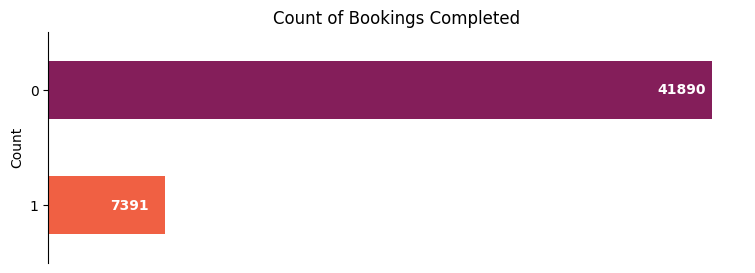

In [937]:
plt.figure(figsize=(9,3))

axes=sns.countplot(data=data,y='booking_complete',width=0.5,saturation=1,palette='rocket')
plt.title('Count of Bookings Completed')

plt.ylabel('Count')

axes.bar_label(axes.containers[0],color='white',padding=-40,fontweight='bold')                    # Setting the barlables, so that the count can be seen on the bars
axes.spines[['right','top','bottom']].set_visible(False)                                          # Removing the chart junk like boarders
axes.xaxis.set_visible(False)

**Data is *imbalanced!***

# **Data Cleaning & EDA**

In [938]:
data.head()

num_passengers sales_channel  trip_type  purchase_lead  length_of_stay  \
0               2      Internet  RoundTrip            262              19   
1               1      Internet  RoundTrip            112              20   
2               2      Internet  RoundTrip            243              22   
3               1      Internet  RoundTrip             96              31   
4               2      Internet  RoundTrip             68              22   

   flight_hour flight_day   route booking_origin  wants_extra_baggage  \
0            7        Sat  AKLDEL    New Zealand                    1   
1            3        Sat  AKLDEL    New Zealand                    0   
2           17        Wed  AKLDEL          India                    1   
3            4        Sat  AKLDEL    New Zealand                    0   
4           15        Wed  AKLDEL          India                    1   

   wants_preferred_seat  wants_in_flight_meals  flight_duration  \
0                     0                      0             5.52   
1                     0                      0             5.52   
2                     1                      0             5.52   
3                     0                      1             5.52   
4                     0                      1             5.52   

   booking_complete  
0                 0  
1                 0  
2                 0  
3                 0  
4                 0

In [939]:
cat_cols=list(cat_cols)
cat_cols

['sales_channel', 'trip_type', 'flight_day', 'route', 'booking_origin']

In [940]:
cntns_cols=list(cntns_cols)
cntns_cols

['num_passengers',
 'purchase_lead',
 'length_of_stay',
 'flight_hour',
 'wants_extra_baggage',
 'wants_preferred_seat',
 'wants_in_flight_meals',
 'flight_duration',
 'booking_complete']

In [941]:
cntns_cols[-5:-2]

['wants_extra_baggage', 'wants_preferred_seat', 'wants_in_flight_meals']

In [942]:
cat_cols.insert(0,'num_passengers')
cat_cols.extend(cntns_cols[-5:-2])
cntns_cols.remove('num_passengers')
cntns_cols.remove('wants_extra_baggage')
cntns_cols.remove('wants_preferred_seat')
cntns_cols.remove('wants_in_flight_meals')
cat_cols.remove('route')
cat_cols.remove('booking_origin')

cat_cols

['num_passengers',
 'sales_channel',
 'trip_type',
 'flight_day',
 'wants_extra_baggage',
 'wants_preferred_seat',
 'wants_in_flight_meals']

In [943]:
cntns_cols

['purchase_lead',
 'length_of_stay',
 'flight_hour',
 'flight_duration',
 'booking_complete']

### **No. of Passengers**

In [944]:
data.num_passengers.value_counts()

1    30879
2    12669
3     2882
4     1767
5      544
6      281
7      107
8       88
9       64
Name: num_passengers, dtype: int64

In [945]:
# data['num_passenges']=data['num_passengers'].map({1:'One',2:"Two",3:'Three',4:'Four',5:'Five',6:'Six',7:'Seven',8:'Eight',9:'Nine'})
data['num_passengers'] = data['num_passengers'].astype(str)
data['wants_extra_baggage']=data['wants_extra_baggage'].astype(str)
data['wants_in_flight_meals']=data['wants_in_flight_meals'].astype(str)
data['wants_preferred_seat']=data['wants_preferred_seat'].astype(str)

In [946]:
data.wants_extra_baggage.dtype

dtype('O')

Text(0, 0.5, 'No. of passengers')

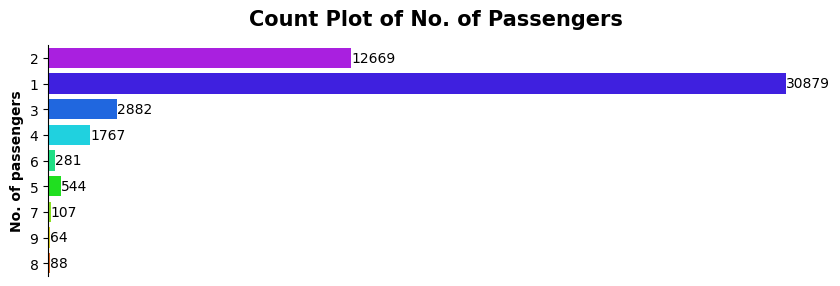

In [947]:
plt.figure(figsize=(10,3))
plot=sns.countplot(data=data,y='num_passengers',palette='gist_rainbow_r')
title="Count Plot of No. of Passengers"
plot.set_title(f"{title}",fontsize=15,fontweight='bold',y=1.05)
plot.bar_label(plot.containers[0])
plot.spines[['right','top','bottom']].set_visible(False)                                # Removing the chart junk
plot.xaxis.set_visible(False)
plt.ylabel('No. of passengers',fontweight='bold',fontsize=10)

Text(0.5, 0, 'No. of passengers')

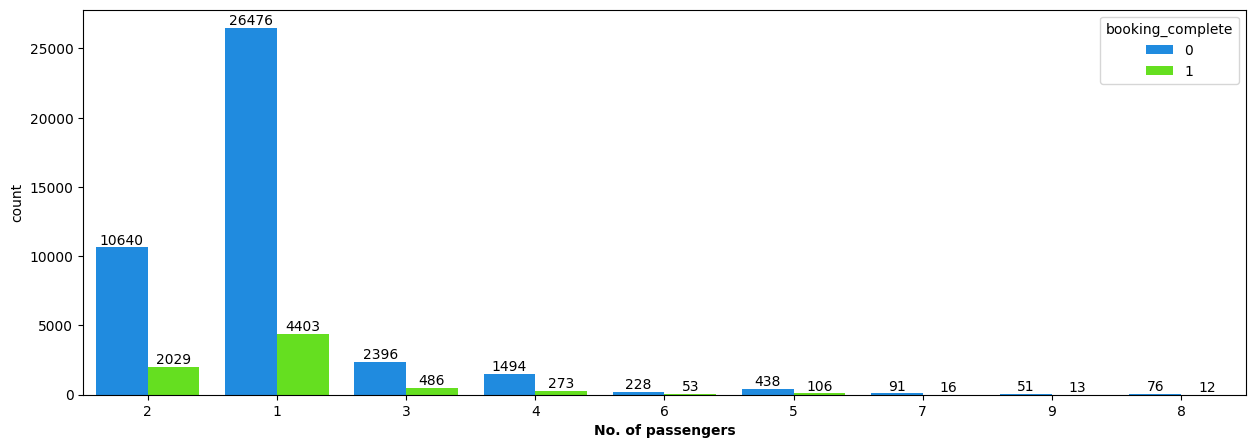

In [948]:
plt.figure(figsize=(15,5))
fig=sns.countplot(data=data,x='num_passengers',hue='booking_complete',palette='gist_rainbow_r')

for label in fig.containers:
  fig.bar_label(label)
plt.xlabel('No. of passengers',fontweight='bold')

In [949]:
passengers=pd.pivot_table(data=data,values='booking_complete',index='num_passengers').sort_values(by='booking_complete')
passengers['booking_complete']=passengers['booking_complete']*100
passengers.style.bar(cmap='inferno',height=70,props="width:40em;")

In [950]:
passengers.index

Index(['8', '1', '7', '4', '2', '3', '6', '5', '9'], dtype='object', name='num_passengers')

Text(0, 0.5, '')

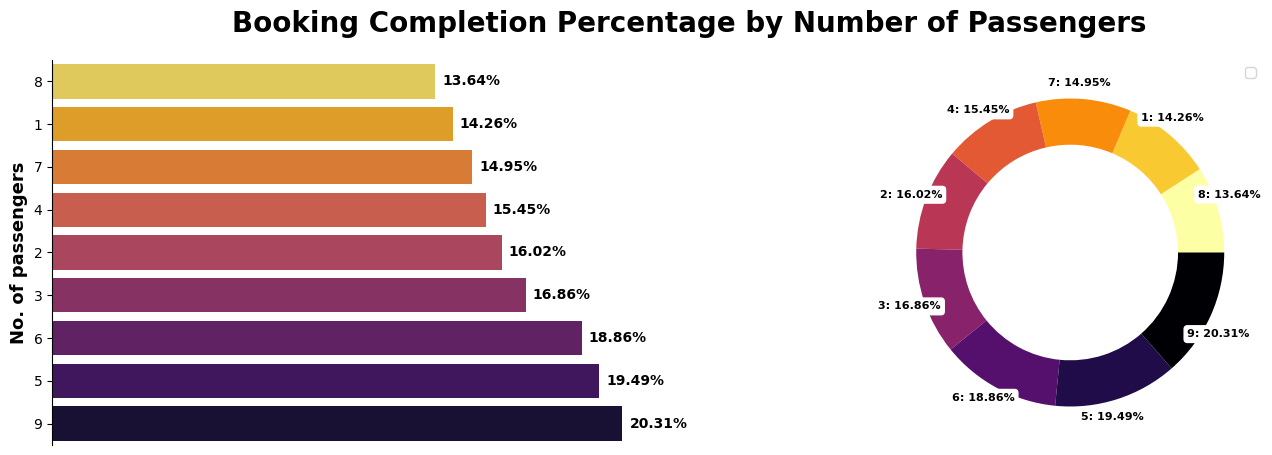

In [951]:
fig,axes=plt.subplots(1,2,figsize=(17,5))
plt.suptitle('Booking Completion Percentage by Number of Passengers',fontweight='bold',fontsize=20)

# Bar chart
axs=sns.barplot(data=passengers,y=passengers.index,x=passengers['booking_complete'],ax=axes[0],palette='inferno_r')
axs.bar_label(axs.containers[0],fmt='%.2f%%',fontweight='bold',padding=5)       # Setting bar labels with percentage of conversion
axes[0].spines[['right','top','bottom',]].set_visible(False)              # Removing the chart junk
axes[0].xaxis.set_visible(False)                                                # Hiding the x-axis
axs.set_ylabel("No. of passengers",fontweight='bold',fontsize=13)

# Pie chart
passengers.plot(kind='pie',subplots=True,ax=axes[1],cmap="inferno_r",labels=None,wedgeprops=dict(width=0.3))
# Extract values for plotting
values = passengers['booking_complete'].values
categories = passengers.index
# Manually add labels to the periphery
for i, (category, value) in enumerate(zip(categories, values)):
    angle = (360 * sum(values[:i])) / sum(values)+20
    x = 1.1 * np.cos(np.radians(angle))
    y = 1.1 * np.sin(np.radians(angle))

    plt.text(x, y, f"{category}: {value:.2f}%", ha='center', va='center', fontsize=8, bbox=dict(facecolor='white', edgecolor='white', boxstyle='round,pad=0.3'),fontweight='bold')


# passengers['booking_complete'].plot.pie(autopct='%1.2f%%', startangle=90, legend=False,cmap='inferno_r',wedgeprops=dict(width=0.3))

plt.ylabel("")                                                                  # Removing the ylabel on pie chart

# Setting the legend location
# plt.legend(loc='upper right',bbox_to_anchor=(1.7,0.9),title='Percentage')

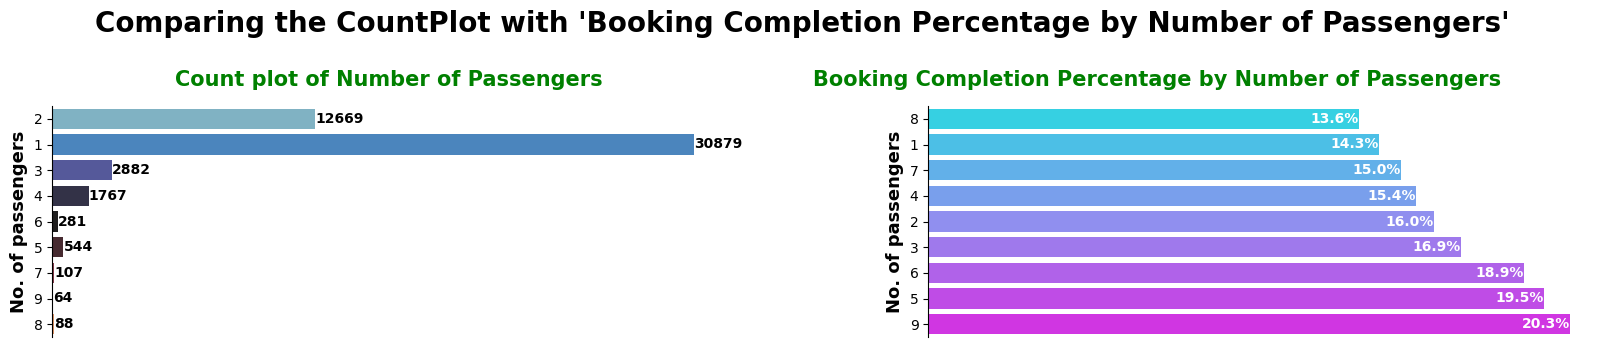

In [952]:
fig,axes=plt.subplots(1,2,figsize=(20,3))
sup_title="Comparing the CountPlot with 'Booking Completion Percentage by Number of Passengers'"
plt.suptitle(f"{sup_title}",fontweight='bold',fontsize=20,y=1.2)
fig.subplots_adjust(wspace=0.3)

# Bar Plot
bar_Plot=sns.barplot(data=passengers,y=passengers.index,x=passengers['booking_complete'],ax=axes[1],palette='cool')
bar_Plot.bar_label(bar_Plot.containers[0],fmt='%.1f%%',padding=-35,color='white',fontweight='bold')             # Setting bar labels with percentage of conversion
bar_Plot.set_title("Booking Completion Percentage by Number of Passengers",fontsize=15,fontweight='bold',x=0.34,y=1.05,color='green')      # Setting the title for subplot
bar_Plot.set_ylabel("No. of passengers",fontweight='bold',fontsize=13)                                                        # Setting the ylabel
axes[1].spines[['right','top','bottom']].set_visible(False)                                                     # Removing the chart junk
axes[1].xaxis.set_visible(False)                                                                                # Hiding the x-axis

# Count Plot
cnt_Plot=sns.countplot(data=data,y='num_passengers',palette='icefire',ax=axes[0])
cnt_Plot.bar_label(cnt_Plot.containers[0],fontweight='bold')                                                    # Setting bar labels with count
cnt_Plot.set_title("Count plot of Number of Passengers",fontsize=15,fontweight='bold',y=1.05,color='green')                      # Setting the title for subplot
cnt_Plot.set_ylabel("No. of passengers",fontweight='bold',fontsize=13)                                                        # Setting the ylabel
axes[0].spines[['right','top','bottom']].set_visible(False)                                                     # Removing the chart junk
axes[0].xaxis.set_visible(False)

In [953]:
data.columns

Index(['num_passengers', 'sales_channel', 'trip_type', 'purchase_lead',
       'length_of_stay', 'flight_hour', 'flight_day', 'route',
       'booking_origin', 'wants_extra_baggage', 'wants_preferred_seat',
       'wants_in_flight_meals', 'flight_duration', 'booking_complete'],
      dtype='object')

In [954]:
from logging import exception

# data = a DataFrame
# cat_cols = list of categorical column names in the DataFrame 'data'
# cont_cols = list of continuous column names in the DataFrame 'data'

class Plotting:

  def __init__(this):

    this._data=data
    this._cat_cols=cat_cols
    this._target='booking_complete'
    this._col_names={'num_passengers':'No. of passengers', 'sales_channel':'Sales channel', 'trip_type':'Trip type', 'purchase_lead':'Purchase lead',
       'length_of_stay':'Length of stay', 'flight_hour':'Flight hours', 'flight_day':'Flight day', 'route':'Route',
       'booking_origin':'Booking origin', 'wants_extra_baggage':'Wants extra baggage', 'wants_preferred_seat':'Wants preferred seat',
       'wants_in_flight_meals':'Wants in flight meals', 'flight_duration':'Flight duration'}

    this._palette=['crest','cubehelix','flare','afmhot','gist_earth','gist_heat','gist_rainbow','CMRmap','cool','inferno',
                    'viridis','rocket','magma','mako','icefire','seismic_r','crest','icefire','Set2','Set3','hsv']

    this._colours=['Accent','Accent_r','BrBG','PRGn','PRGn_r','PiYG','PiYG_r','PuBuGn','rainbow','rocket','viridis','CMRmap',
                  'PuBuGn_r','PuOr','PuOr_r','RdBu','RdBu_r','RdGy','RdGy_r', 'RdPu','RdPu_r','magma','mako','flare','icefire',
                  'RdYlBu','RdYlBu_r','RdYlGn','RdYlGn_r','Spectral','Accent','Dark2','Paired','Pastel1','Pastel2','Set1','Set2','Set3']

  def categorical_uni_variation(this):

    from numpy import random

    for x in this._cat_cols:

      num=random.randint(len(this._palette))

      plt.figure(figsize=(10,5))
      fig=sns.countplot(data=this._data,y=x,hue=this._target,palette=this._palette[num],saturation=1)
      for label in fig.containers:                                                                                # setting barlabels
        fig.bar_label(label)
      plt.ylabel(this._col_names[x],fontsize=12,labelpad=20,fontweight='bold')
      plt.ylabel(x,fontsize=12,labelpad=20,fontweight='bold')

      fig.spines[['right','top','bottom']].set_visible(False)                                                     # Removing the chart junk
      fig.xaxis.set_visible(False)                                                                                # Hiding the x-axis
      # print(this._palette[num])

  def categorical_Bi_variate_heatmap(this):

    from numpy import random

    try:

      for x in this._cat_cols:

        num=random.randint(len(this._colours))

        table=pd.pivot_table(data=this._data,values=this._target,index=x)
        table[this._target]=table[this._target]*100

        plt.figure(figsize=(8,4))
        sns.heatmap(data=table,annot=True,cmap=this._colours[num],cbar_kws={'label':"Booking Completion Percentage"}).figure.axes[-1].yaxis.label.set_size(15)
        plt.title(f"Heatmap showing Rate of Booking Completion in {this._col_names[x]} column",fontsize=15,fontweight='bold',pad=25)
        plt.xlabel("Booking Completion Percentage",fontsize=12,fontweight='bold',color='green')
        plt.ylabel(this._col_names[x],fontsize=12,labelpad=20,fontweight='bold',color='green')
        plt.xticks([]) # Removes x-ticks

    except:
      pass

  def categorical_Bi_variate_target(this):

    from numpy import random

    try:

      for x in  cat_cols:
        num1=random.randint(len(this._palette))
        num2=random.randint(len(this._colours))
        seperate=[0.03 for j in range(len(this._data[x].unique()))]                                     # A list of numerical values to be used for exploding the pie chart

        table=pd.pivot_table(data=this._data,values=this._target,index=x).sort_values(by=this._target)
        table[this._target]=table[this._target]*100

        fig,axes=plt.subplots(1,2,figsize=(16,5))
        sup_title=f"Booking completion percentage in {this._col_names[x]} column"
        plt.suptitle(sup_title,fontweight='bold',fontsize=20,y=1.01)
        fig.subplots_adjust(wspace=0.3)

        # Bar chart
        fig_Bar=sns.barplot(data=table,y=table.index,x=table[this._target],ax=axes[0])
        fig_Bar.bar_label(fig_Bar.containers[0],fmt='%.2f%%',fontweight='bold',padding=0)                  # Setting bar labels with percentage of conversion
        axes[0].spines[['right','top','bottom']].set_visible(False)                                    # Removing the chart junk
        axes[0].xaxis.set_visible(False)                                                               # Hiding the x-axis
        axes[0].set_position([0.1, 0.2, 0.4, 0.5])                                                     # Adjusting the subplot width, height

        fig_Bar.set_ylabel(f"{this._col_names[x]}",fontweight='bold',fontsize=13)

        # Pie chart
        table.plot(kind='pie',subplots=True,ax=axes[1],cmap=this._colours[num2],explode=seperate,wedgeprops=dict(width=0.3),labels=None)
        values = table['booking_complete'].values
        categories = table.index
        # Manually add labels to the periphery
        for i, (category, value) in enumerate(zip(categories, values)):
            angle = (360 * sum(values[:i])) / sum(values)+20
            x = 1.1 * np.cos(np.radians(angle))
            y = 1.1 * np.sin(np.radians(angle))
            plt.text(x, y, f"{category}: {value:.2f}%", ha='center', va='center', fontsize=8, bbox=dict(facecolor='white', edgecolor='white', boxstyle='round,pad=0.3'),fontweight='bold')

        plt.ylabel("")

        # Setting the legend location
        plt.legend(table.index,loc='upper right',bbox_to_anchor=(1.3,1.0),title='Percentage')

        # print(this._palette[num1],this._colours[num2])

    except:
      pass

  def categorical_Bi_variate_comparision(this):

    from numpy import random

    try:

      for category in cat_cols:

        num=random.randint(len(this._palette))
        table=pd.pivot_table(data=this._data,values=this._target,index=category).sort_values(by=this._target)
        table[this._target]=table[this._target]*100

        fig,axes=plt.subplots(1,2,figsize=(20,3))
        plt.suptitle(f"Comparing the CountPlot with 'Booking Completion Percentage by' {this._col_names[category]}",fontweight='bold',fontsize=20,y=1.2)
        fig.subplots_adjust(wspace=0.5) #hspace=0.125,                                                                            # Adjusting space between plots in subplot

        # Bar Plot
        bar_Plot=sns.barplot(data=table,y=table.index,x=table[this._target],ax=axes[1],palette='cool')
        bar_Plot.bar_label(bar_Plot.containers[0],fmt='%.1f%%',padding=-35,color='white',fontweight='bold')                       # Setting bar labels with percentage of conversion
        bar_Plot.set_title(f"Booking Completion Percentage in '{this._col_names[category]}' column",fontsize=15,fontweight='bold')       # Setting the title for subplot
        bar_Plot.set_ylabel(f"{this._col_names[category]}",fontweight='bold',fontsize=13)                                         # Setting the ylabel
        axes[1].spines[['right','top','bottom']].set_visible(False)                                                               # Removing the chart junk
        axes[1].xaxis.set_visible(False)                                                                                          # Hiding the x-axis

        # Count Plot
        cnt_Plot=sns.countplot(data=this._data,y=category,ax=axes[0],palette=this._palette[num])
        cnt_Plot.bar_label(cnt_Plot.containers[0],fontweight='bold')                                                              # Setting bar labels with count
        cnt_Plot.set_title(f"Count Plot of {this._col_names[category]} column",fontsize=15,fontweight='bold')                     # Setting the title for subplot
        cnt_Plot.set_ylabel(f"{this._col_names[category]}",fontweight='bold',fontsize=13)                                         # Setting the ylabel
        axes[0].spines[['right','top','bottom']].set_visible(False)                                                               # Removing the chart junk
        axes[0].xaxis.set_visible(False)                                                                                          # Hiding the x-axis

    except:
       pass

  def categorical_multi_variate_target(this):

      from itertools import combinations
      from numpy import random

      try:

        two_cat_combis=list(combinations(cat_cols,2))

        for x in two_cat_combis:

          num=random.randint(len(this._palette))

          table=this._data.pivot_table(index=x[0],columns=x[1],values=this._target)
          table=table.apply(lambda x : x*100)

          plt.figure(figsize=(15,8))
          fig=sns.heatmap(data=table,annot=True,fmt='.2f',cmap=this._palette[num],cbar_kws={'label':"Percentage of Conversion"}).figure.axes[-1].yaxis.label.set_size(20)

          title_string=f"Heatmap showing Rate of Booking Completion in the combination of {this._col_names[x[0]]} & {this._col_names[x[1]]}"
          plt.title(title_string,fontsize=20,fontweight='bold',pad=25)

          plt.xlabel(this._col_names[x[1]],fontsize=15,fontweight='bold',labelpad=5)
          plt.xticks(fontsize=13,rotation=45,ha='right')[1:-1]
          plt.ylabel(this._col_names[x[0]],fontsize=15,fontweight='bold',labelpad=20)
          plt.yticks(fontsize=13)
          plt.show()
      except:
        pass


In [955]:
plots=Plotting()

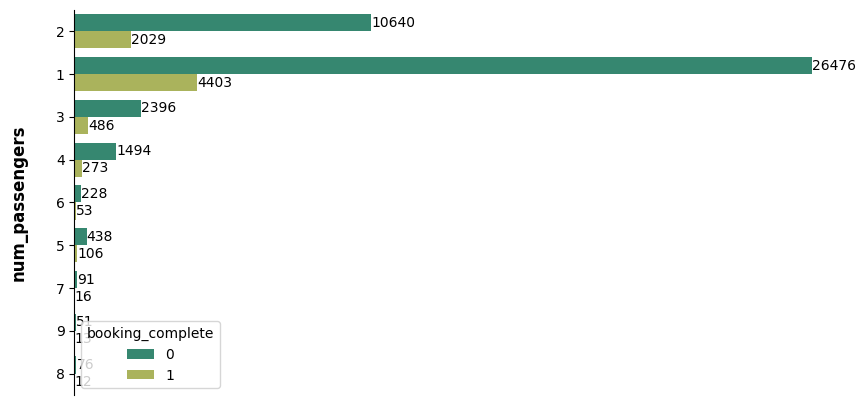

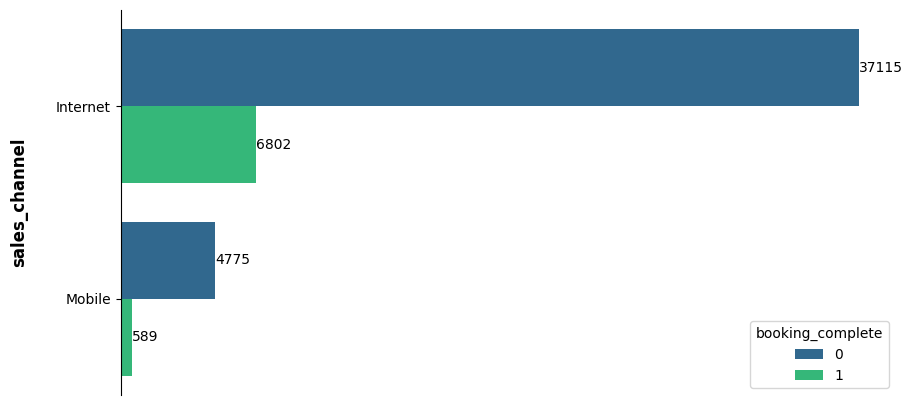

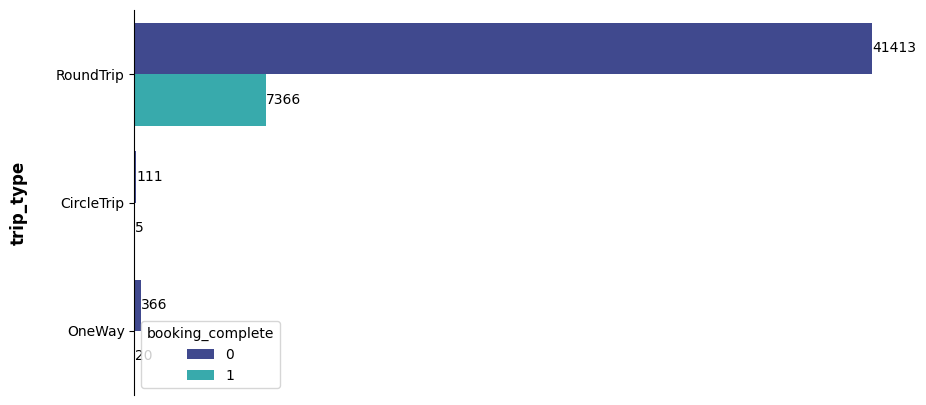

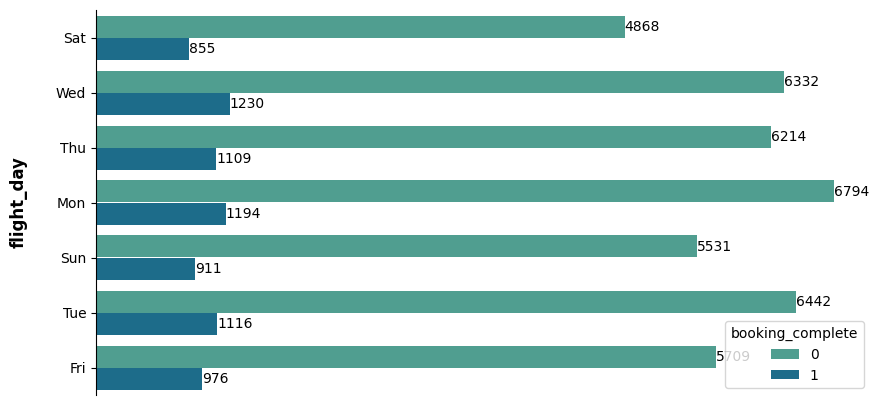

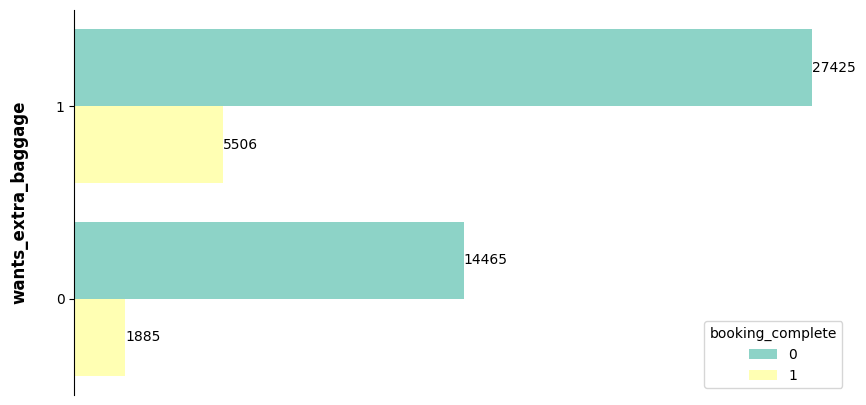

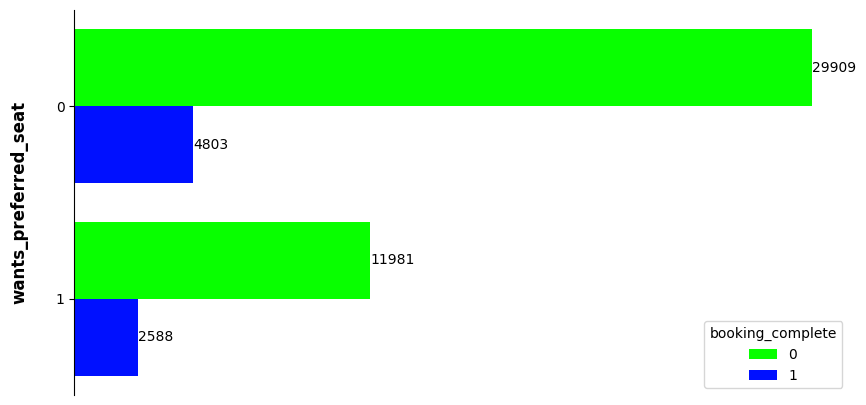

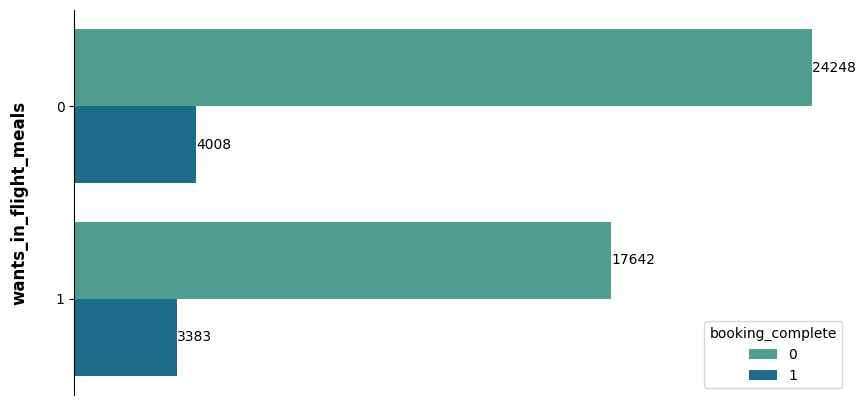

In [956]:
plots.categorical_uni_variation()

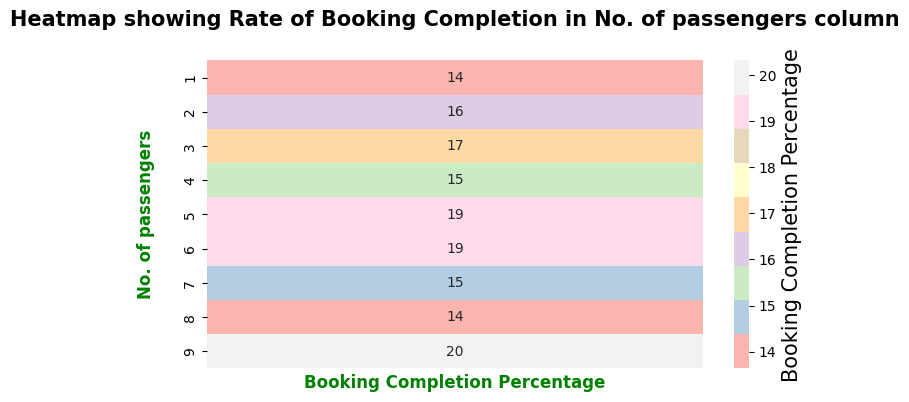

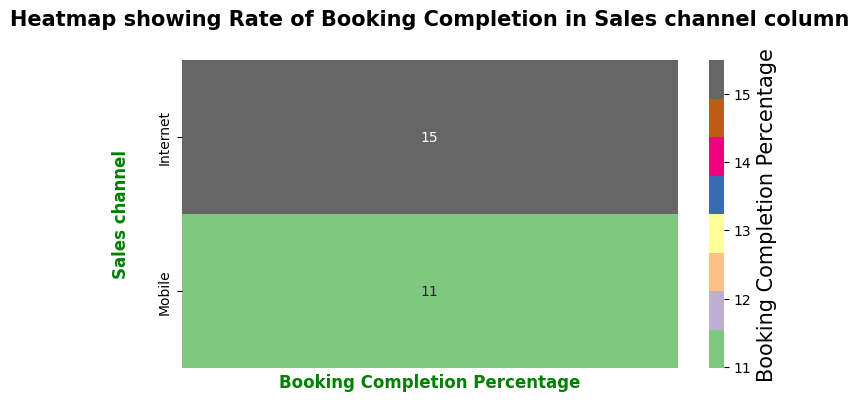

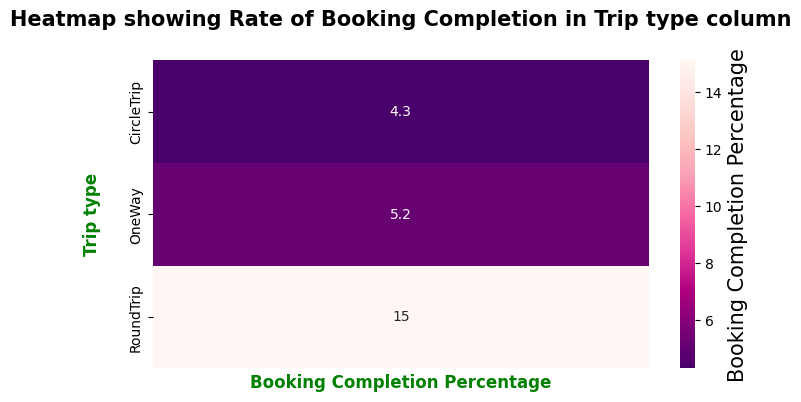

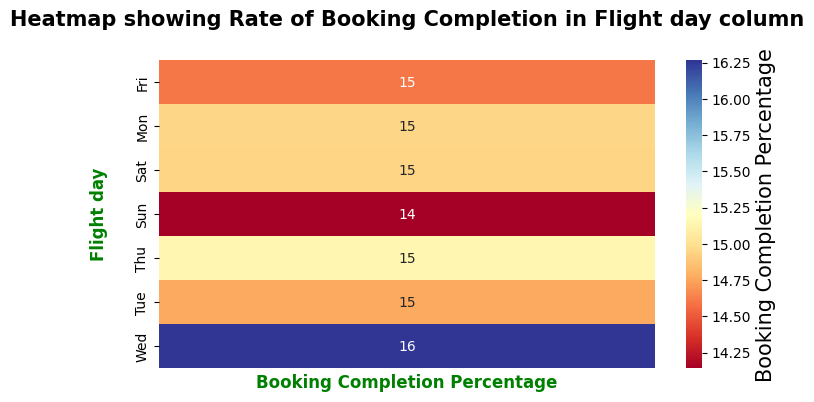

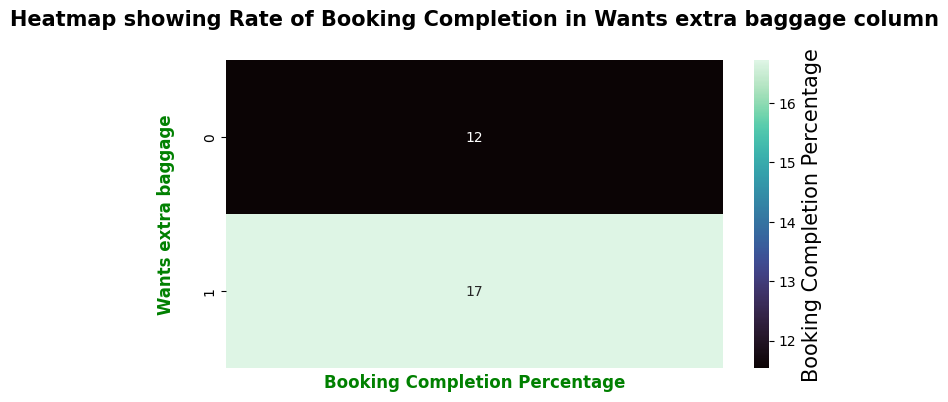

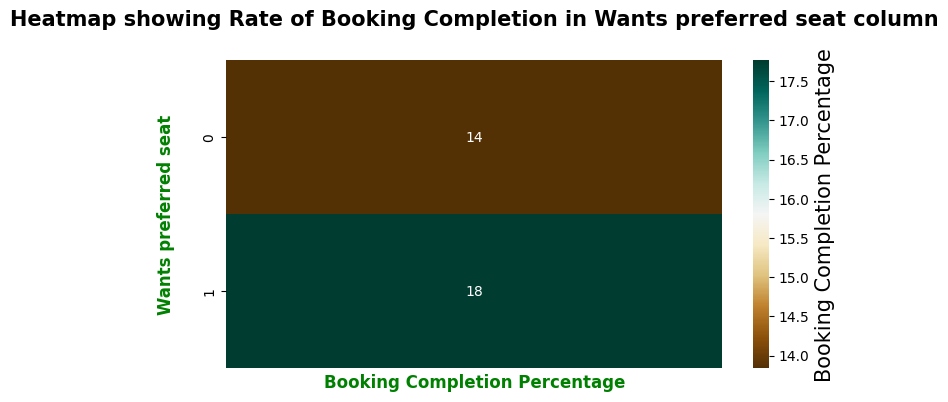

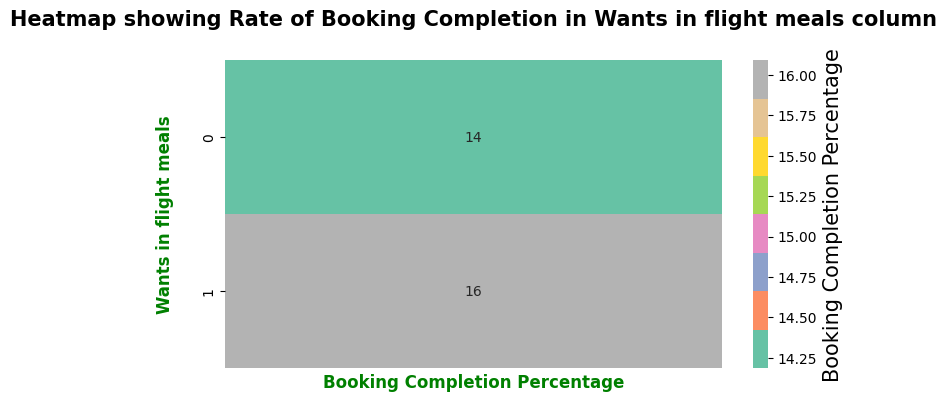

In [957]:
plots.categorical_Bi_variate_heatmap()

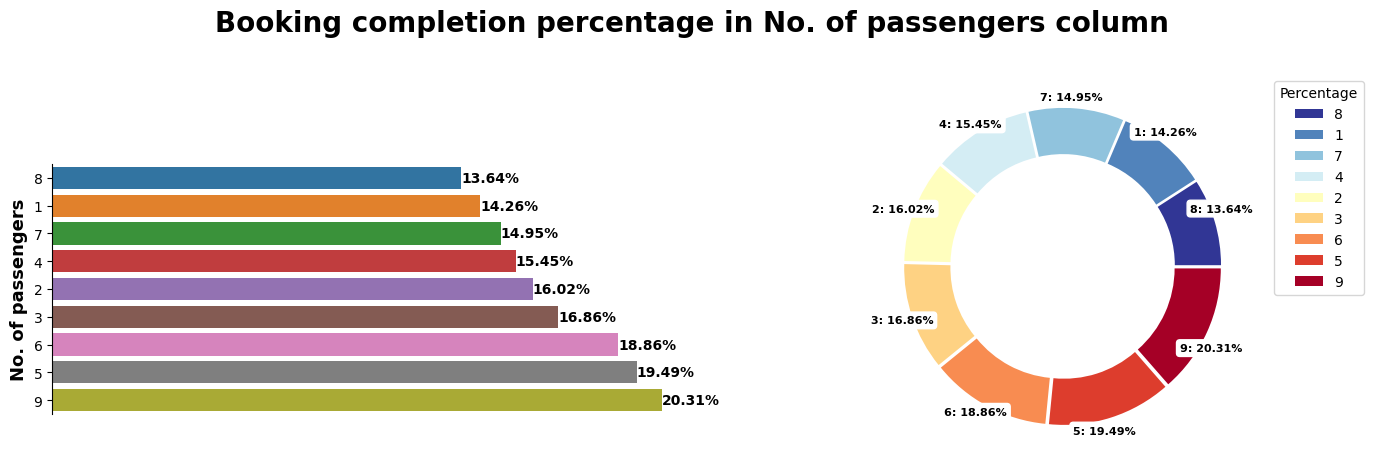

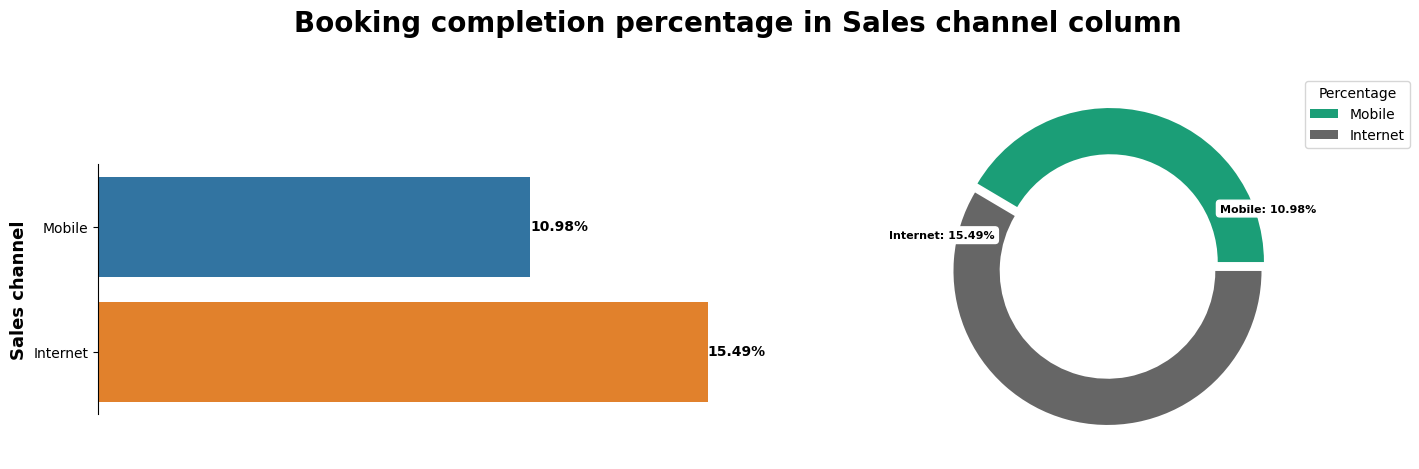

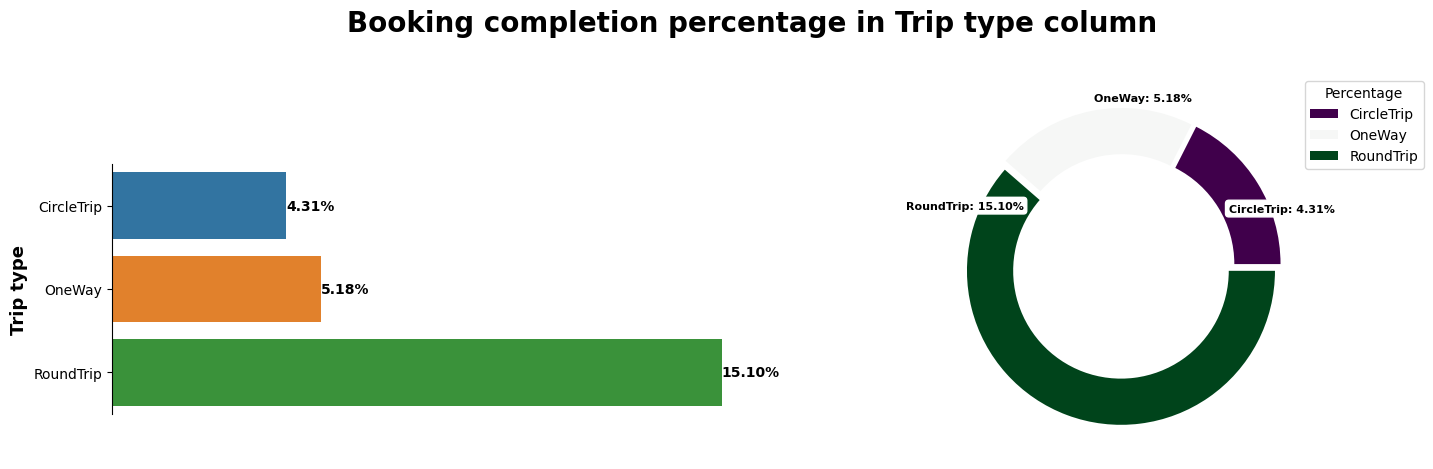

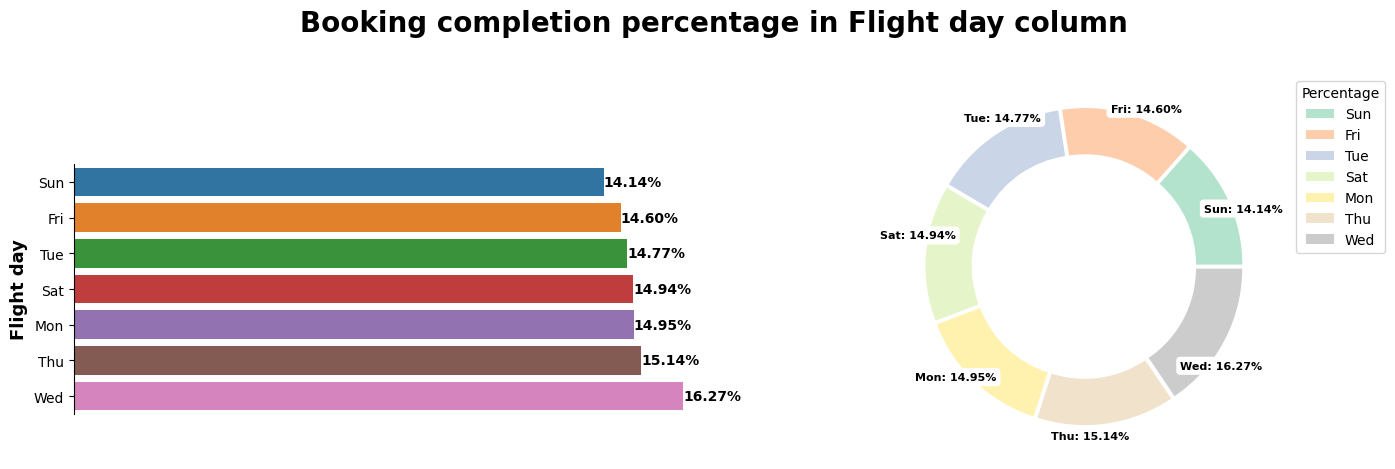

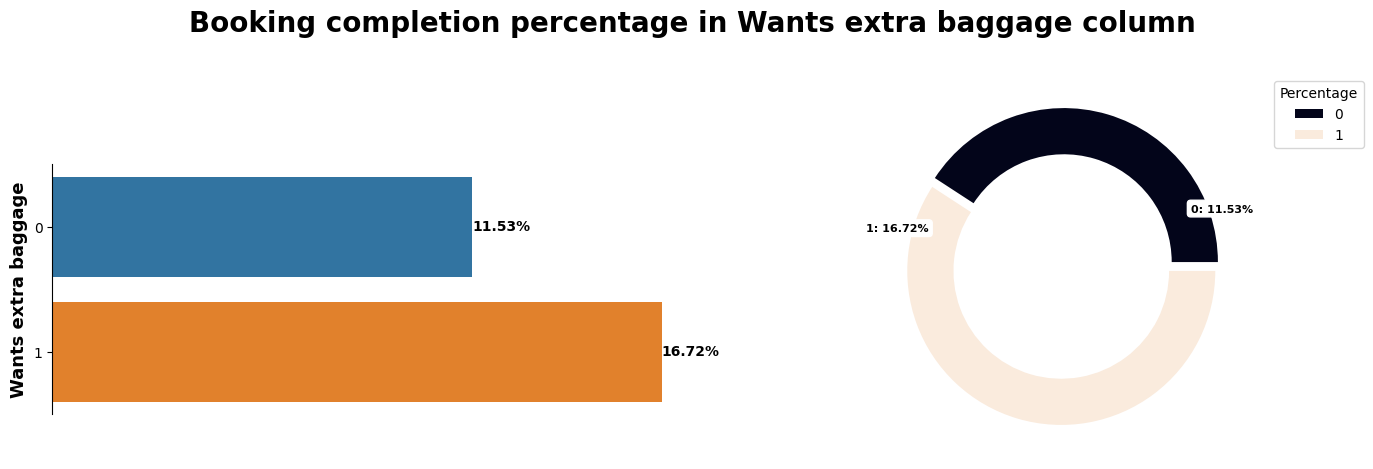

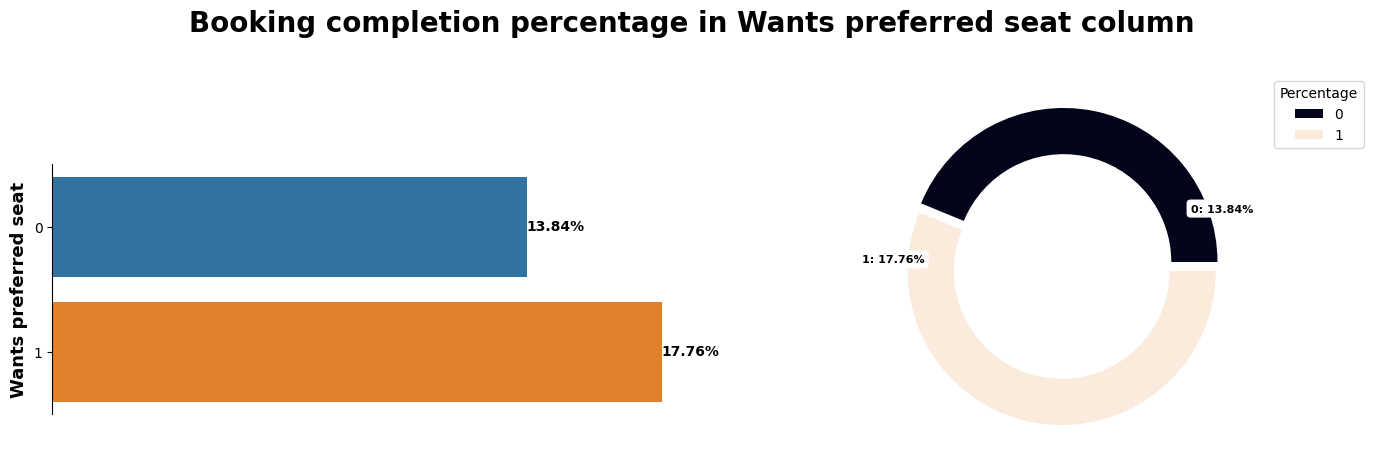

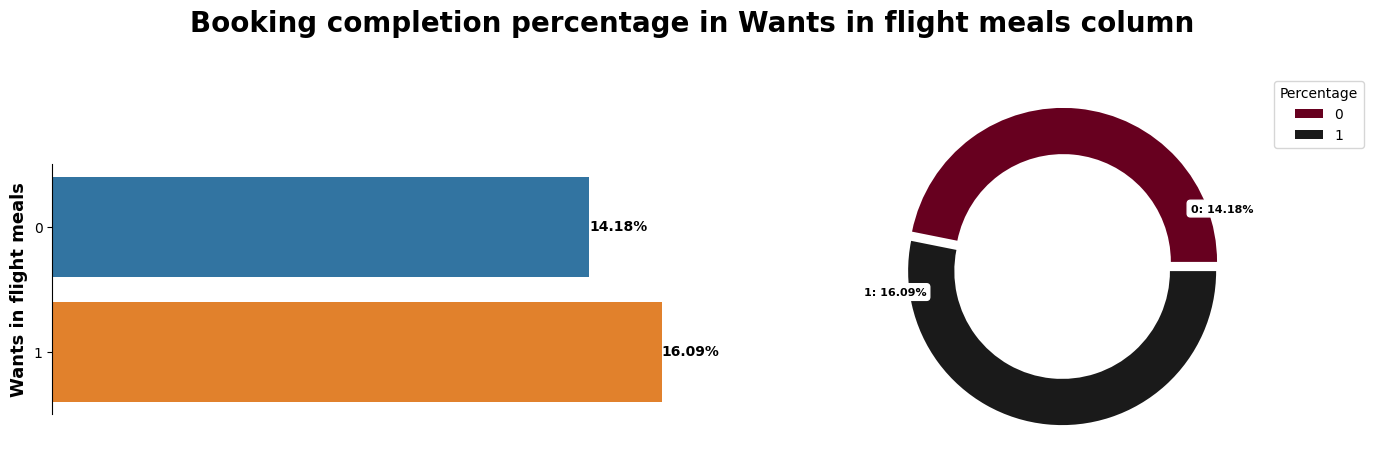

In [958]:
plots.categorical_Bi_variate_target()

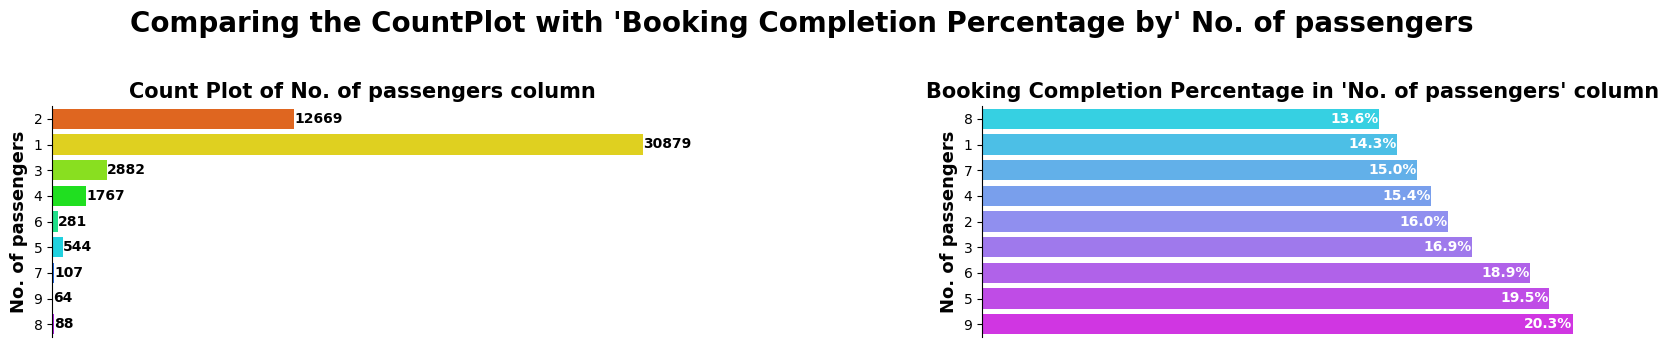

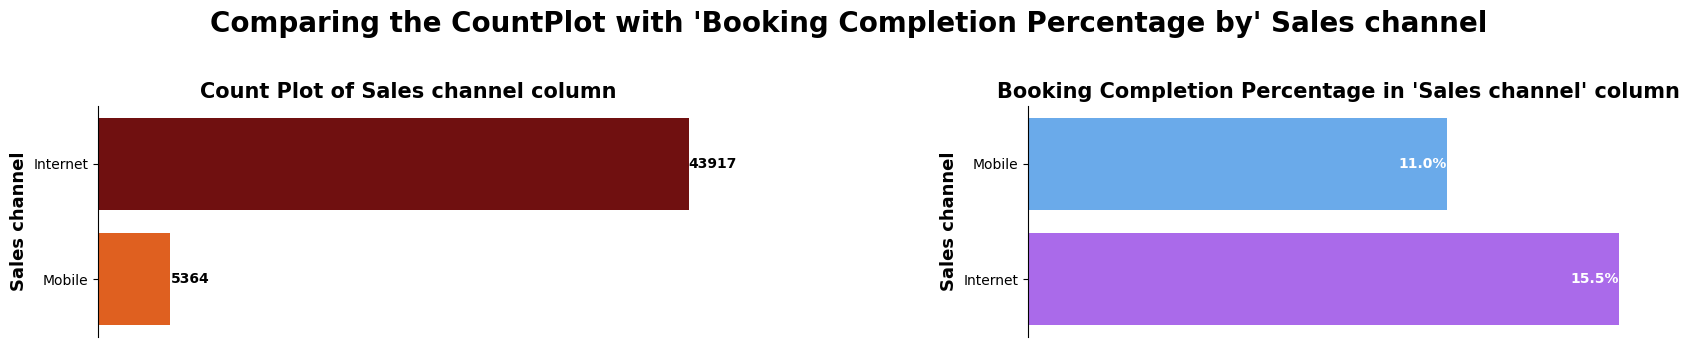

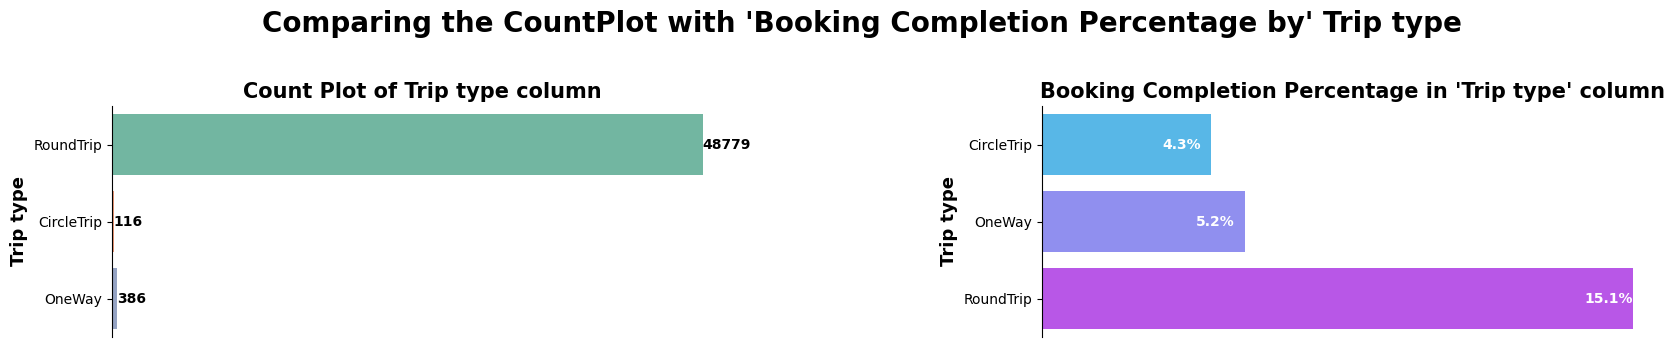

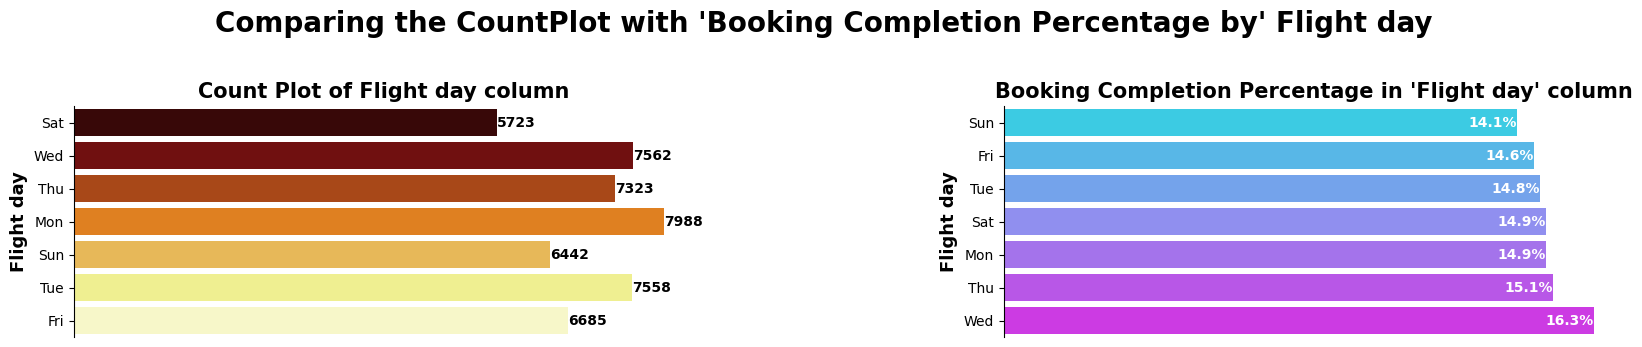

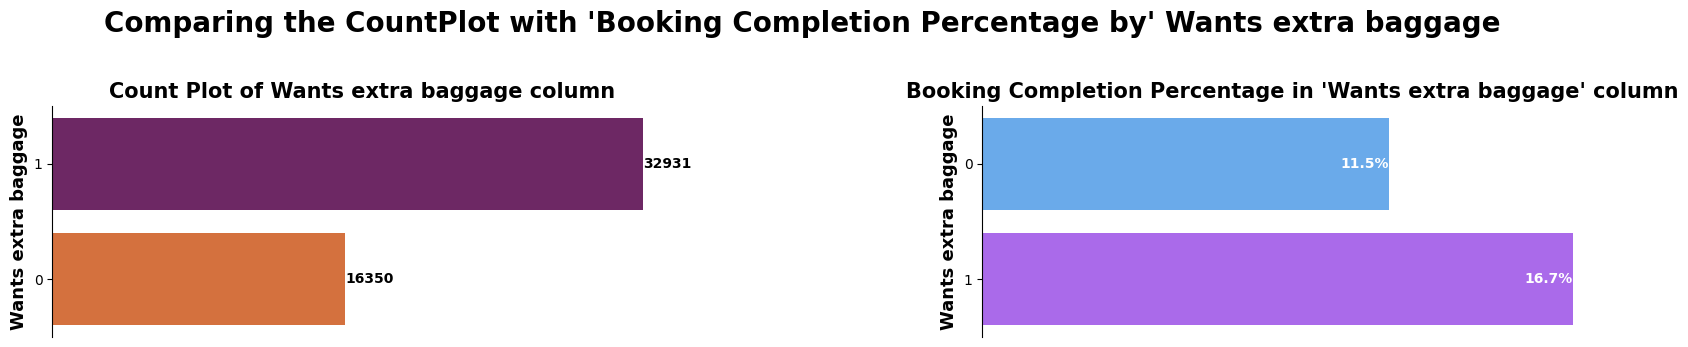

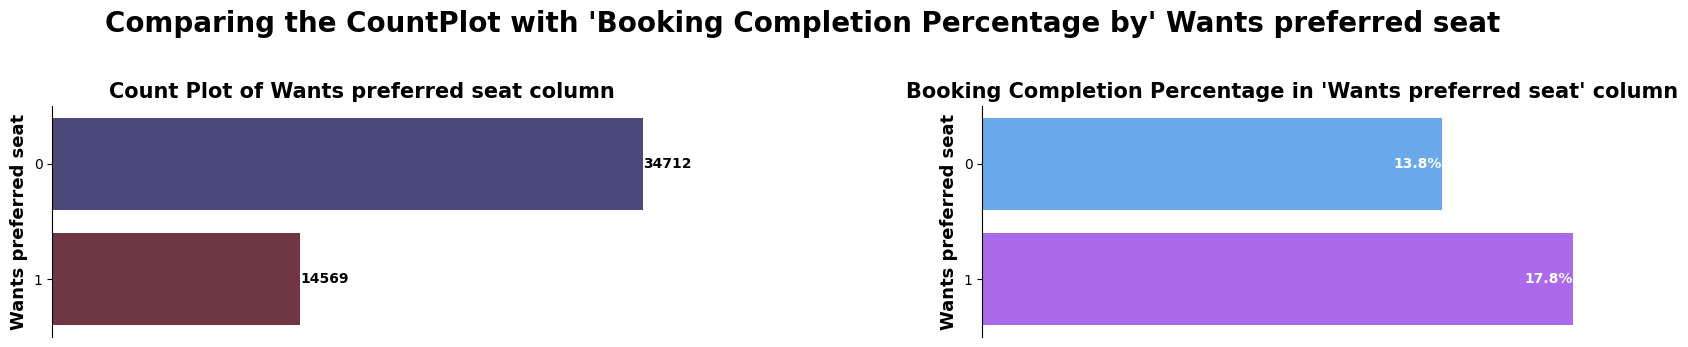

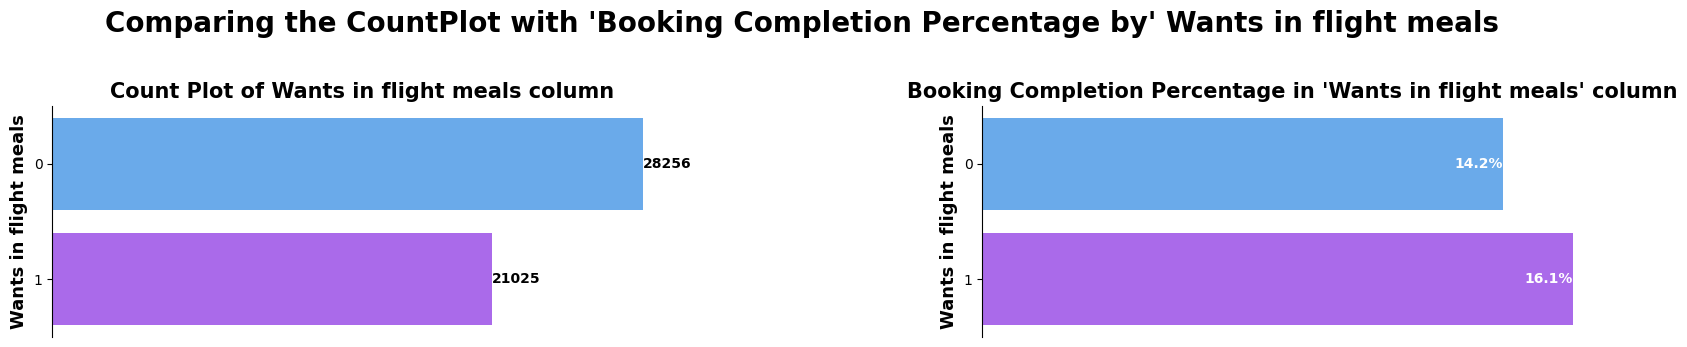

In [959]:
plots.categorical_Bi_variate_comparision()

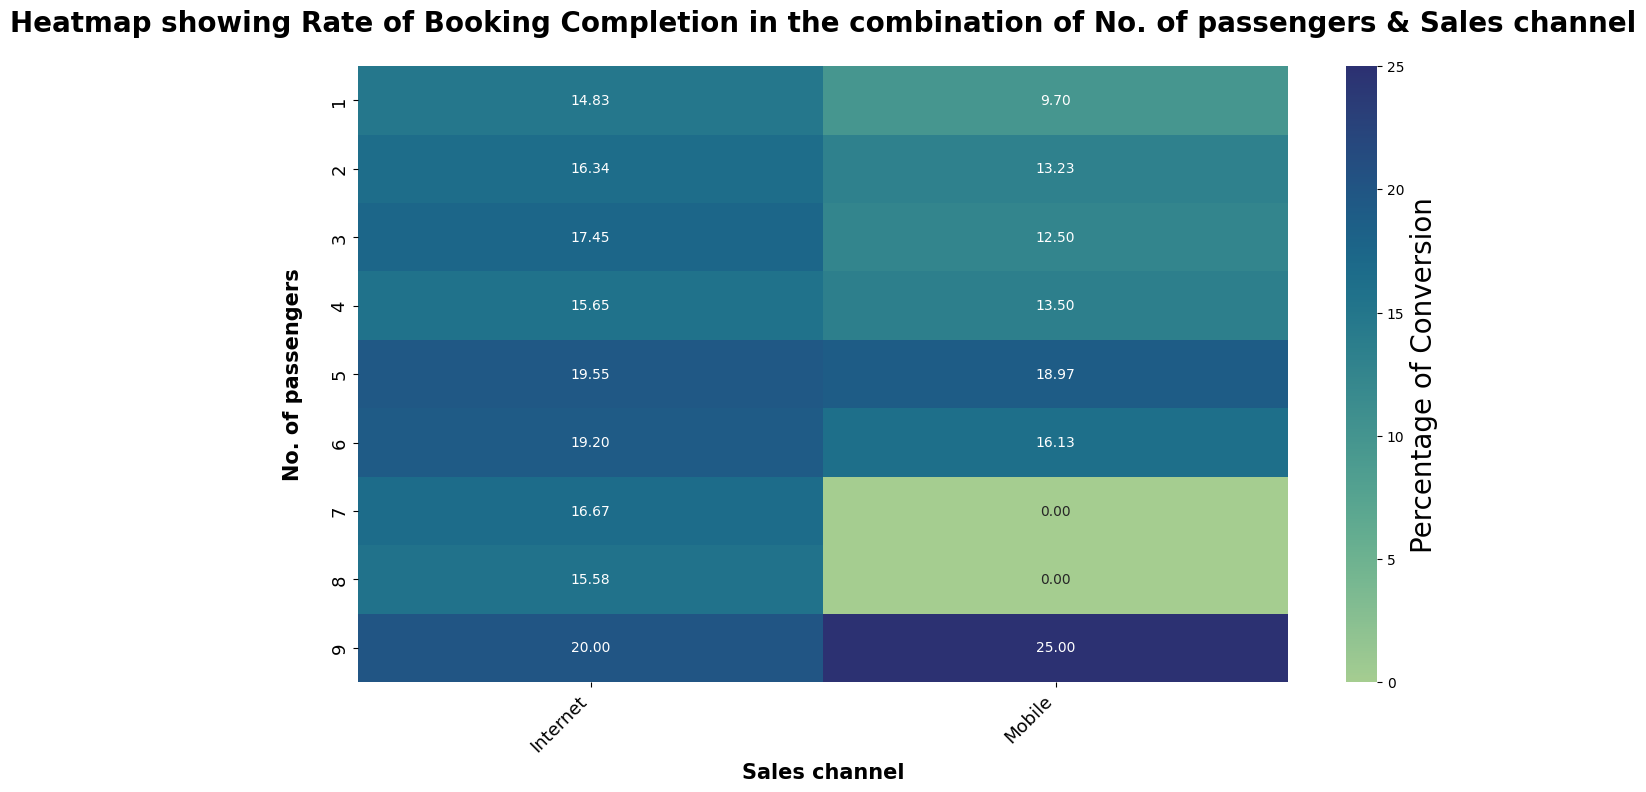

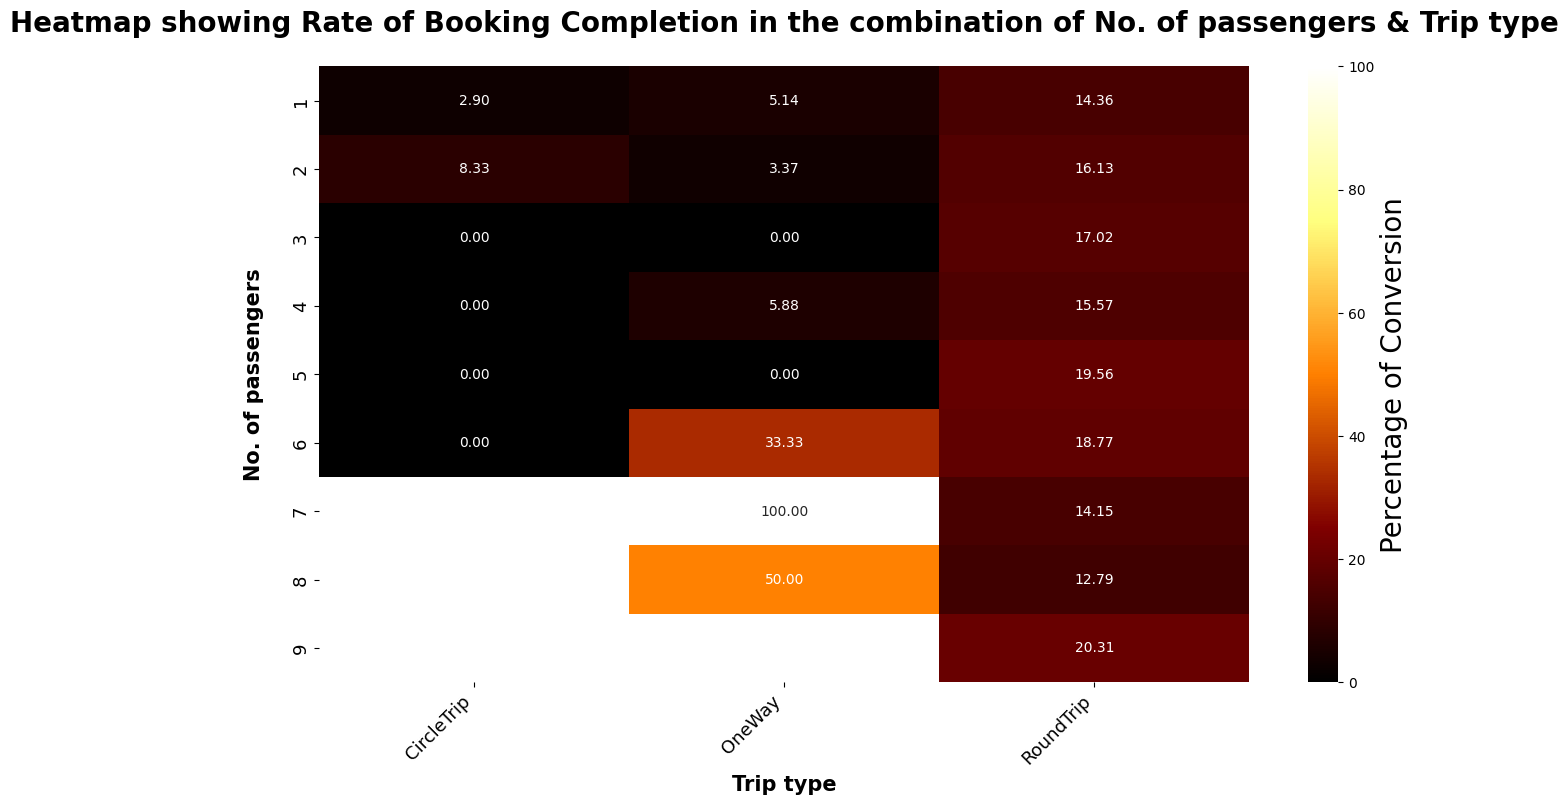

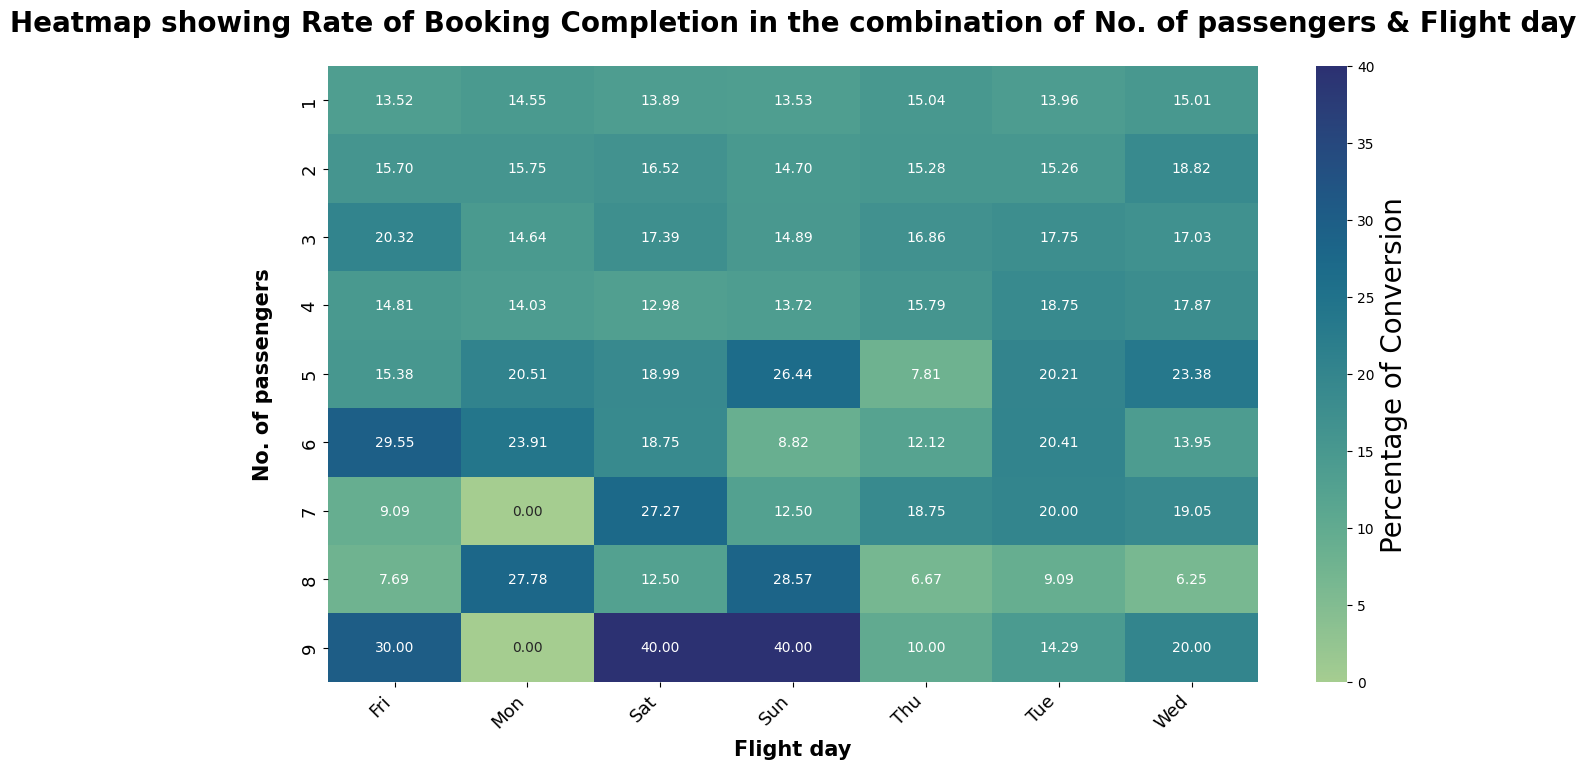

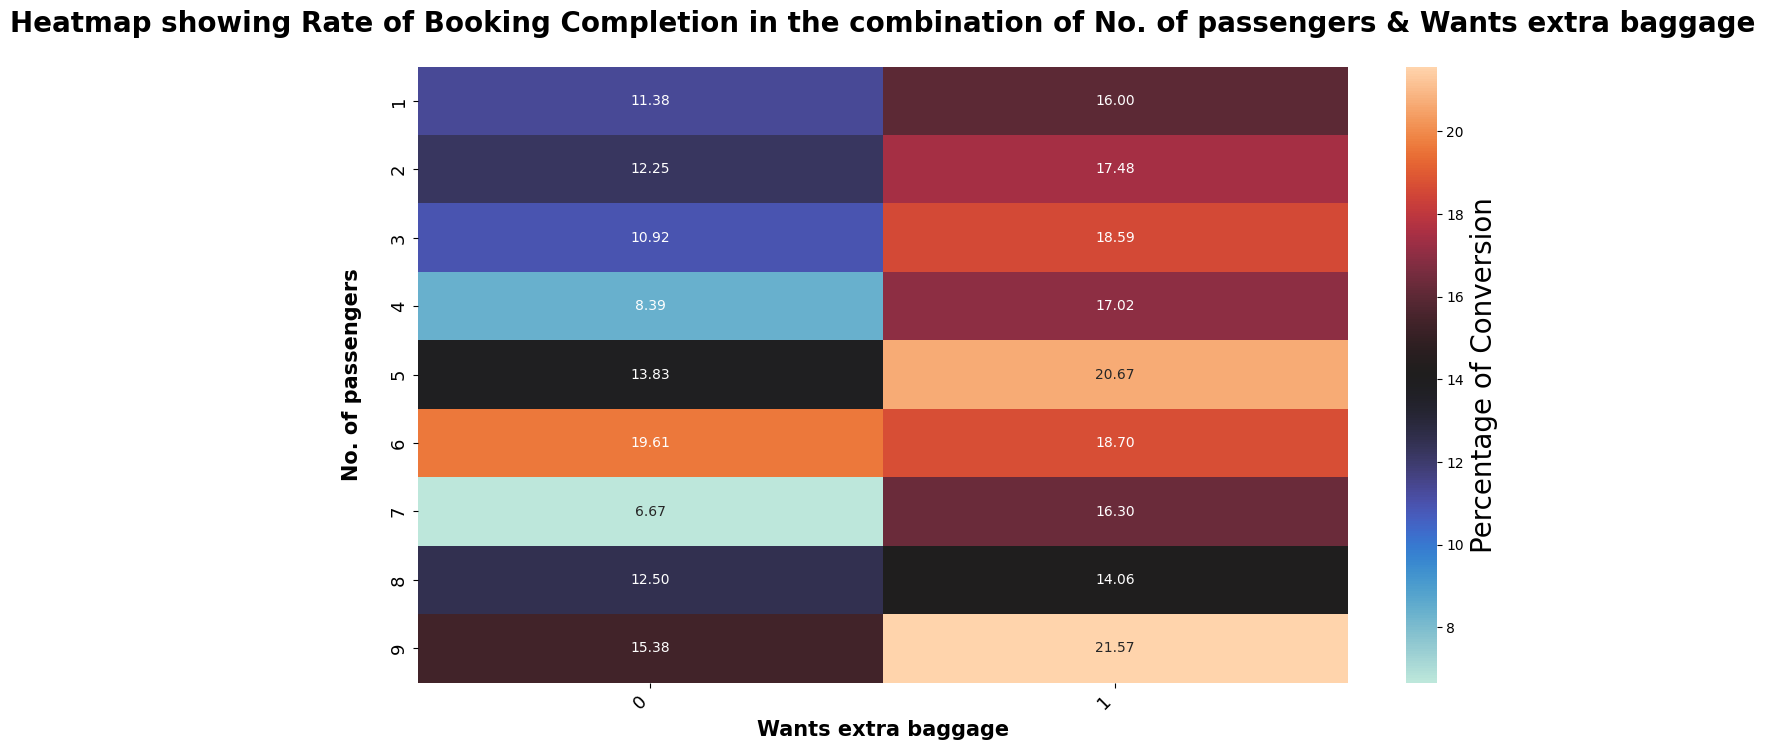

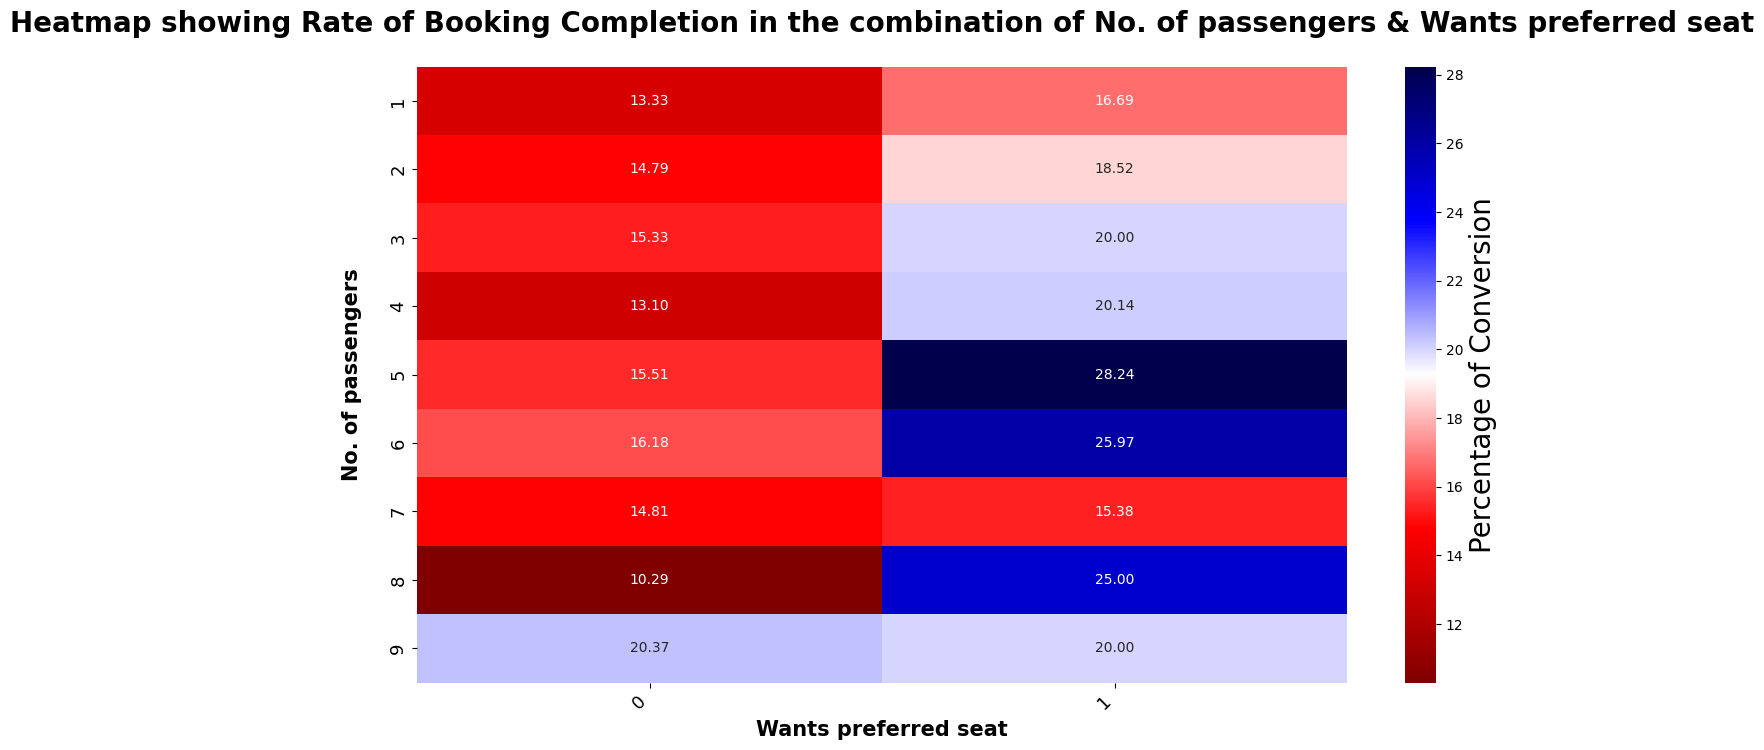

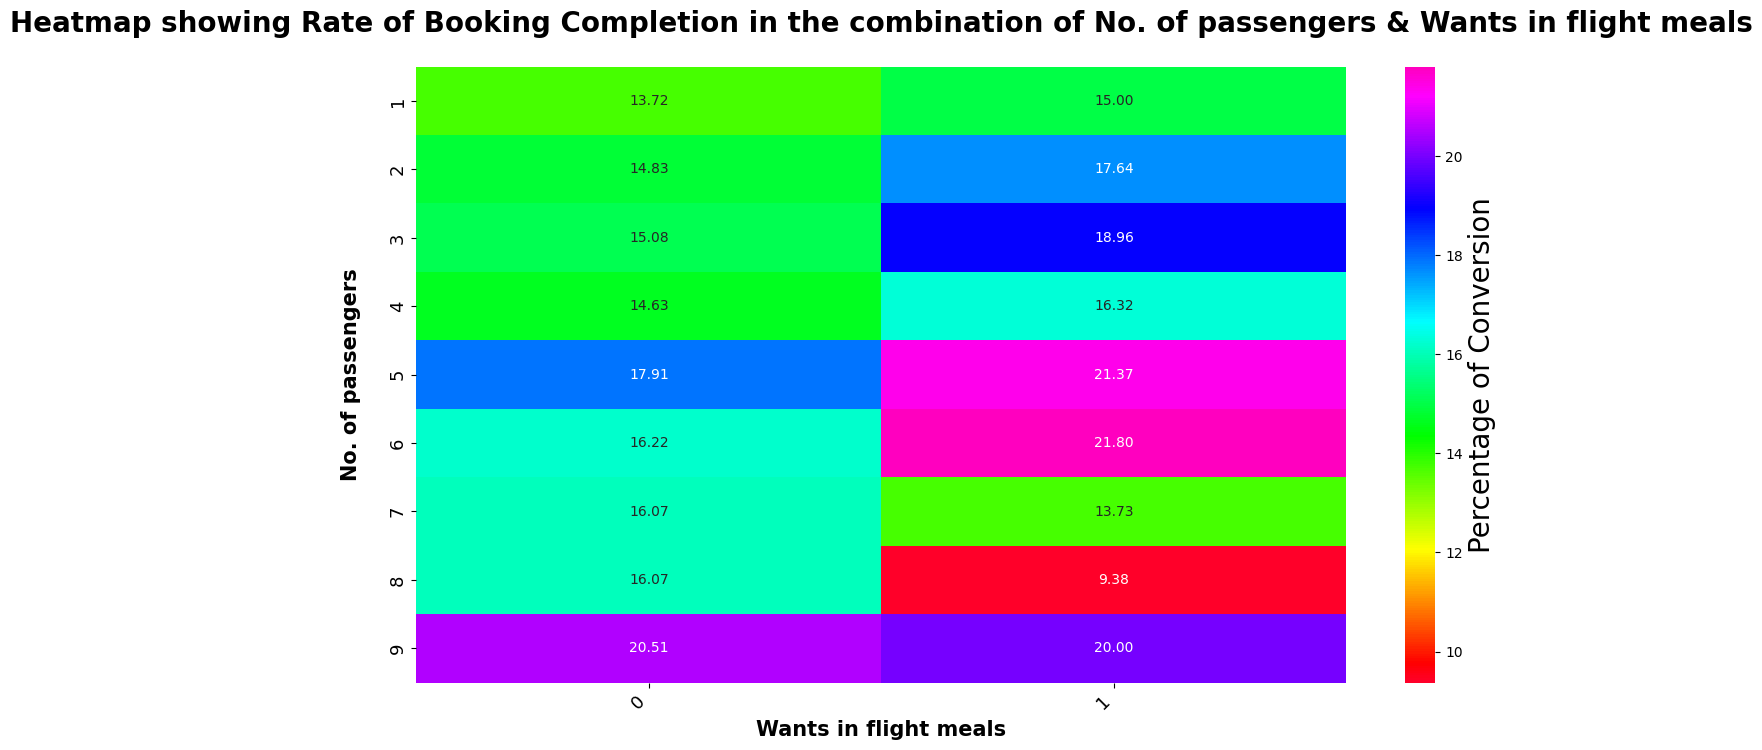

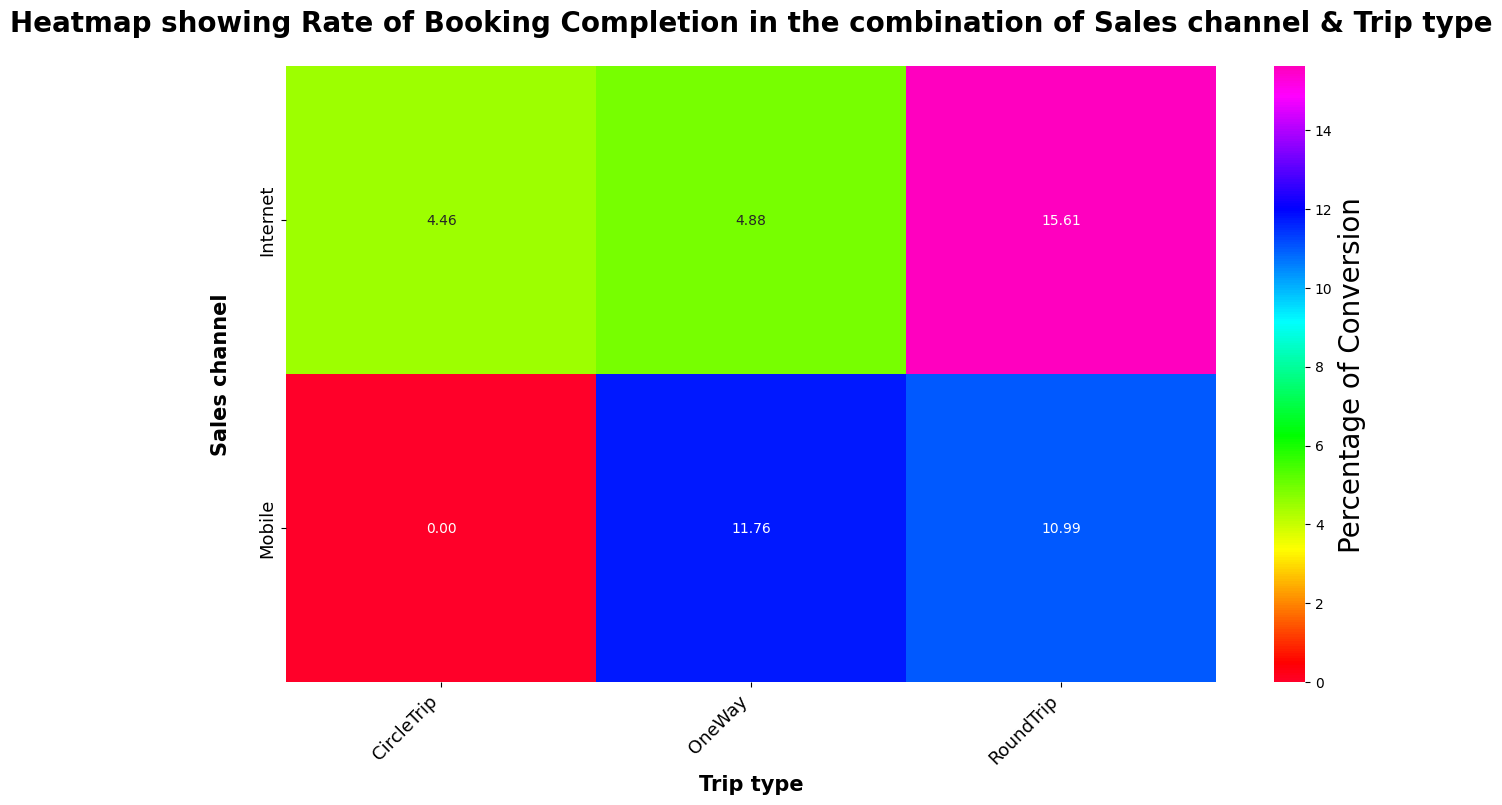

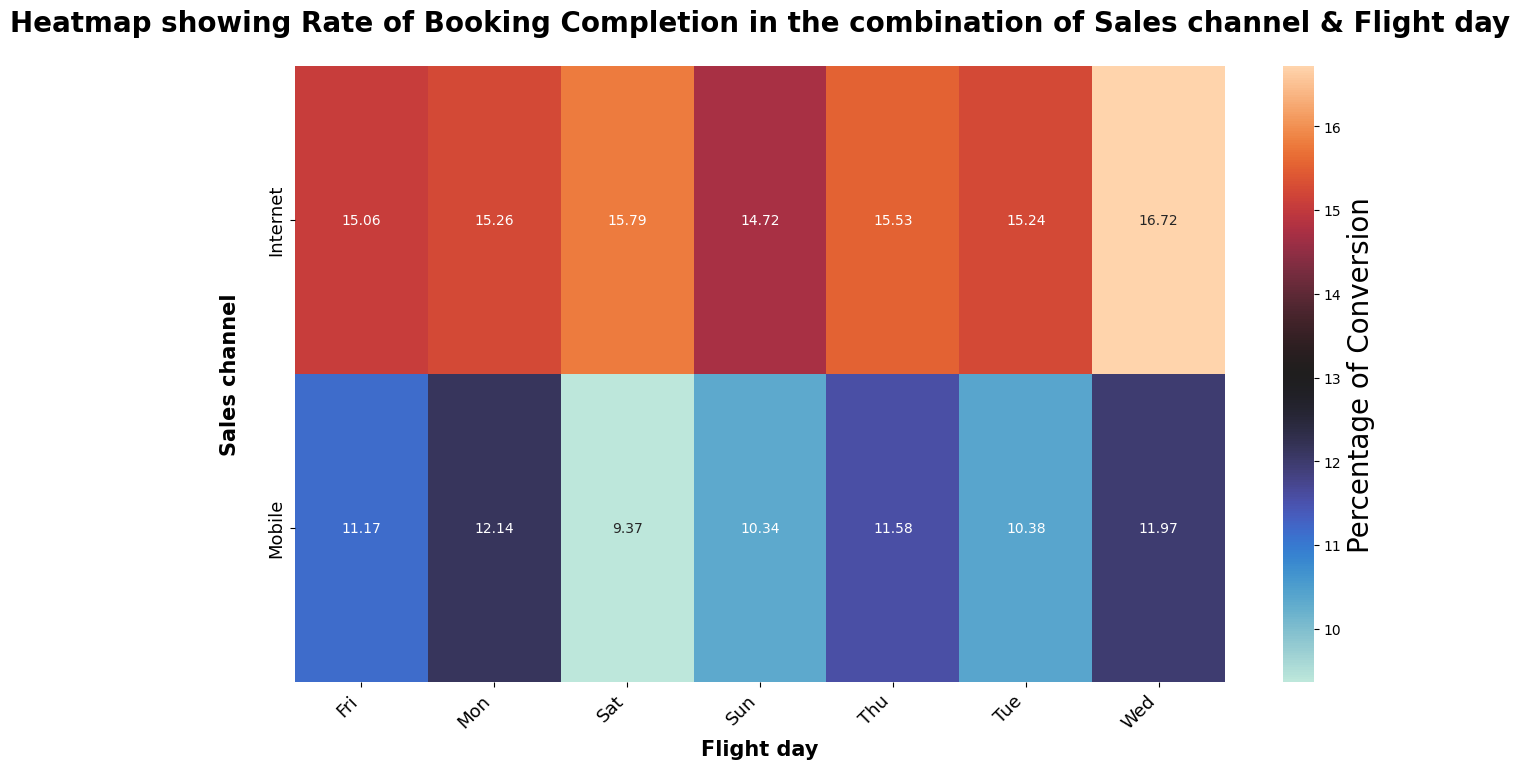

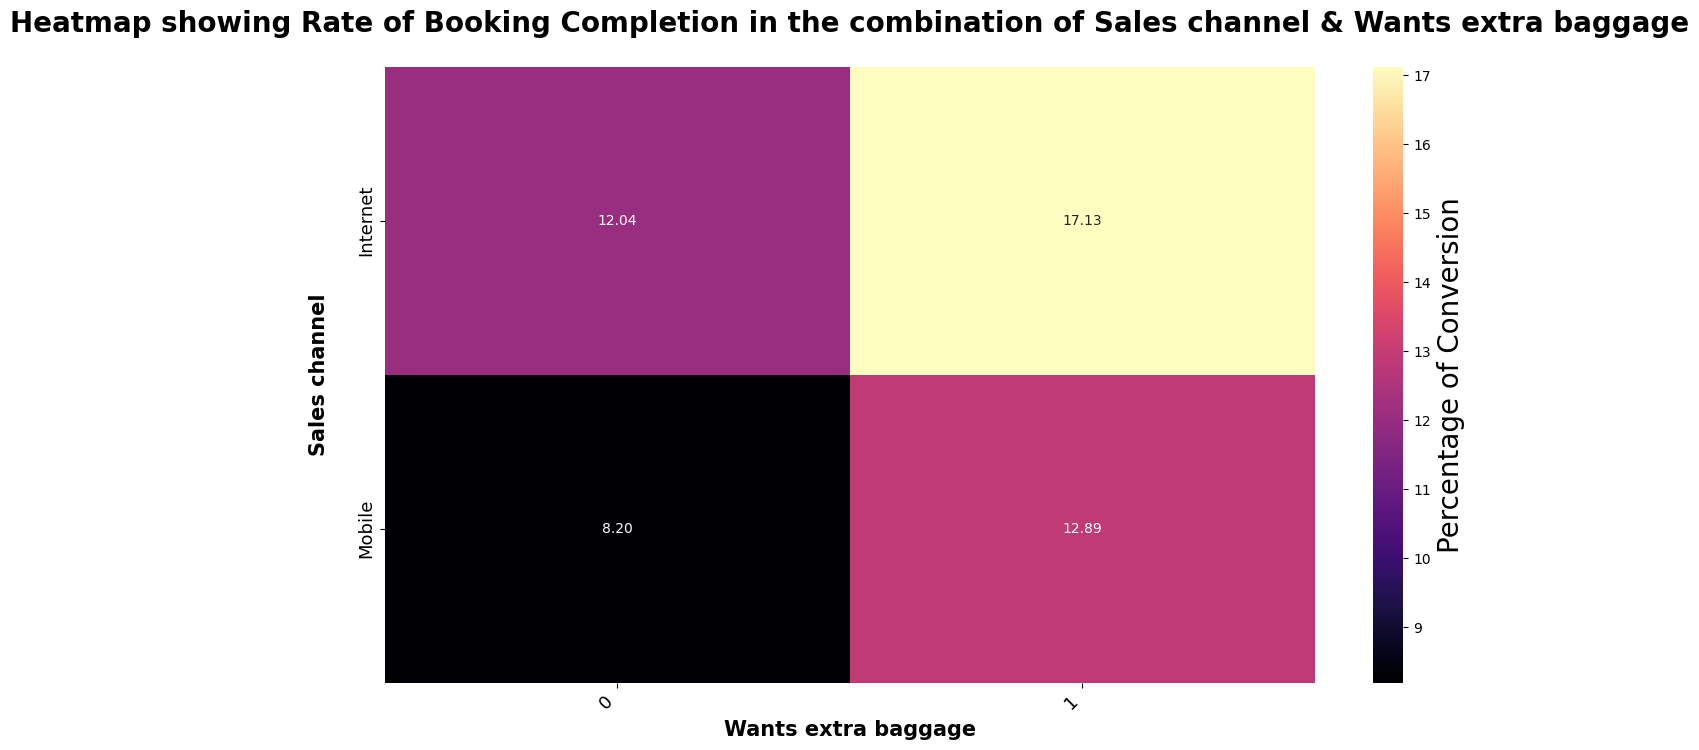

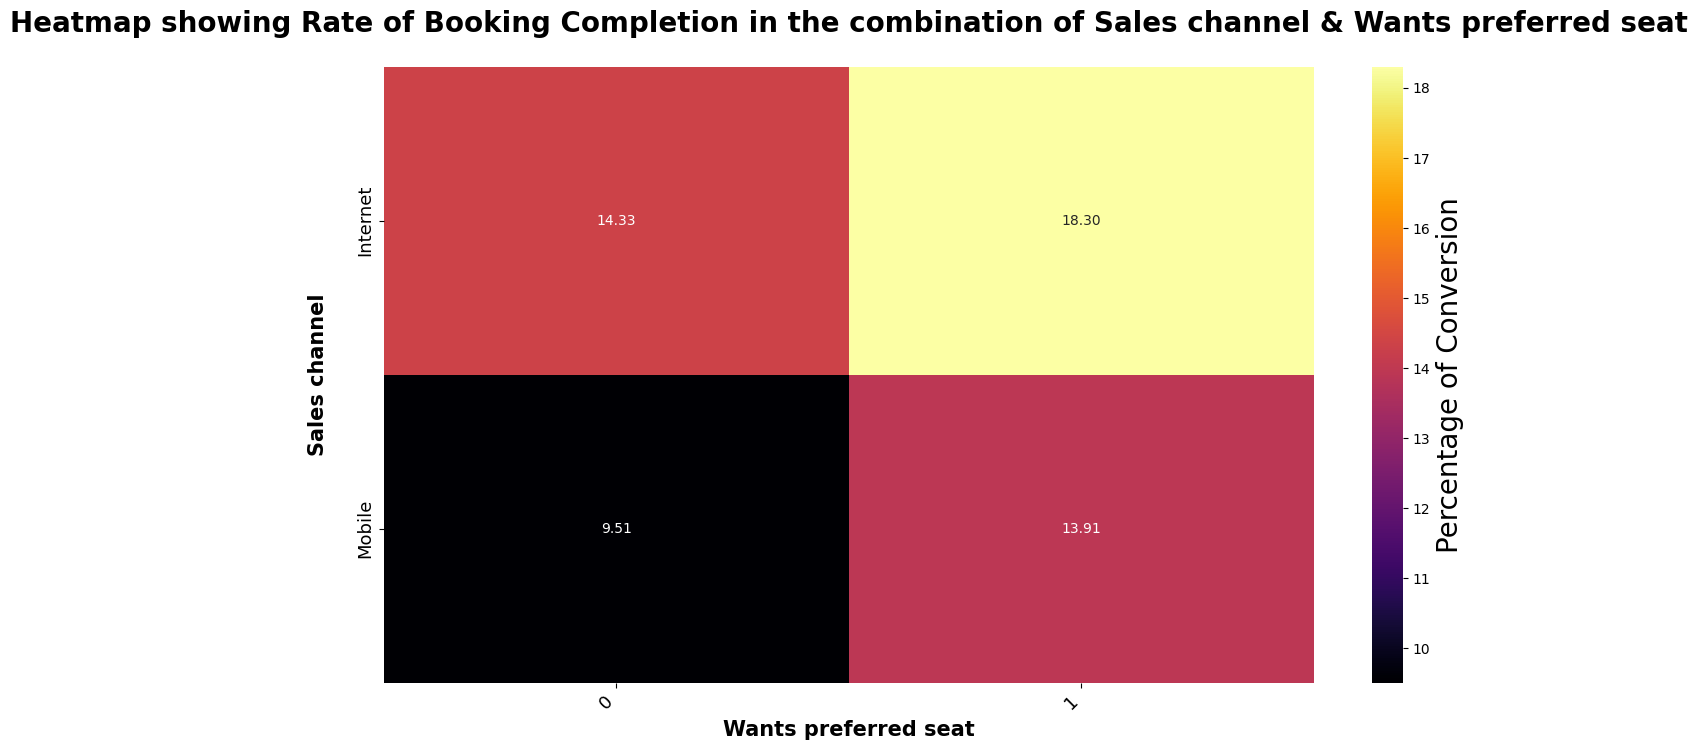

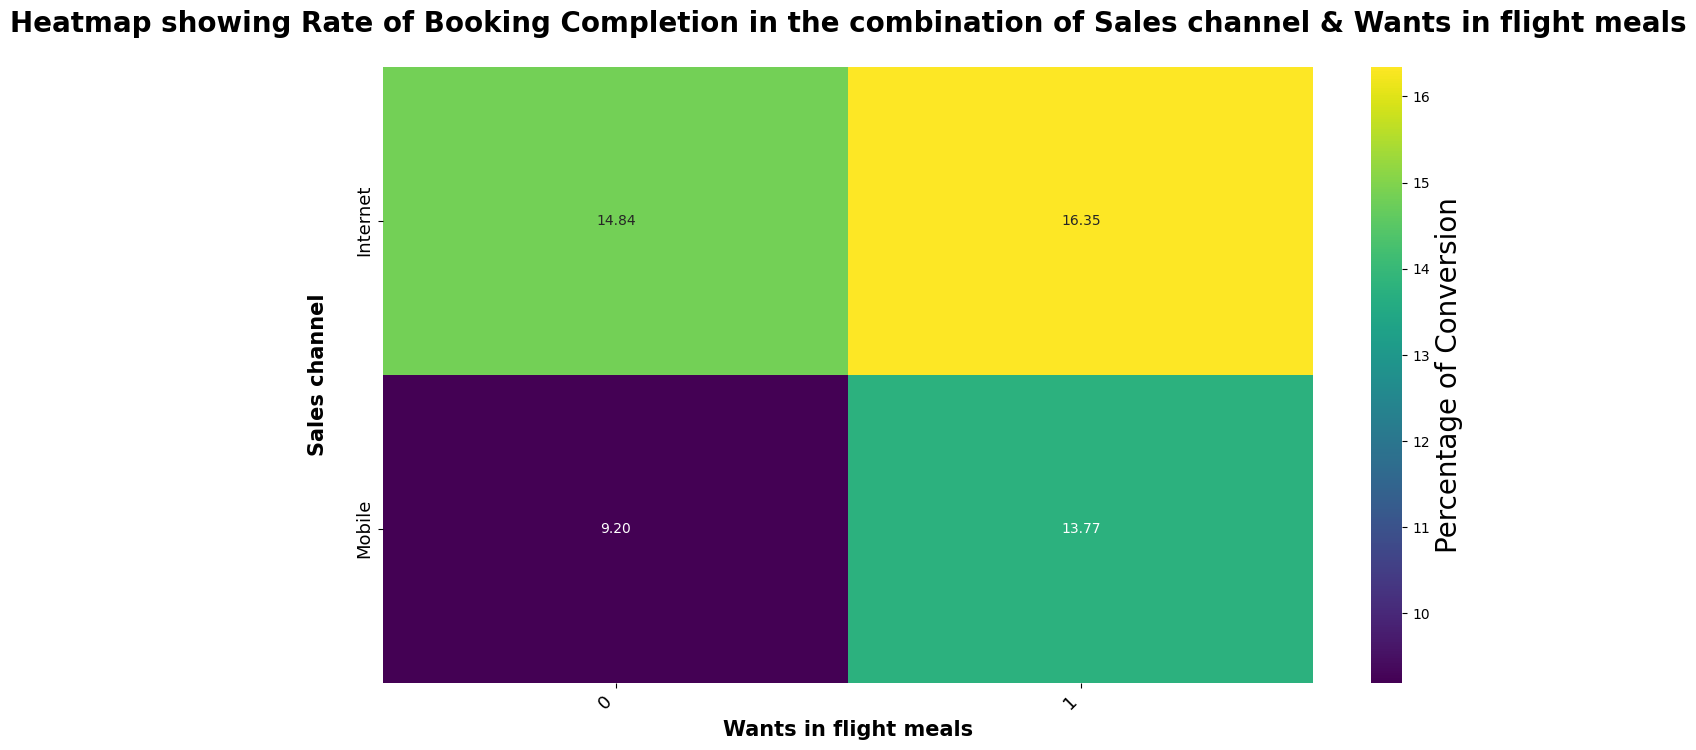

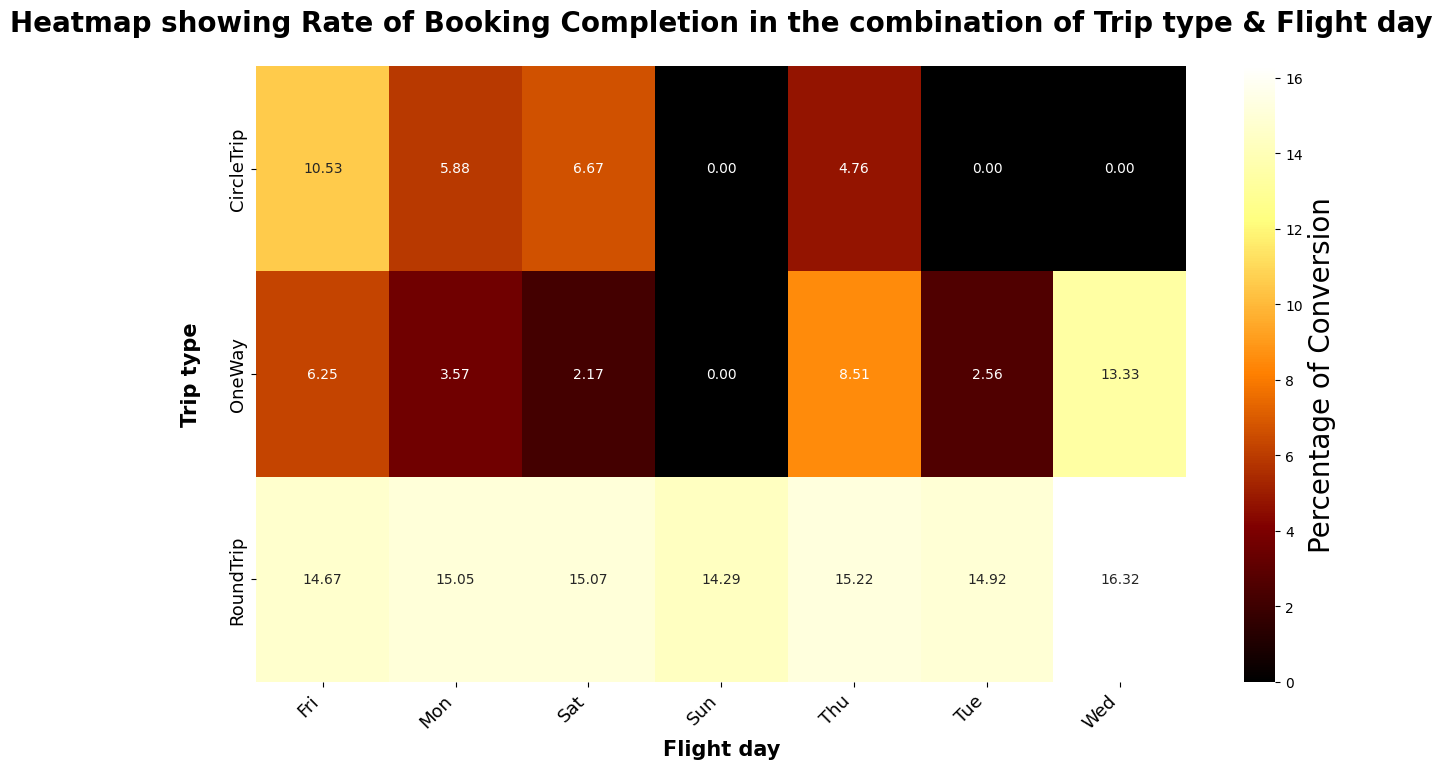

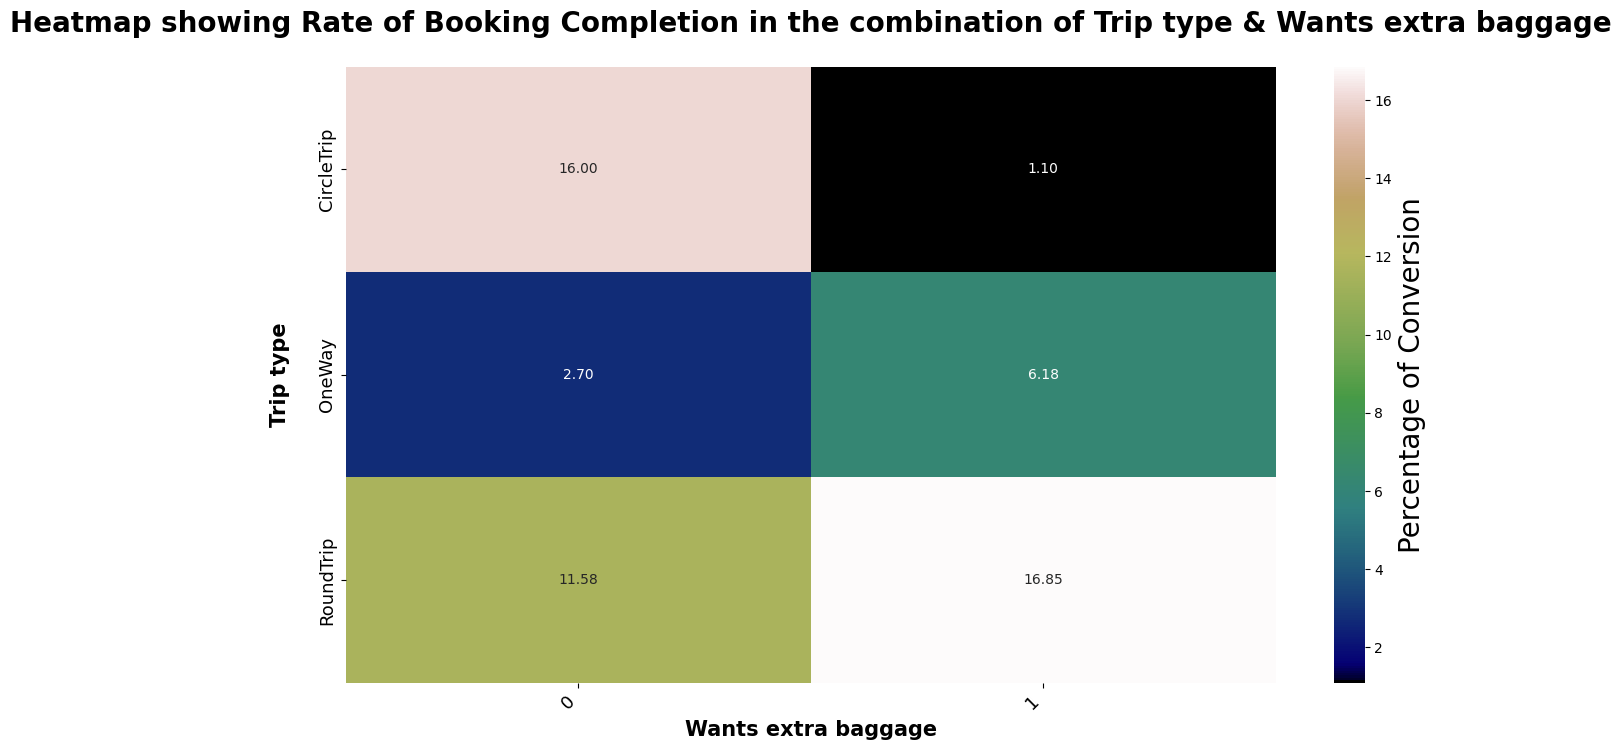

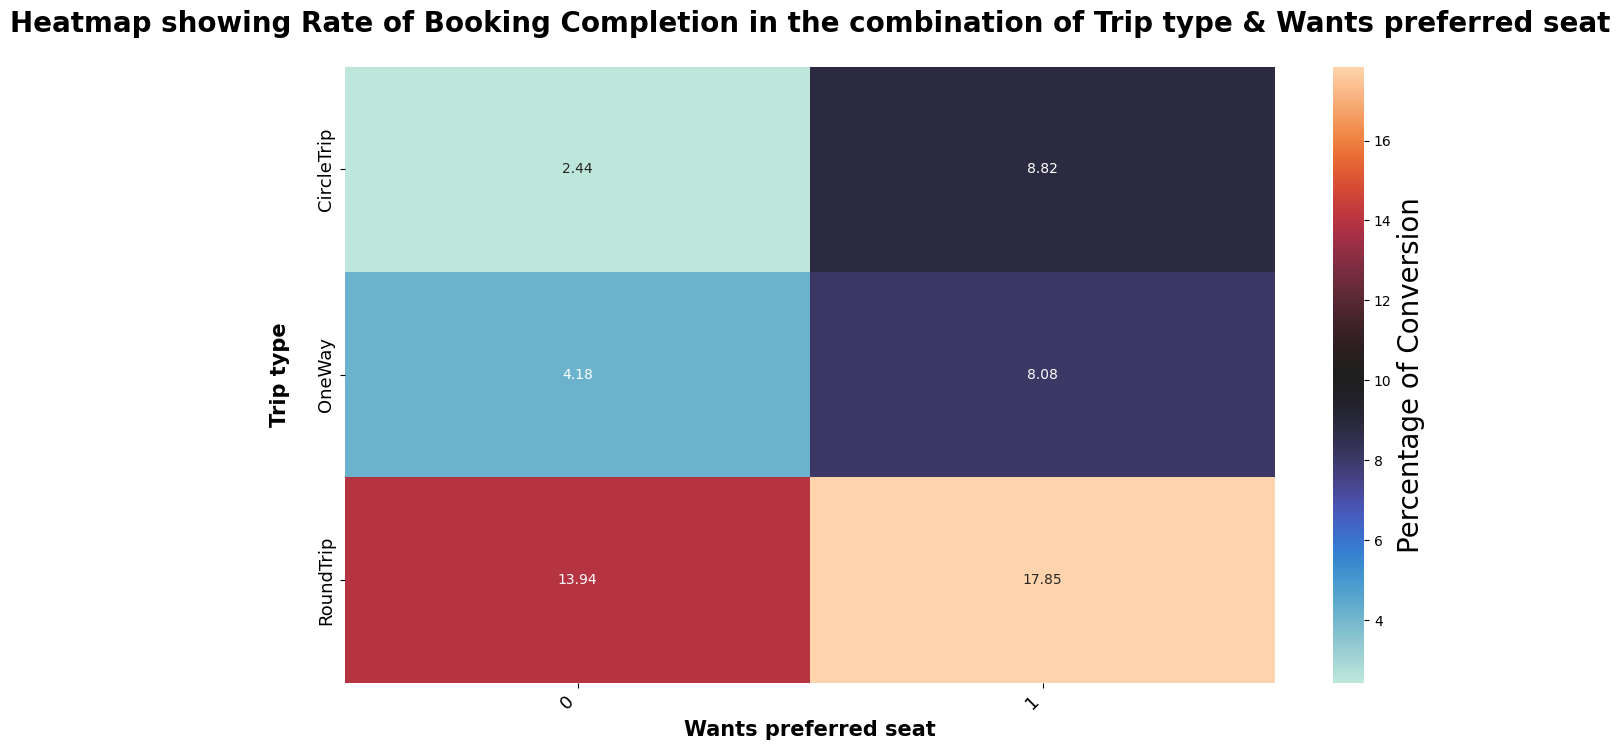

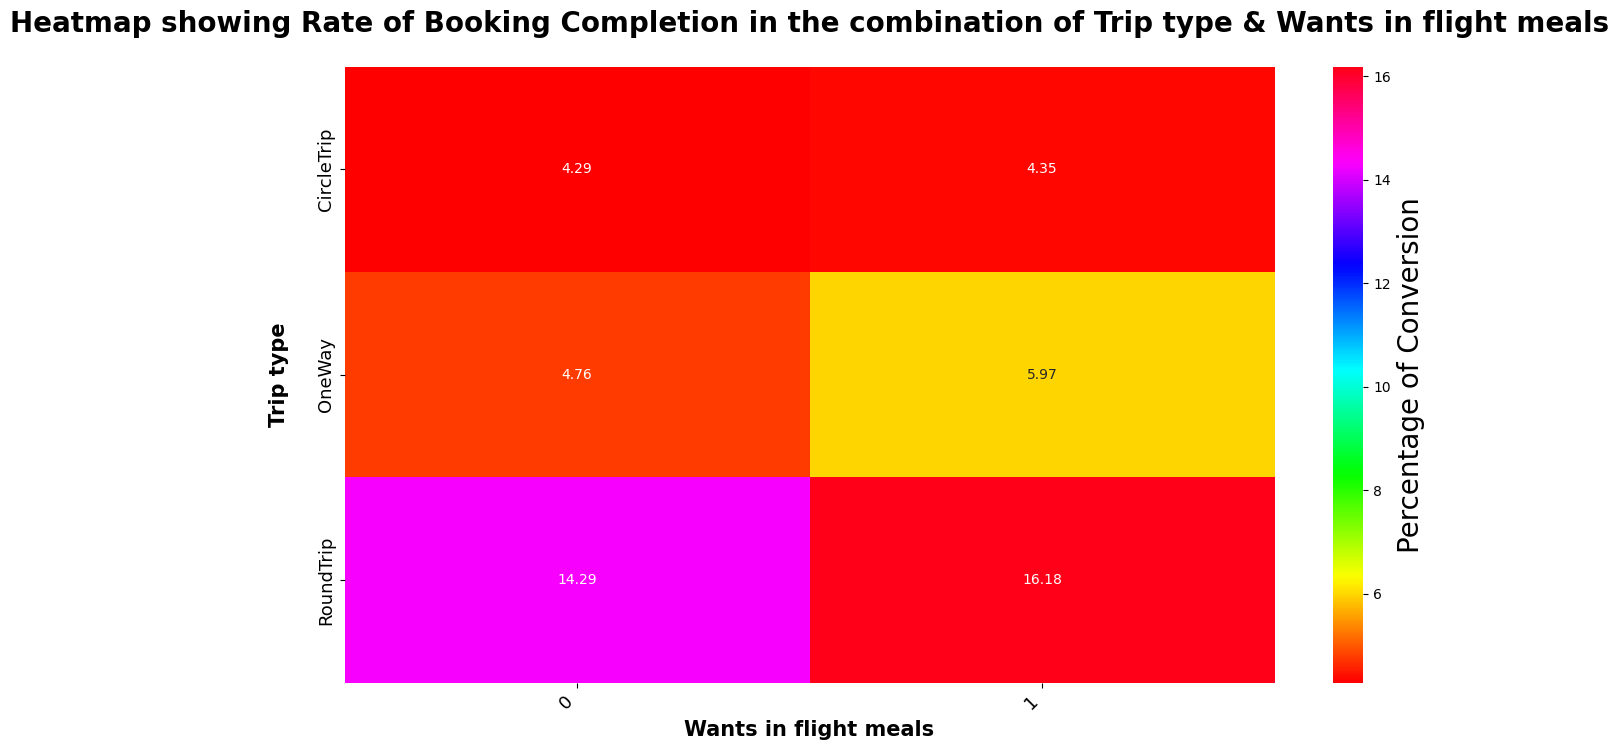

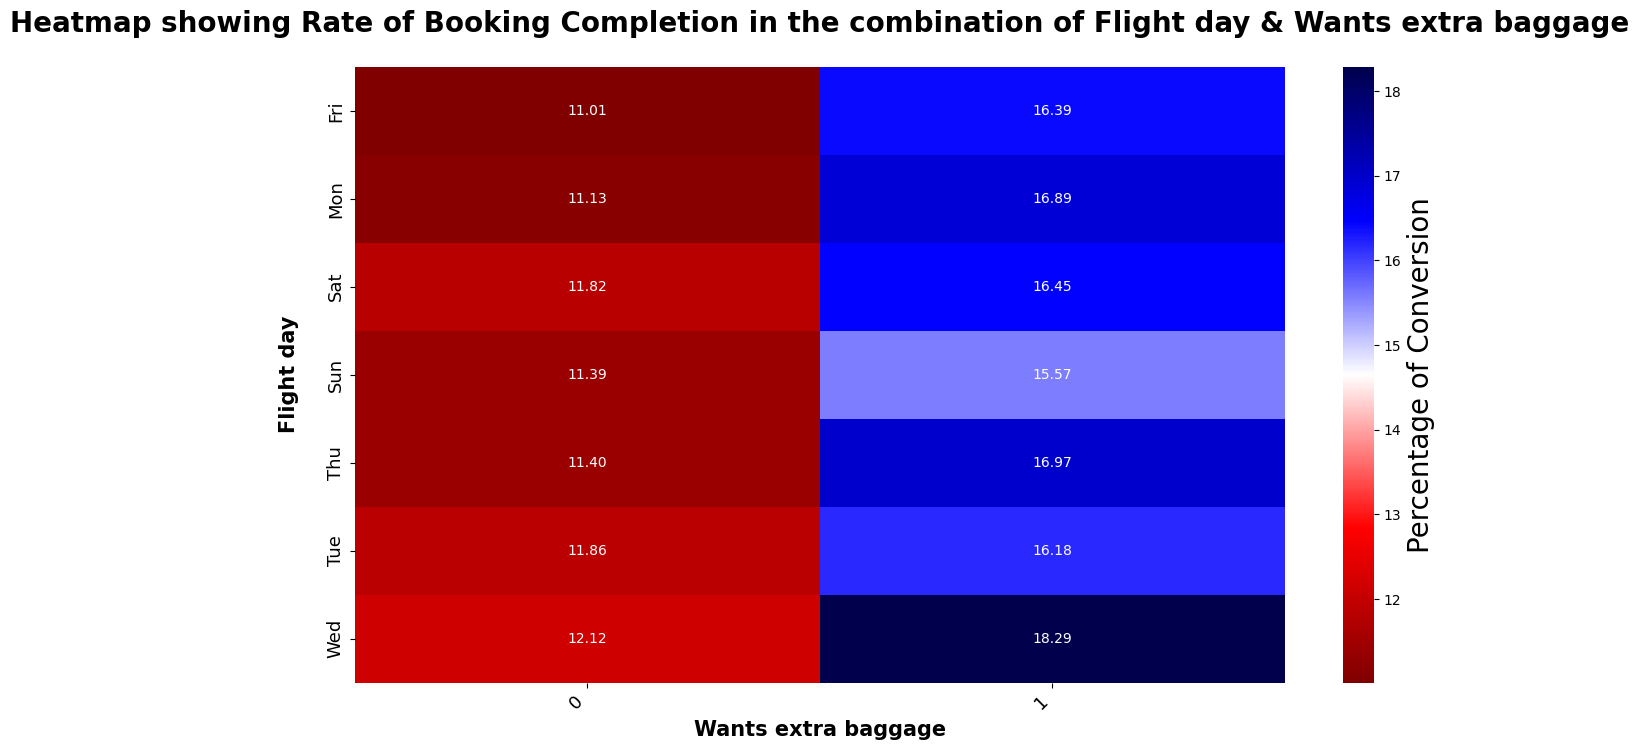

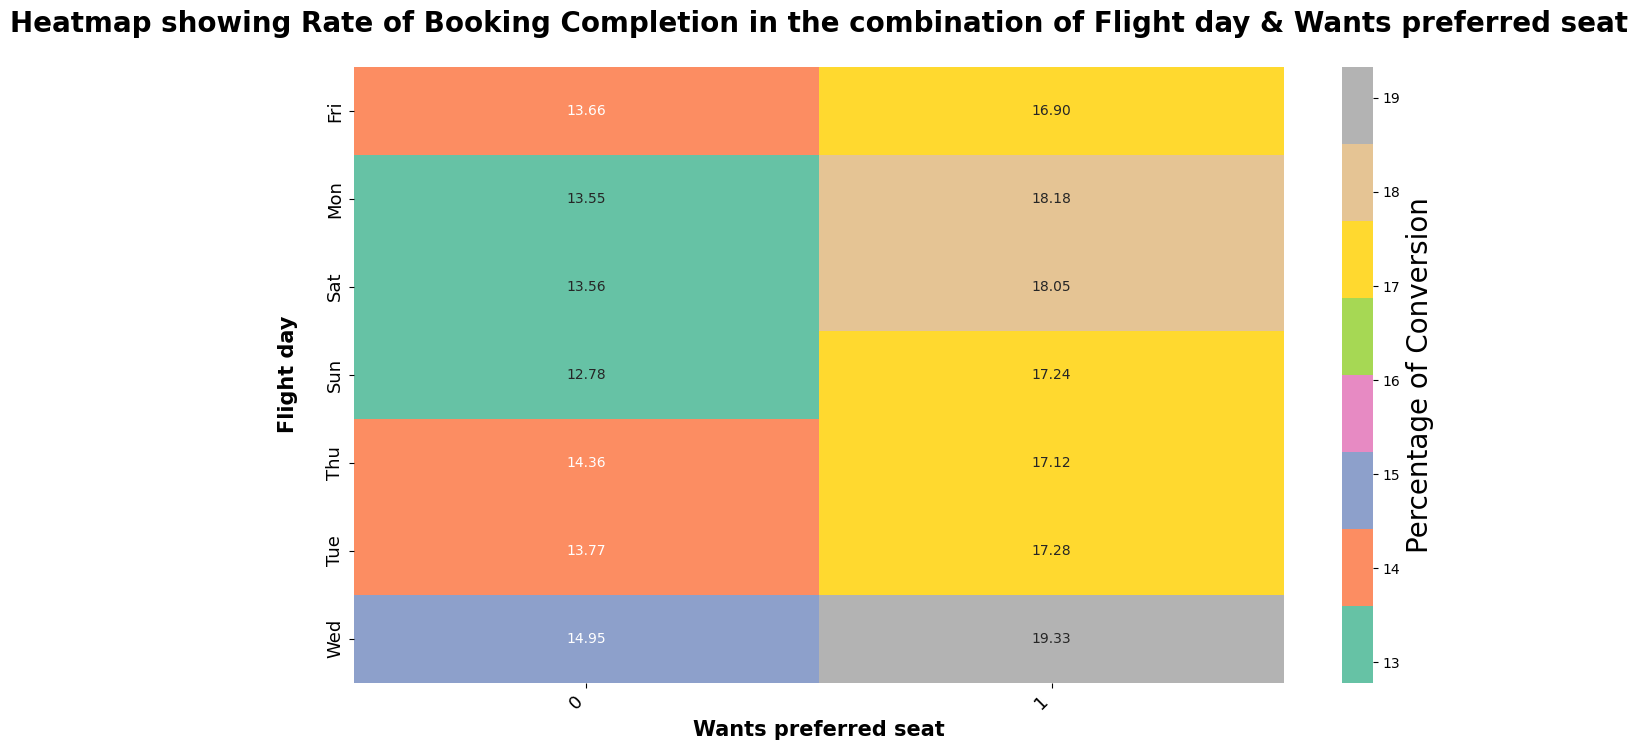

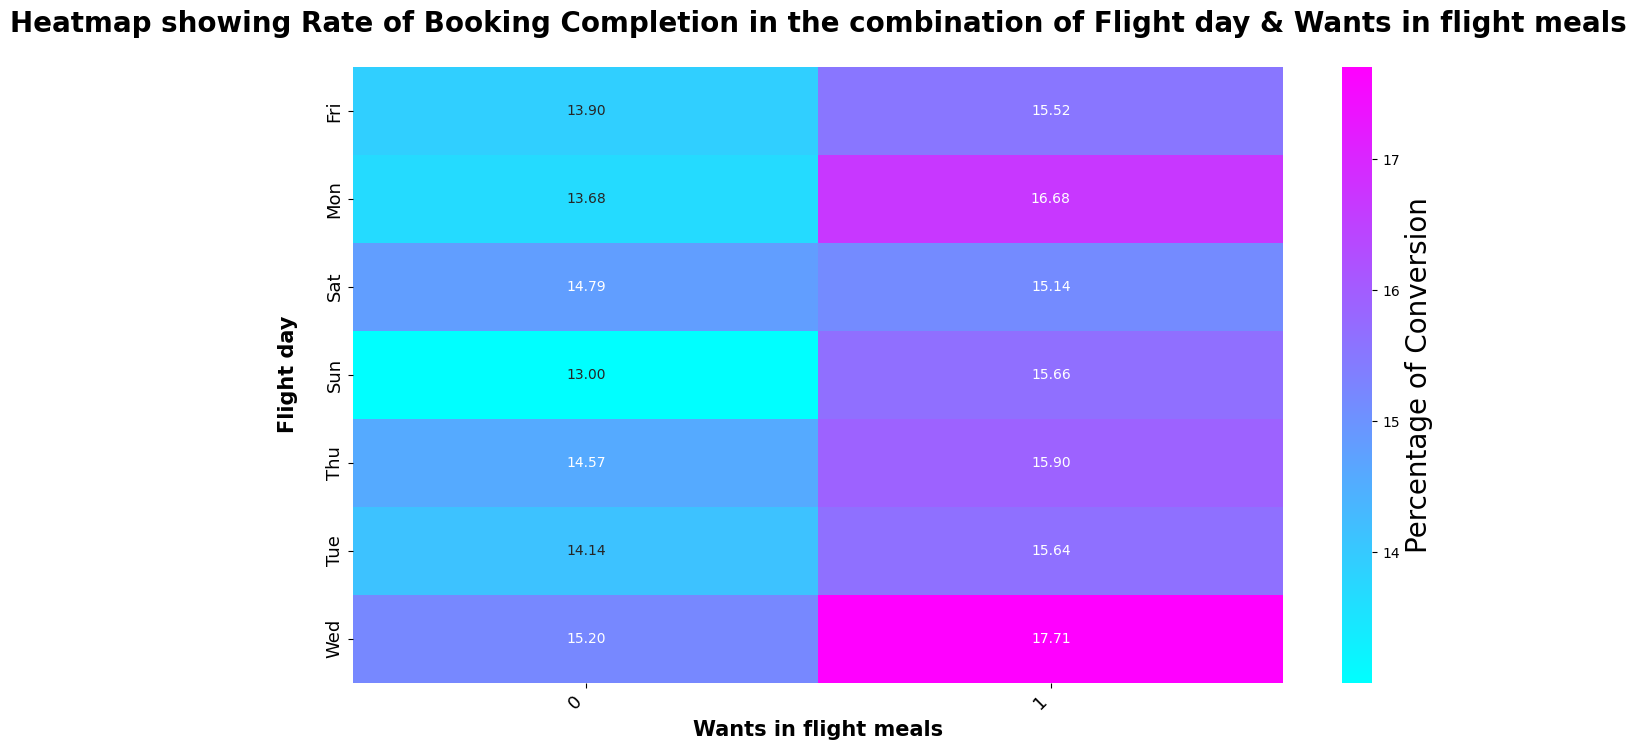

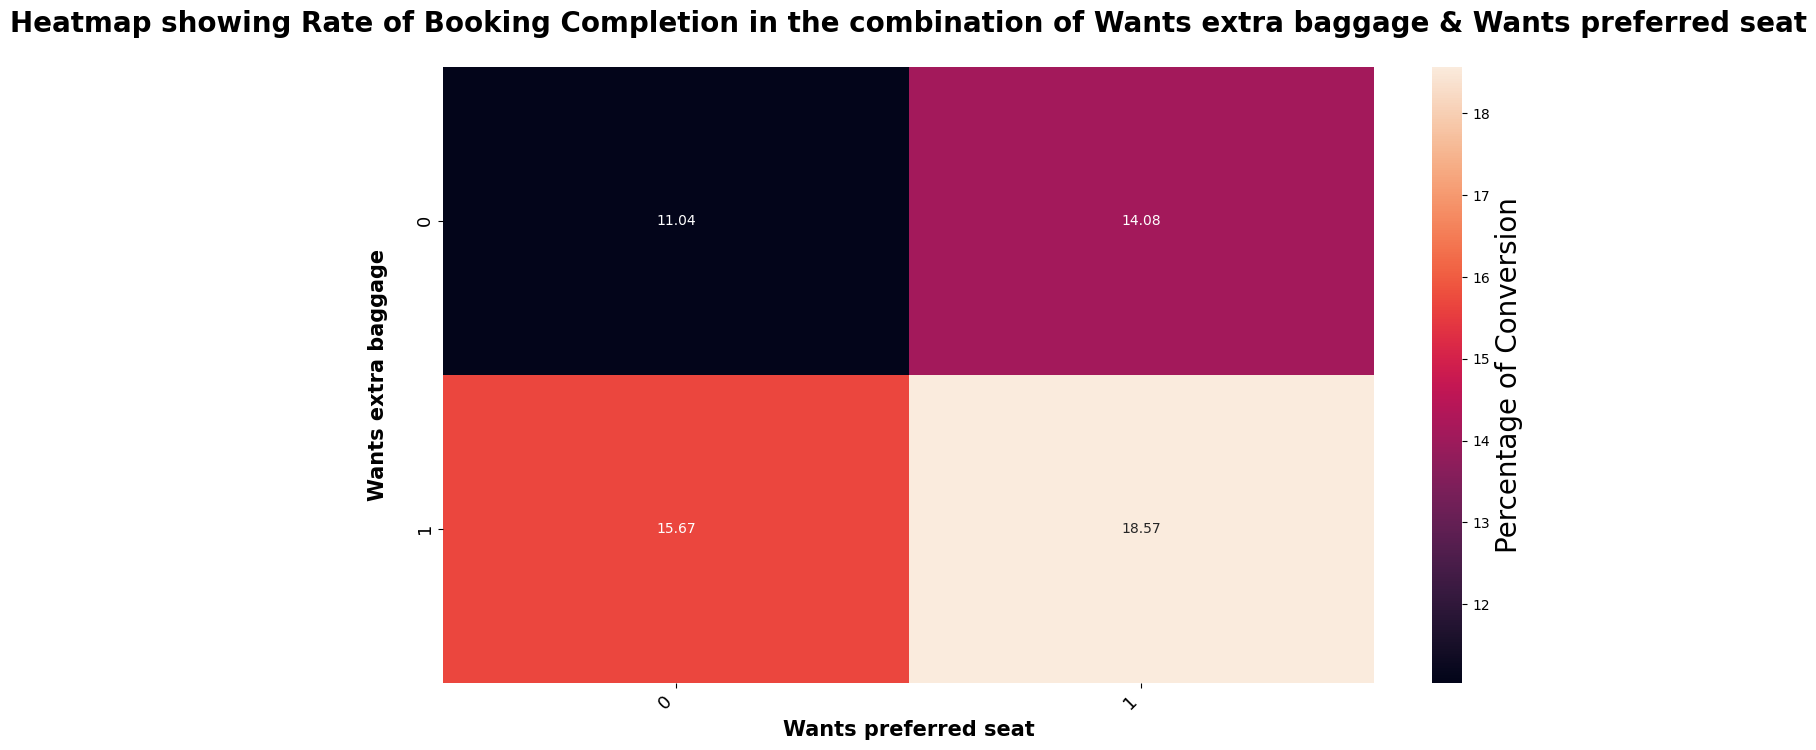

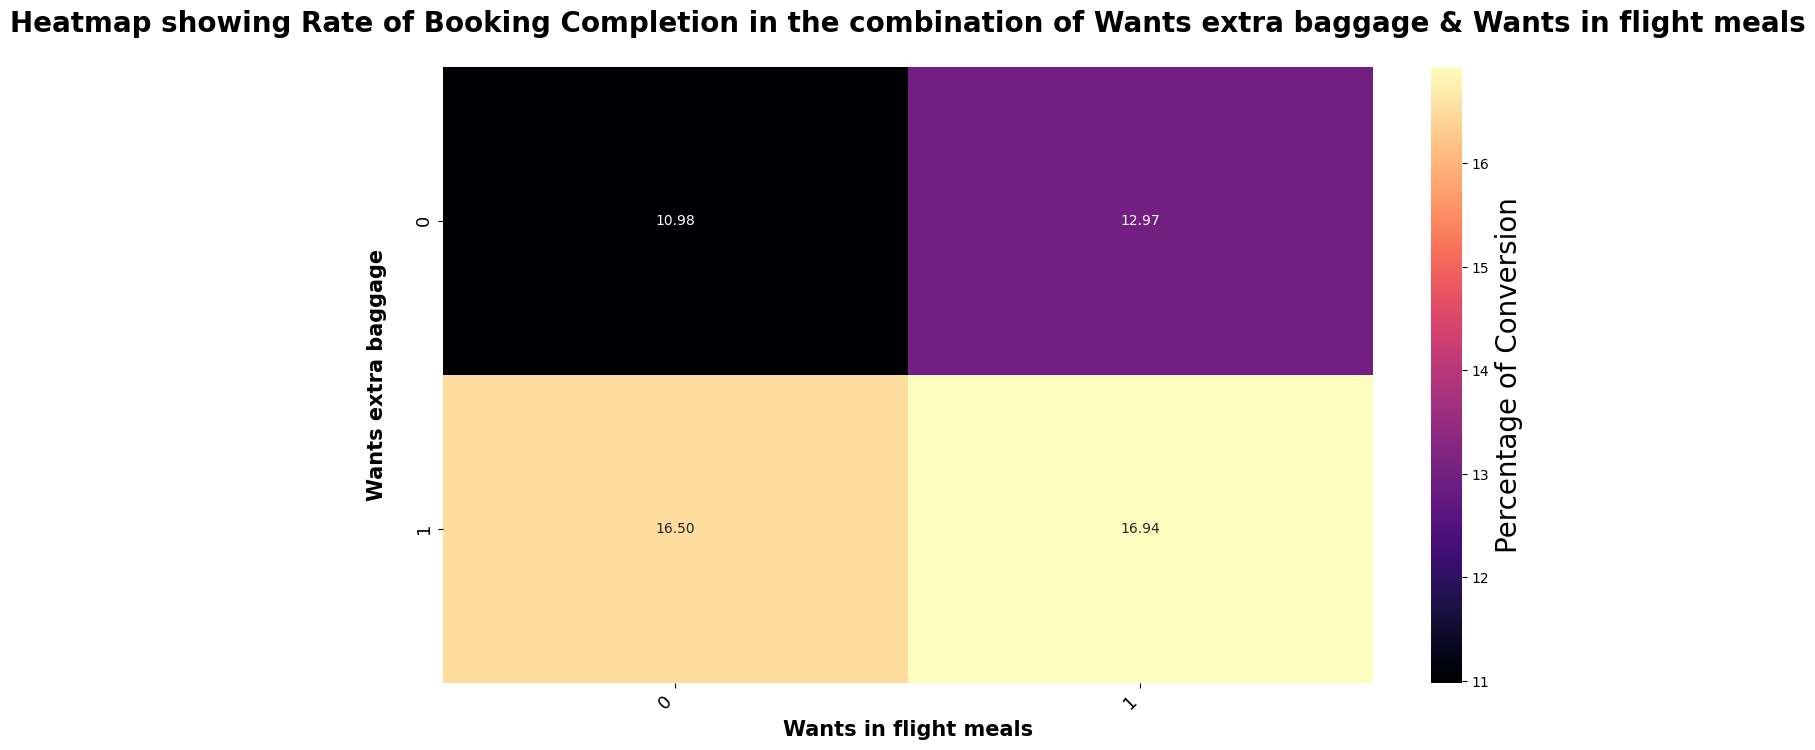

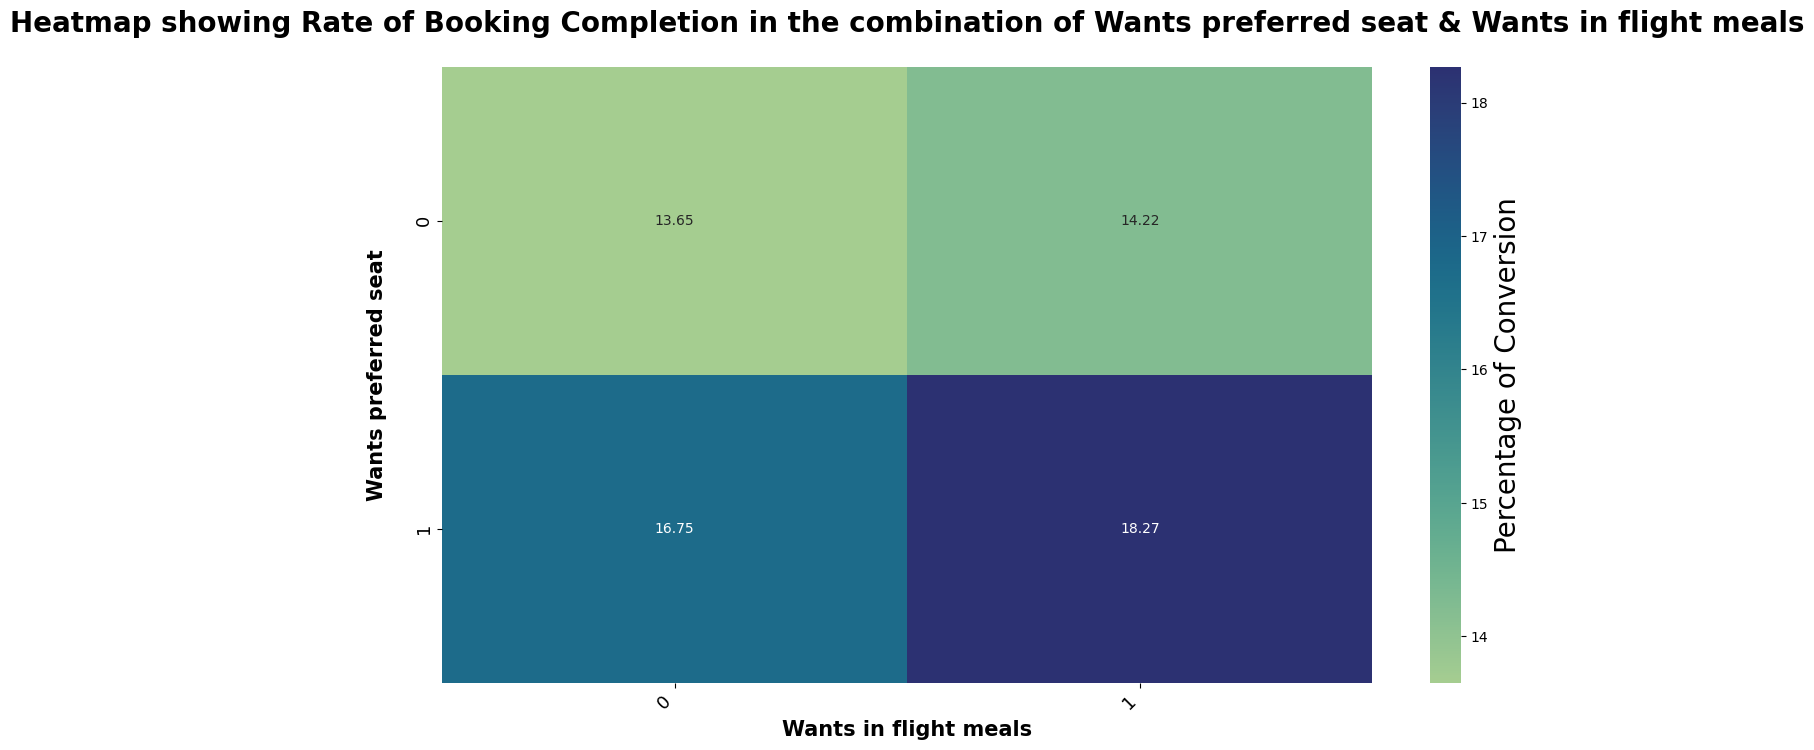

In [960]:
plots.categorical_multi_variate_target()

### **Purchase Lead**

In [961]:
cntns_cols

['purchase_lead',
 'length_of_stay',
 'flight_hour',
 'flight_duration',
 'booking_complete']

In [962]:
data.purchase_lead.isnull().sum()

0

<Axes: xlabel='purchase_lead'>

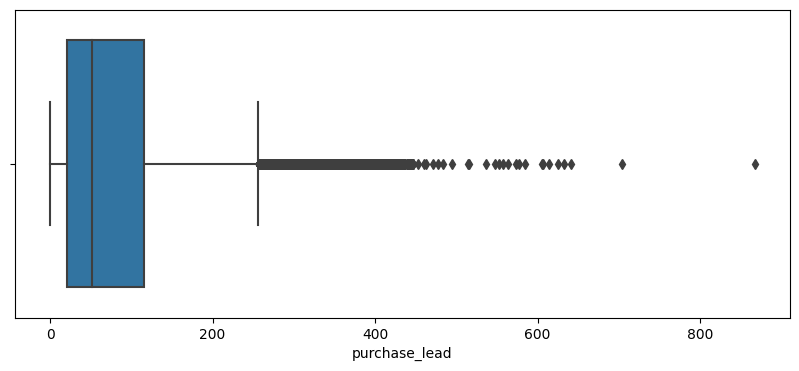

In [963]:
plt.figure(figsize=(10,4))
sns.boxplot(data=data,x='purchase_lead')

In [964]:
def outlier(data,feature):  # Method to detect and correct outliers

  # global abc
  data=data
  iqr = data[feature].quantile(0.75)-data[feature].quantile(0.25)
  total=0
  upper_threshold=data[feature].quantile(0.75)+(1.5*iqr)
  lower_threshold=data[feature].quantile(0.25)-(1.5*iqr)
  print("U.Threshold: ",upper_threshold,"\nL.Threshold: ",lower_threshold)

  for i in data[feature][:]:
    if i>upper_threshold or i<lower_threshold:
      total+=1
      # print("Outlier detected!: ",i)
      #data[feature] = data[feature].clip(lower_threshold,upper_threshold)


  return upper_threshold,lower_threshold,total

In [965]:
utl,ltl,total=outlier(data,'purchase_lead')
print(utl,ltl,total)

U.Threshold:  256.0 
L.Threshold:  -120.0
256.0 -120.0 3391


In [966]:
booking_completion=data[['booking_complete']].query('booking_complete==1').shape[0]
bkng_completion_prcntg=(booking_completion/len(data))*100
bkng_completion_prcntg

14.997666443456911

In [967]:
p_lead_outliers_bkng_complete=data.query('purchase_lead>256 and booking_complete==1')
p_lead_outliers_bkng_complete

num_passengers sales_channel  trip_type  purchase_lead  length_of_stay  \
201                4      Internet  RoundTrip            316              22   
270                1      Internet  RoundTrip            259              82   
320                2      Internet  RoundTrip            368              65   
329                1      Internet  RoundTrip            410              25   
350                2      Internet  RoundTrip            326              22   
...              ...           ...        ...            ...             ...   
49894              5      Internet  RoundTrip            364               6   
49943              4      Internet  RoundTrip            286               6   
49953              8      Internet  RoundTrip            328               6   
49955              2      Internet  RoundTrip            366               6   
49967              3      Internet  RoundTrip            279               6   

       flight_hour flight_day   route booking_origin wants_extra_baggage  \
201             14        Thu  AKLKUL       Malaysia                   1   
270              9        Sun  AKLKUL       Malaysia                   1   
320              2        Sun  AKLKUL       Malaysia                   1   
329             13        Sat  AKLKUL        Germany                   1   
350             12        Sun  AKLKUL       Malaysia                   0   
...            ...        ...     ...            ...                 ...   
49894            6        Tue  PENTPE       Malaysia                   1   
49943           17        Sat  PENTPE       Malaysia                   1   
49953           17        Sat  PENTPE       Malaysia                   1   
49955            2        Tue  PENTPE       Malaysia                   1   
49967           13        Fri  PENTPE       Malaysia                   1   

      wants_preferred_seat wants_in_flight_meals  flight_duration  \
201                      0                     0             8.83   
270                      0                     1             8.83   
320                      0                     1             8.83   
329                      1                     0             8.83   
350                      0                     0             8.83   
...                    ...                   ...              ...   
49894                    0                     0             4.67   
49943                    0                     1             4.67   
49953                    1                     1             4.67   
49955                    0                     0             4.67   
49967                    0                     0             4.67   

       booking_complete  
201                   1  
270                   1  
320                   1  
329                   1  
350                   1  
...                 ...  
49894                 1  
49943                 1  
49953                 1  
49955                 1  
49967                 1  

[492 rows x 14 columns]

In [968]:
percentage_bkng_cmplete_pLead_outliers = (p_lead_outliers_bkng_complete.shape[0]/3391)*100
percentage_bkng_cmplete_pLead_outliers

14.508994396933058

In [969]:
data.length_of_stay.describe()

count    49281.000000
mean        23.053976
std         33.832149
min          0.000000
25%          5.000000
50%         17.000000
75%         28.000000
max        778.000000
Name: length_of_stay, dtype: float64

In [970]:
outlier(data,'length_of_stay')

U.Threshold:  62.5 
L.Threshold:  -29.5


(62.5, -29.5, 3748)

In [971]:
lStay_outliers_bkng_complete=data.query('length_of_stay>62.5 and booking_complete==1')
lStay_outliers_bkng_complete.head()

num_passengers sales_channel  trip_type  purchase_lead  length_of_stay  \
94               1      Internet  RoundTrip            181              87   
124              1      Internet  RoundTrip             22             180   
152              1      Internet  RoundTrip             10              91   
168              1      Internet  RoundTrip            142             124   
258              1        Mobile  RoundTrip             22              82   

     flight_hour flight_day   route booking_origin wants_extra_baggage  \
94             2        Tue  AKLKUL      Singapore                   1   
124           13        Thu  AKLKUL       Malaysia                   1   
152           23        Tue  AKLKUL      Singapore                   1   
168            9        Wed  AKLKUL       Malaysia                   1   
258           10        Fri  AKLKUL       Malaysia                   1   

    wants_preferred_seat wants_in_flight_meals  flight_duration  \
94                     0                     1             8.83   
124                    0                     0             8.83   
152                    0                     0             8.83   
168                    0                     0             8.83   
258                    1                     1             8.83   

     booking_complete  
94                  1  
124                 1  
152                 1  
168                 1  
258                 1

In [972]:
percentage_bkng_cmplete_lStay_outliers=(lStay_outliers_bkng_complete.shape[0]/3748)*100
percentage_bkng_cmplete_lStay_outliers

14.541088580576309

Text(0.5, 1.0, 'Histogram of Probability of booking completion in purchase lead')

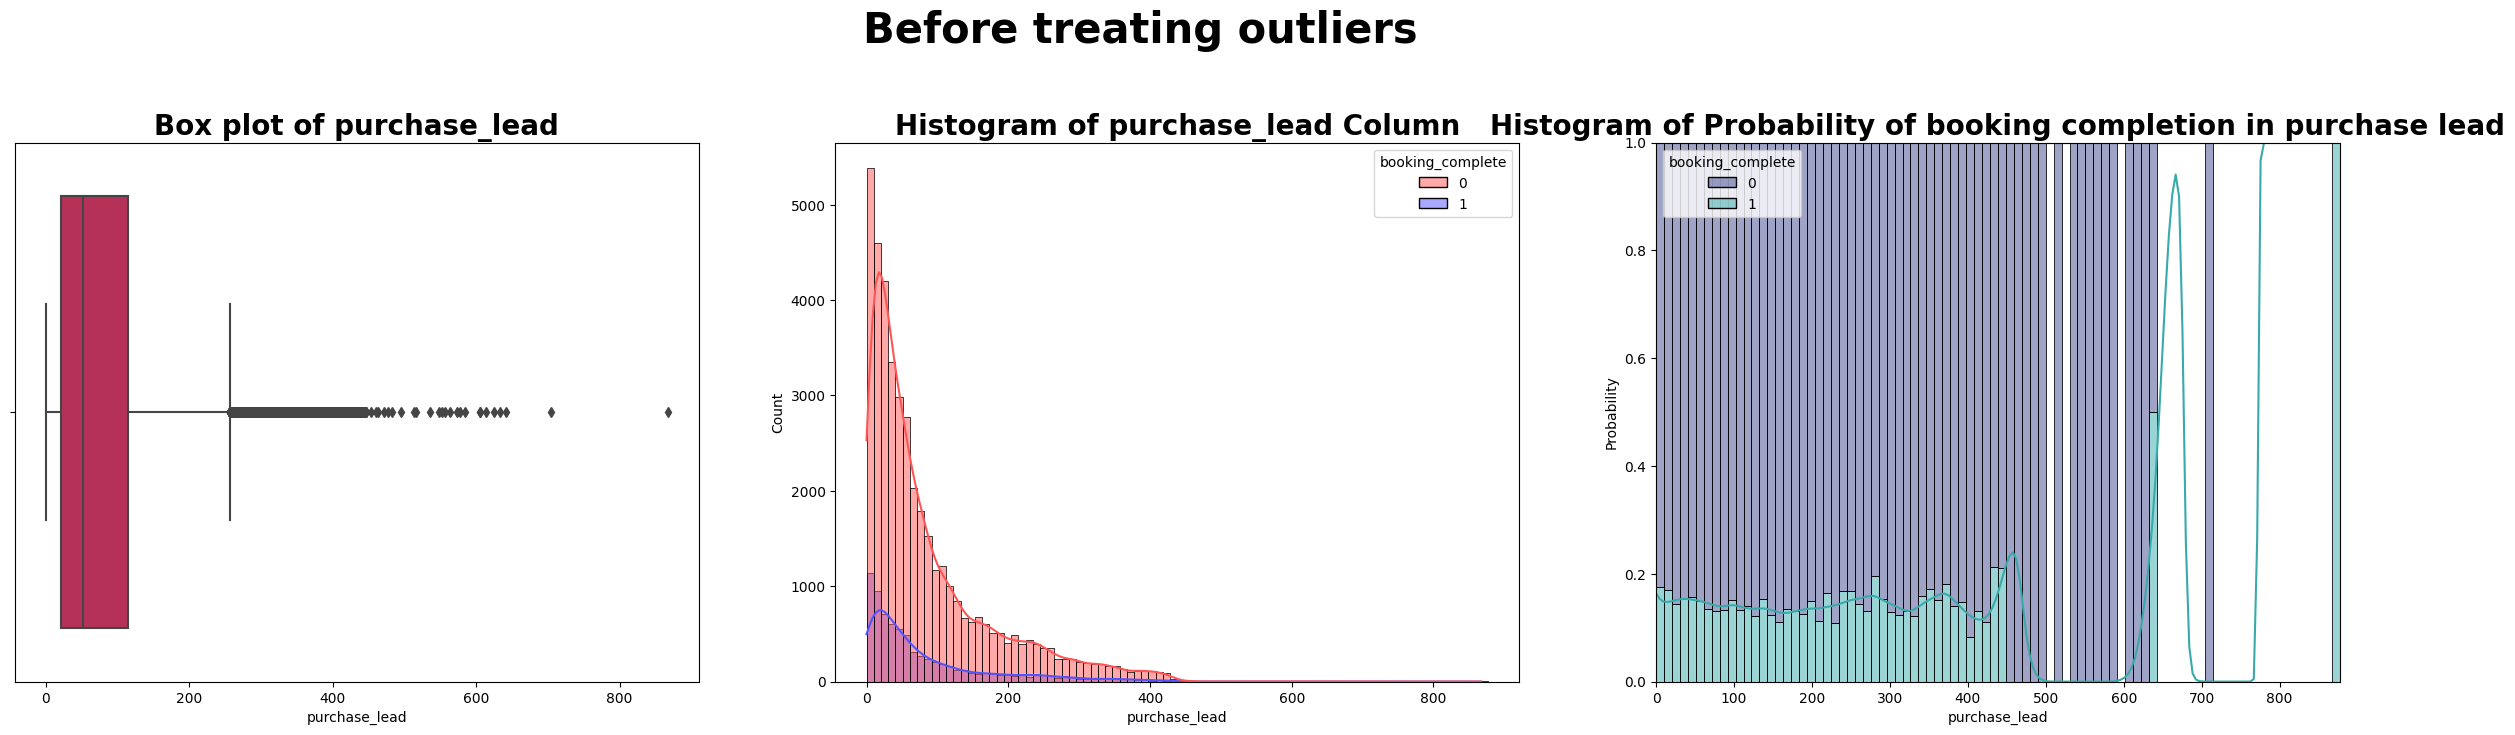

In [973]:
fig,axes=plt.subplots(1,3,figsize=(30,7))

sup_title='Before treating outliers'
plt.suptitle(f"{sup_title}",y=1.07,fontweight='heavy',fontsize=30)
sns.boxplot(data=data,x='purchase_lead',palette='rocket',ax=axes[0]).set_title("Box plot of purchase_lead",fontweight='bold',fontsize=20)
sns.histplot(data=data,x=data['purchase_lead'],hue='booking_complete',palette='seismic_r',binwidth=10.2,kde=True,ax=axes[1]).set_title("Histogram of purchase_lead Column",fontweight='bold',fontsize=20)
sns.histplot(data=data,x=data['purchase_lead'],hue='booking_complete',palette='mako',binwidth=10.2,kde=True,ax=axes[2],multiple='fill',stat='probability').set_title("Histogram of Probability of booking completion in purchase lead",fontweight='bold',fontsize=20 )


In [974]:
def clubbed_plots(data,numerical_feature,target):

  range=data[f"{numerical_feature}"].max()-data[f"{numerical_feature}"].min()
  bins=range/data[f"{numerical_feature}"].mean()

  fig,axes=plt.subplots(1,3,figsize=(30,7))

  # sup_title='Before treating outliers'
  # plt.suptitle(f"{sup_title}",y=1.07,fontweight='heavy',fontsize=30)
  sns.boxplot(data=data,x=f'{numerical_feature}',palette='rocket',ax=axes[0]).set_title(f"Box plot of {numerical_feature}",fontweight='bold',fontsize=20)
  sns.histplot(data=data,x=data[f'{numerical_feature}'],hue=f'{target}',palette='seismic_r',binwidth=bins,kde=True,ax=axes[1]).set_title(f"Histogram of {numerical_feature} Column",fontweight='bold',fontsize=20)
  sns.histplot(data=data,x=data[f'{numerical_feature}'],hue=f'{target}',palette='mako',binwidth=bins,kde=True,ax=axes[2],multiple='fill',stat='probability').set_title(f"Histogram of Probability of booking completion in {numerical_feature}",fontweight='bold',fontsize=20 )


In [975]:
cntns_cols

['purchase_lead',
 'length_of_stay',
 'flight_hour',
 'flight_duration',
 'booking_complete']

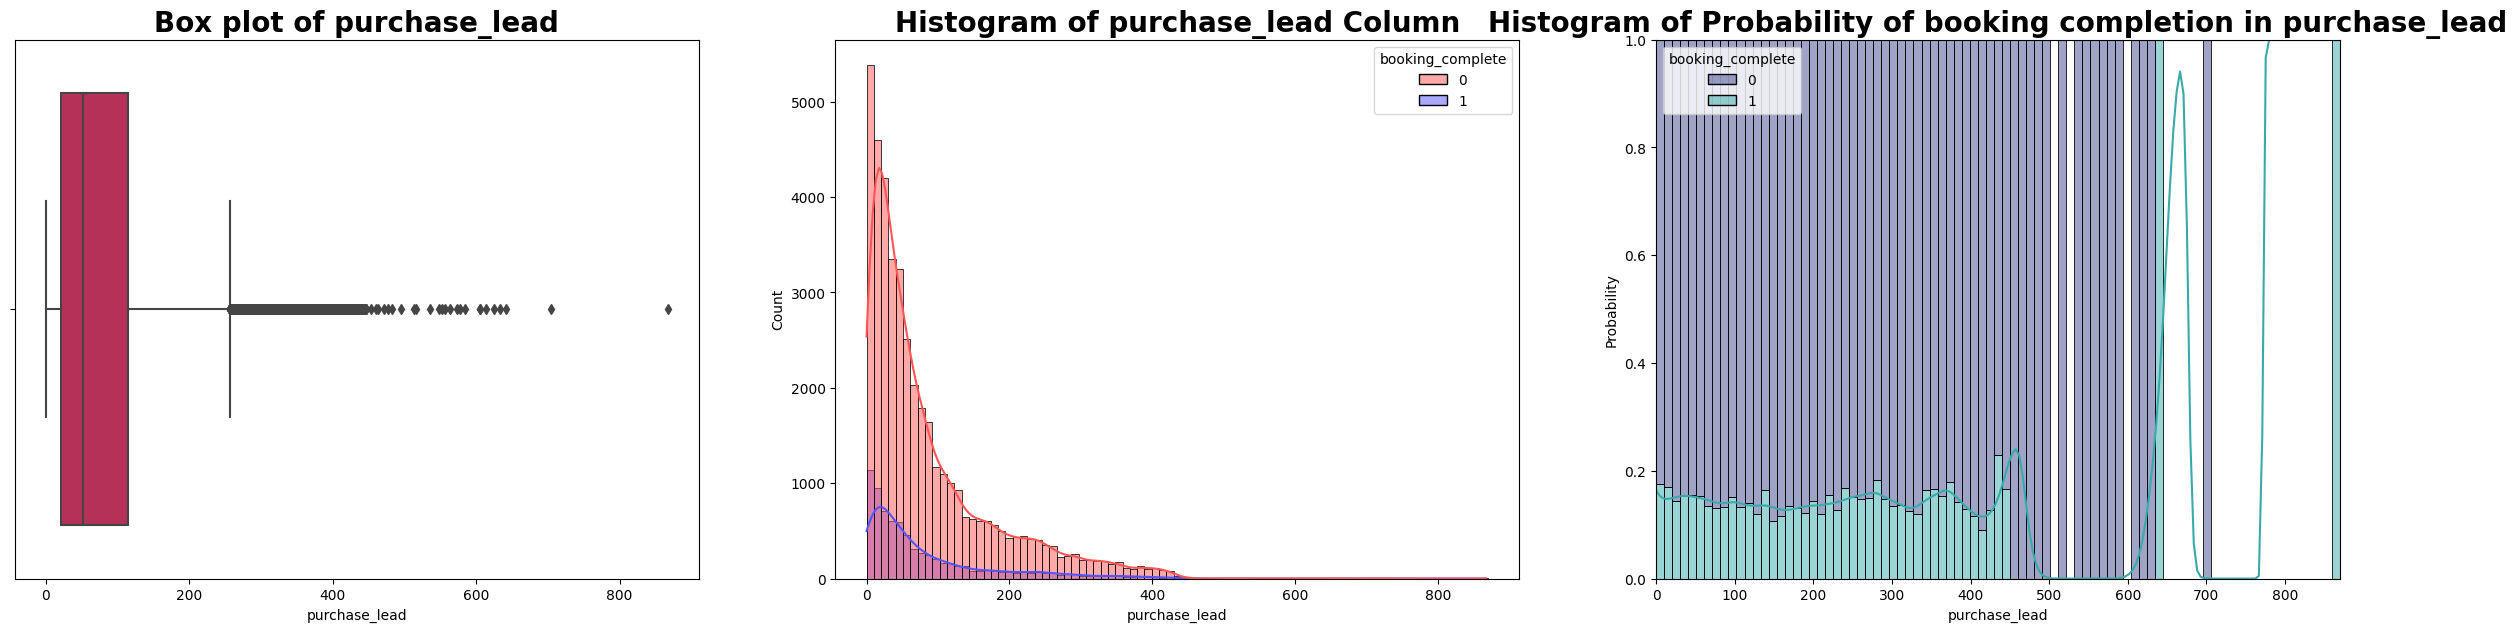

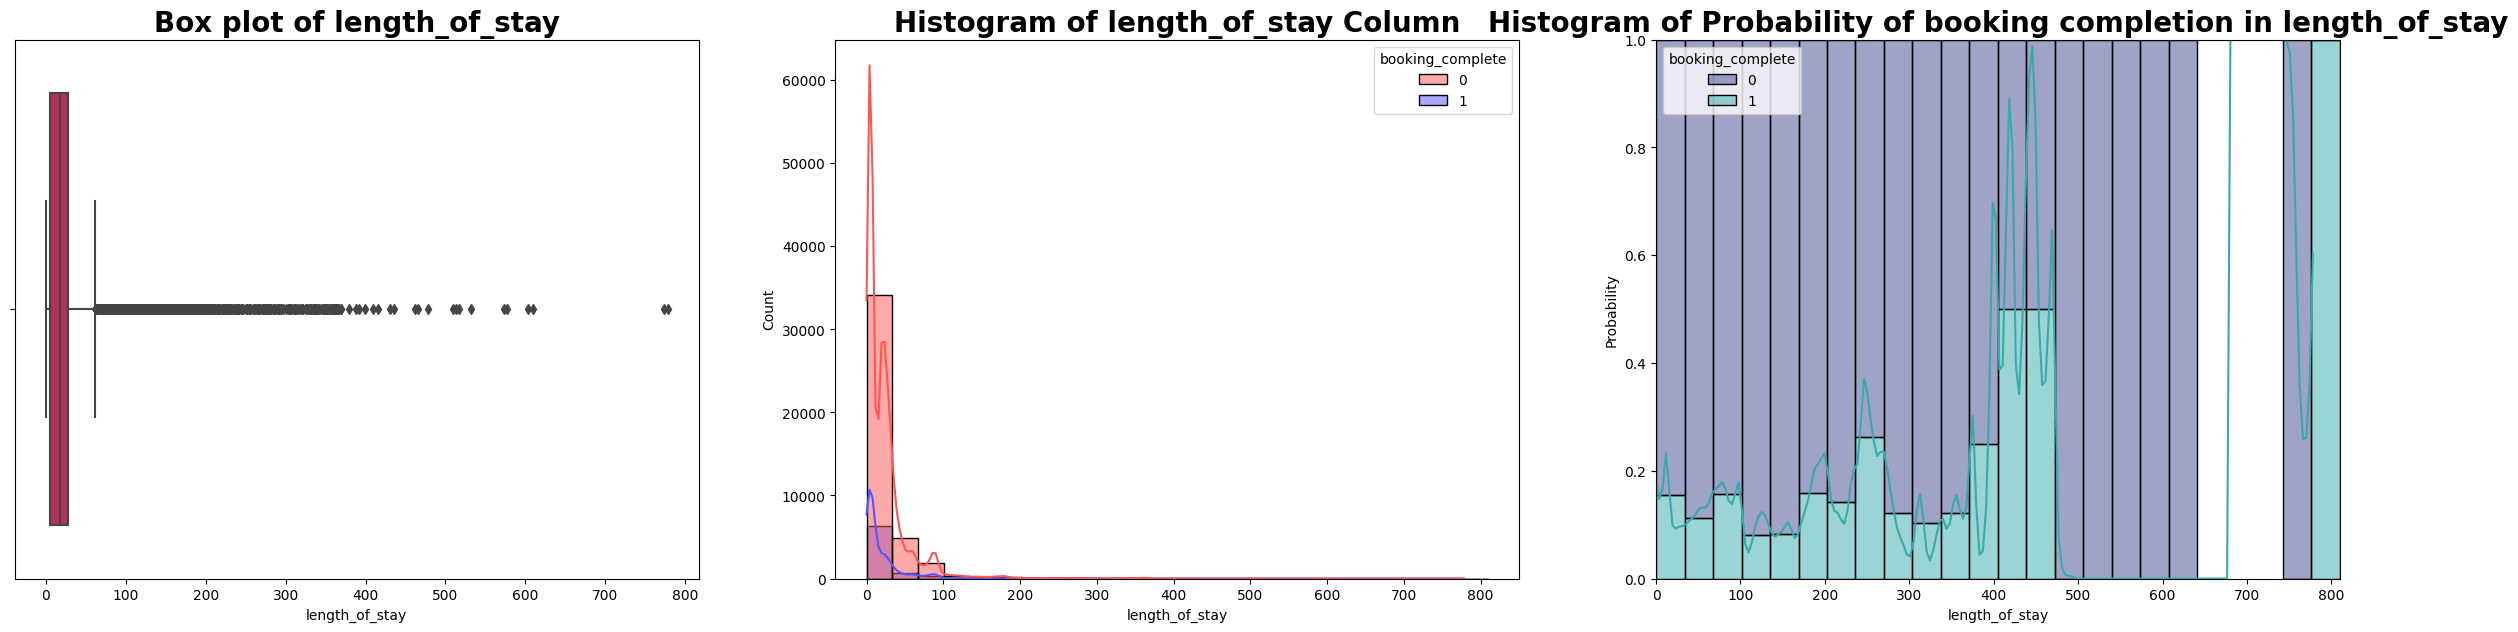

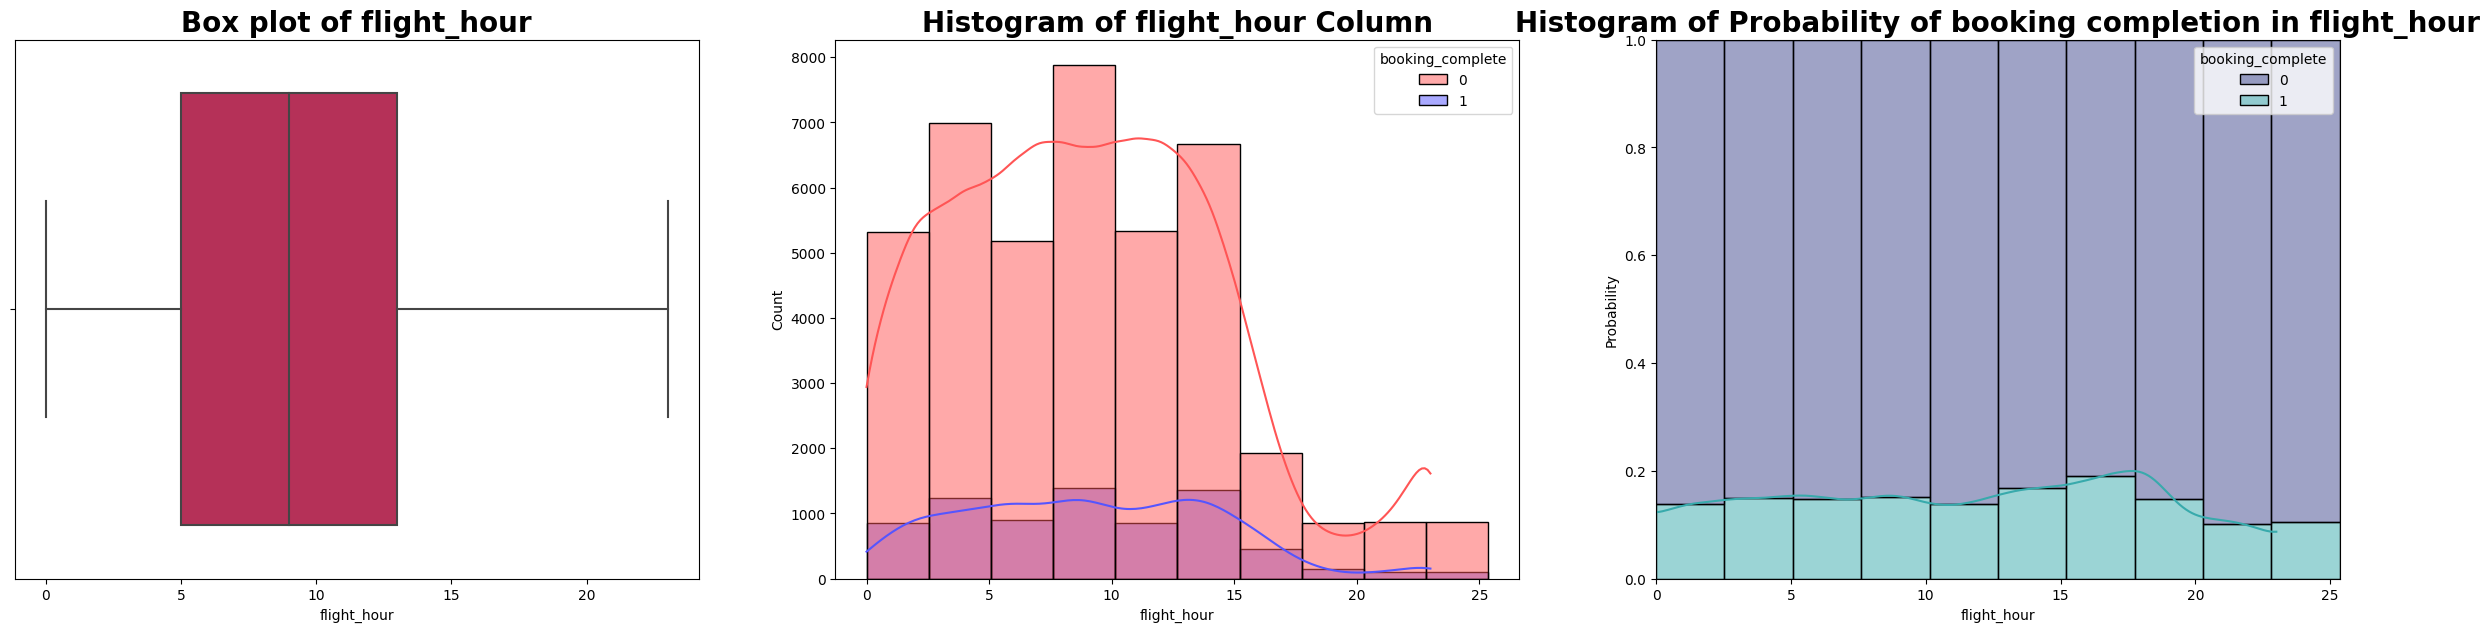

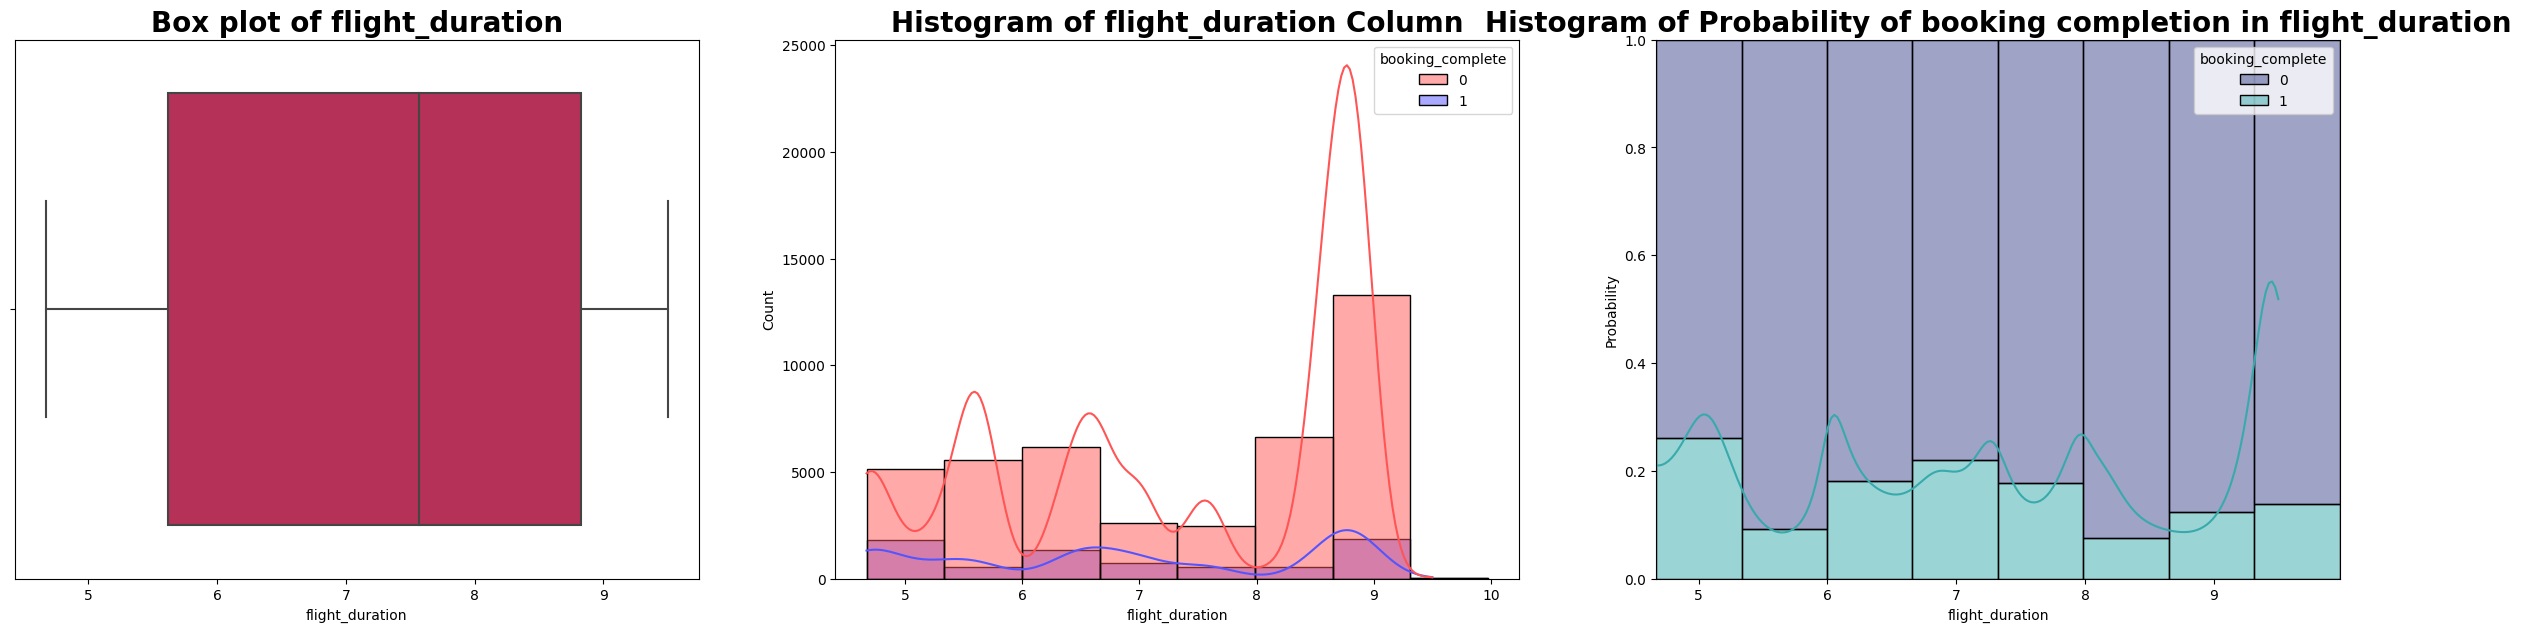

In [976]:
for x in cntns_cols[:-1]:
  clubbed_plots(data,x,'booking_complete')

In [977]:
data.corr()

purchase_lead  length_of_stay  flight_hour  flight_duration  \
purchase_lead          1.000000       -0.076747     0.035112         0.067934   
length_of_stay        -0.076747        1.000000    -0.025525         0.140408   
flight_hour            0.035112       -0.025525     1.000000        -0.003236   
flight_duration        0.067934        0.140408    -0.003236         1.000000   
booking_complete      -0.022132       -0.042080     0.006705        -0.106529   

                  booking_complete  
purchase_lead            -0.022132  
length_of_stay           -0.042080  
flight_hour               0.006705  
flight_duration          -0.106529  
booking_complete          1.000000

## **Removing Outliers**

In [978]:
def remove_outliers(data, feature):
    iqr = data[feature].quantile(0.75) - data[feature].quantile(0.25)
    upper_threshold = data[feature].quantile(0.75) + (1.5 * iqr)
    lower_threshold = data[feature].quantile(0.25) - (1.5 * iqr)

    # Create a mask to filter rows with outliers
    mask = (data[feature] <= upper_threshold) & (data[feature] >= lower_threshold)

    # Create a new DataFrame without outliers
    data_no_outliers = data[mask]

    return upper_threshold, lower_threshold, data_no_outliers


In [979]:
upper_thresh, lower_thresh, data_no_outliers = remove_outliers(data, 'purchase_lead')

In [980]:
data_no_outliers['purchase_lead'].apply(lambda x: x if x>=upper_thresh or x<=lower_thresh else None)

1       NaN
2       NaN
3       NaN
4       NaN
5       NaN
         ..
49995   NaN
49996   NaN
49997   NaN
49998   NaN
49999   NaN
Name: purchase_lead, Length: 45890, dtype: float64

In [981]:
upper_thresh, lower_thresh, data_no_outliers = remove_outliers(data_no_outliers, 'length_of_stay')

In [982]:
data_no_outliers['length_of_stay'].apply(lambda x: x if x>=upper_thresh or x<=lower_thresh else None)

1       NaN
2       NaN
3       NaN
4       NaN
5       NaN
         ..
49995   NaN
49996   NaN
49997   NaN
49998   NaN
49999   NaN
Name: length_of_stay, Length: 42499, dtype: float64

In [983]:
upper_thresh, lower_thresh, data_no_outliers = remove_outliers(data_no_outliers, 'flight_hour')
data_no_outliers['flight_hour'].apply(lambda x: x if x>=upper_thresh or x<=lower_thresh else None)

1        None
2        None
3        None
4        None
5        None
         ... 
49995    None
49996    None
49997    None
49998    None
49999    None
Name: flight_hour, Length: 42499, dtype: object

In [984]:
upper_thresh, lower_thresh, data_no_outliers = remove_outliers(data_no_outliers, 'flight_duration')
data_no_outliers['flight_duration'].apply(lambda x: x if x>=upper_thresh or x<=lower_thresh else None)

1        None
2        None
3        None
4        None
5        None
         ... 
49995    None
49996    None
49997    None
49998    None
49999    None
Name: flight_duration, Length: 42499, dtype: object

In [985]:
data_no_outliers.isnull().sum()

num_passengers           0
sales_channel            0
trip_type                0
purchase_lead            0
length_of_stay           0
flight_hour              0
flight_day               0
route                    0
booking_origin           0
wants_extra_baggage      0
wants_preferred_seat     0
wants_in_flight_meals    0
flight_duration          0
booking_complete         0
dtype: int64

In [986]:
data=data_no_outliers

## **Feature Engineering**

In [987]:
data.head()

num_passengers sales_channel  trip_type  purchase_lead  length_of_stay  \
1              1      Internet  RoundTrip            112              20   
2              2      Internet  RoundTrip            243              22   
3              1      Internet  RoundTrip             96              31   
4              2      Internet  RoundTrip             68              22   
5              1      Internet  RoundTrip              3              48   

   flight_hour flight_day   route booking_origin wants_extra_baggage  \
1            3        Sat  AKLDEL    New Zealand                   0   
2           17        Wed  AKLDEL          India                   1   
3            4        Sat  AKLDEL    New Zealand                   0   
4           15        Wed  AKLDEL          India                   1   
5           20        Thu  AKLDEL    New Zealand                   1   

  wants_preferred_seat wants_in_flight_meals  flight_duration  \
1                    0                     0             5.52   
2                    1                     0             5.52   
3                    0                     1             5.52   
4                    0                     1             5.52   
5                    0                     1             5.52   

   booking_complete  
1                 0  
2                 0  
3                 0  
4                 0  
5                 0

### Passengers



In [988]:
data.num_passengers.dtype

dtype('O')

In [989]:
data['num_passengers']=data['num_passengers'].astype('int')

In [990]:
def passengers_Size(x):
  if 0<x<=3:
    passengerSize='small'
  elif 3<x<=6:
    passengerSize='medium'
  else:
    passengerSize='big'

  return passengerSize

In [991]:
data['passengers_size']=data['num_passengers'].apply(lambda x : passengers_Size(x))

In [992]:
data.head()

num_passengers sales_channel  trip_type  purchase_lead  length_of_stay  \
1               1      Internet  RoundTrip            112              20   
2               2      Internet  RoundTrip            243              22   
3               1      Internet  RoundTrip             96              31   
4               2      Internet  RoundTrip             68              22   
5               1      Internet  RoundTrip              3              48   

   flight_hour flight_day   route booking_origin wants_extra_baggage  \
1            3        Sat  AKLDEL    New Zealand                   0   
2           17        Wed  AKLDEL          India                   1   
3            4        Sat  AKLDEL    New Zealand                   0   
4           15        Wed  AKLDEL          India                   1   
5           20        Thu  AKLDEL    New Zealand                   1   

  wants_preferred_seat wants_in_flight_meals  flight_duration  \
1                    0                     0             5.52   
2                    1                     0             5.52   
3                    0                     1             5.52   
4                    0                     1             5.52   
5                    0                     1             5.52   

   booking_complete passengers_size  
1                 0           small  
2                 0           small  
3                 0           small  
4                 0           small  
5                 0           small

In [993]:
# table=pd.pivot_table(data=this._data,values=this._target,index=x).sort_values(by=this._target)


In [994]:
pSize=pd.pivot_table(data=data,values='booking_complete',index='passengers_size').sort_values(by='booking_complete')
pSize=pSize.apply(lambda x : x*100)
pSize.style.bar(cmap='inferno')

### Purchase Lead

In [995]:
data['purchase_lead'].dtype

dtype('int64')

In [996]:
data.purchase_lead.describe()

count    42499.000000
mean        68.045436
std         62.701436
min          0.000000
25%         20.000000
50%         47.000000
75%         97.000000
max        256.000000
Name: purchase_lead, dtype: float64

In [997]:
# round(256/30)
def pLead(x):
  months=x/30
  return round(months)

print(pLead(13))

0


In [998]:
data['pLead_month']=data['purchase_lead'].apply(lambda x: pLead(x))

In [999]:
data.sample(5)


num_passengers sales_channel  trip_type  purchase_lead  length_of_stay  \
33571               1      Internet  RoundTrip             69               4   
38000               1      Internet  RoundTrip              9               5   
27850               1        Mobile  RoundTrip            248               3   
38027               1        Mobile  RoundTrip             96               5   
8584                1      Internet  RoundTrip             40              29   

       flight_hour flight_day   route booking_origin wants_extra_baggage  \
33571           13        Sat  KIXSUB      Indonesia                   0   
38000            1        Thu  HDYSYD      Australia                   1   
27850            7        Mon  HNDSIN          Japan                   0   
38027            8        Mon  HGHHKT          China                   0   
8584             8        Sat  DELPER      Australia                   1   

      wants_preferred_seat wants_in_flight_meals  flight_duration  \
33571                    0                     1             7.00   
38000                    0                     0             8.58   
27850                    0                     0             7.57   
38027                    0                     0             5.07   
8584                     1                     1             5.62   

       booking_complete passengers_size  pLead_month  
33571                 0           small            2  
38000                 0           small            0  
27850                 0           small            8  
38027                 0           small            3  
8584                  0           small            1

In [1000]:
plead_mon=pd.pivot_table(data=data,index='pLead_month',values='booking_complete').sort_values(by='booking_complete')
plead_mon=plead_mon.apply(lambda x: x*100)
plead_mon.style.bar(cmap='inferno')

# **Encoding**

### No. of Passengers

In [1001]:
data.num_passengers.unique()

array([1, 2, 3, 6, 4, 5, 9, 8, 7])

In [1006]:
data.num_passengers.dtype

dtype('O')

In [1005]:
data.num_passengers=data.num_passengers.astype(str)

In [1007]:
data['num_passengers']=data['num_passengers'].map({'2':4, '1':2, '3':5, '4':3, '6':6, '5':7, '7':2, '9':8, '8':0})

In [1008]:
data['num_passengers'].head()

1    2
2    4
3    2
4    4
5    2
Name: num_passengers, dtype: int64

### Sales Channel

In [1009]:
data['sales_channel'].unique()

array(['Internet', 'Mobile'], dtype=object)

In [1010]:
data['sales_channel']=data['sales_channel'].map({'Internet':1, 'Mobile':0})
data.sales_channel.dtype

dtype('int64')

In [1011]:
data['sales_channel'].head()

1    1
2    1
3    1
4    1
5    1
Name: sales_channel, dtype: int64

### Trip type

In [1012]:
data['trip_type'].unique()

array(['RoundTrip', 'CircleTrip', 'OneWay'], dtype=object)

In [1013]:
data['trip_type']=data['trip_type'].map({'RoundTrip':2, 'CircleTrip':0, 'OneWay':1})
data.trip_type.dtype

dtype('int64')

In [1014]:
data['trip_type'].head()

1    2
2    2
3    2
4    2
5    2
Name: trip_type, dtype: int64

### Flight day

In [1015]:
data["flight_day"].unique()

array(['Sat', 'Wed', 'Thu', 'Mon', 'Tue', 'Fri', 'Sun'], dtype=object)

In [1016]:
data['flight_day']=data['flight_day'].map({'Sat':3, 'Wed':6, 'Thu':5, 'Mon':4, 'Sun':0, 'Tue':2, 'Fri':1})
data.flight_day.dtype

dtype('int64')

In [1017]:
data['flight_day'].head()

1    3
2    6
3    3
4    6
5    5
Name: flight_day, dtype: int64

### Extra Baggage

In [1018]:
data.wants_extra_baggage.dtype


dtype('O')

In [1019]:
data['wants_extra_baggage']=data['wants_extra_baggage'].map({'1':1,'0':0})
data.wants_extra_baggage.dtype

dtype('int64')

In [1020]:
data['wants_extra_baggage'].head()

1    0
2    1
3    0
4    1
5    1
Name: wants_extra_baggage, dtype: int64

### Preferred Seat

In [1021]:
data.wants_preferred_seat.dtype

dtype('O')

In [1022]:
data['wants_preferred_seat']=data['wants_preferred_seat'].map({'1':1,'0':0})
data.wants_preferred_seat

1        0
2        1
3        0
4        0
5        0
        ..
49995    0
49996    0
49997    0
49998    0
49999    1
Name: wants_preferred_seat, Length: 42499, dtype: int64

### Meals

In [1023]:
data.wants_in_flight_meals.dtype


dtype('O')

In [1024]:
data['wants_in_flight_meals']=data['wants_in_flight_meals'].map({'1':1,'0':0})
data.wants_in_flight_meals.dtype

dtype('int64')

In [1025]:
data['wants_in_flight_meals']

1        0
2        0
3        1
4        1
5        1
        ..
49995    1
49996    0
49997    1
49998    1
49999    0
Name: wants_in_flight_meals, Length: 42499, dtype: int64

### Passengers' size

In [1026]:
data.passengers_size.dtype


dtype('O')

In [1027]:
data['passengers_size']=data['passengers_size'].map({'small':0,'big':1,'medium':2})
data.passengers_size.dtype

dtype('int64')

In [1028]:
data['passengers_size'].unique()

array([0, 2, 1])

### Booking Completed

In [1029]:
data.booking_complete.unique()

array([0, 1])

In [620]:
# data['booking_complete']=data['booking_complete'].map({'0':0,'1':1})

### Purchase Lead by Month

In [1031]:
data.pLead_month.dtype

dtype('int64')

# **Target and Feature Selection**

In [1032]:
data.columns

Index(['num_passengers', 'sales_channel', 'trip_type', 'purchase_lead',
       'length_of_stay', 'flight_hour', 'flight_day', 'route',
       'booking_origin', 'wants_extra_baggage', 'wants_preferred_seat',
       'wants_in_flight_meals', 'flight_duration', 'booking_complete',
       'passengers_size', 'pLead_month'],
      dtype='object')

In [1033]:
features=list(data.columns)
features.remove('num_passengers')
features.remove('purchase_lead')
features.remove('route')
features.remove('booking_origin')
target=features[features.index('booking_complete')]
features.remove('booking_complete')
print(f"Features: {features}, Target: {target}")

Features: ['sales_channel', 'trip_type', 'length_of_stay', 'flight_hour', 'flight_day', 'wants_extra_baggage', 'wants_preferred_seat', 'wants_in_flight_meals', 'flight_duration', 'passengers_size', 'pLead_month'], Target: booking_complete


In [1034]:
x=data[features]
y=data[target]

In [1035]:
y.unique()

array([0, 1])

# **Splitting and Balancing**

## **Splitting**

In [1036]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,stratify=y,random_state=38)


In [1037]:
x_train.shape

(31874, 11)

In [1038]:
y_train.shape

(31874,)

In [1039]:
x.head()

sales_channel  trip_type  length_of_stay  flight_hour  flight_day  \
1              1          2              20            3           3   
2              1          2              22           17           6   
3              1          2              31            4           3   
4              1          2              22           15           6   
5              1          2              48           20           5   

   wants_extra_baggage  wants_preferred_seat  wants_in_flight_meals  \
1                    0                     0                      0   
2                    1                     1                      0   
3                    0                     0                      1   
4                    1                     0                      1   
5                    1                     0                      1   

   flight_duration  passengers_size  pLead_month  
1             5.52                0            4  
2             5.52                0            8  
3             5.52                0            3  
4             5.52                0            2  
5             5.52                0            0

## **Balancing**

In [1040]:
from imblearn.combine import SMOTEENN
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score

smt=SMOTEENN(sampling_strategy="all")
x_train_smt,y_train_smt=smt.fit_resample(x_train,y_train)

In [1041]:
x_train_smt.shape

(37114, 11)

In [1042]:
log_reg_4 = LogisticRegression()
log_reg_4.fit(x_train_smt,y_train_smt)
log_reg_4.score(x_train_smt,y_train_smt)

0.6875033680012933

# **Modeling**

## Logistic Regression

In [1043]:
from sklearn.linear_model import LogisticRegression

log_reg=LogisticRegression()
log_reg.fit(x_train_smt,y_train_smt)

y_pred=log_reg.predict(x_test)

In [1044]:
y_pred

array([1, 1, 1, ..., 1, 0, 1])

In [1045]:
log_reg.predict_proba(x_test) # Predcting the probabilities of x_test


array([[0.23759548, 0.76240452],
       [0.20597072, 0.79402928],
       [0.22888594, 0.77111406],
       ...,
       [0.48811466, 0.51188534],
       [0.56901468, 0.43098532],
       [0.22976224, 0.77023776]])

In [1046]:
log_reg.coef_


array([[ 0.20695171,  1.11246947, -0.02955785,  0.00289354, -0.04032198,
         0.55667689, -0.12078076, -0.20959446, -0.26916649, -0.22107997,
        -0.10067315]])

In [1047]:
from sklearn.metrics import accuracy_score,f1_score,roc_auc_score,confusion_matrix
score_Acc = accuracy_score(y_test,y_pred)
score_F1 = f1_score(y_test,y_pred,)
AUROC_log_reg=roc_auc_score(y_test,log_reg.predict_proba(x_test)[:,1])
cm = confusion_matrix(y_test,y_pred)

print("Accuracy:",score_Acc,"\tF1 Score:",score_F1,"\tAUROC Score:",AUROC_log_reg,"\nConfusion Matrix: ",cm)

Accuracy: 0.34748235294117646 	F1 Score: 0.2894332274264631 	AUROC Score: 0.6274540964405304 
Confusion Matrix:  [[2280 6741]
 [ 192 1412]]


<Axes: title={'center': 'Confusion Matrix_Logistice Regression Model'}>

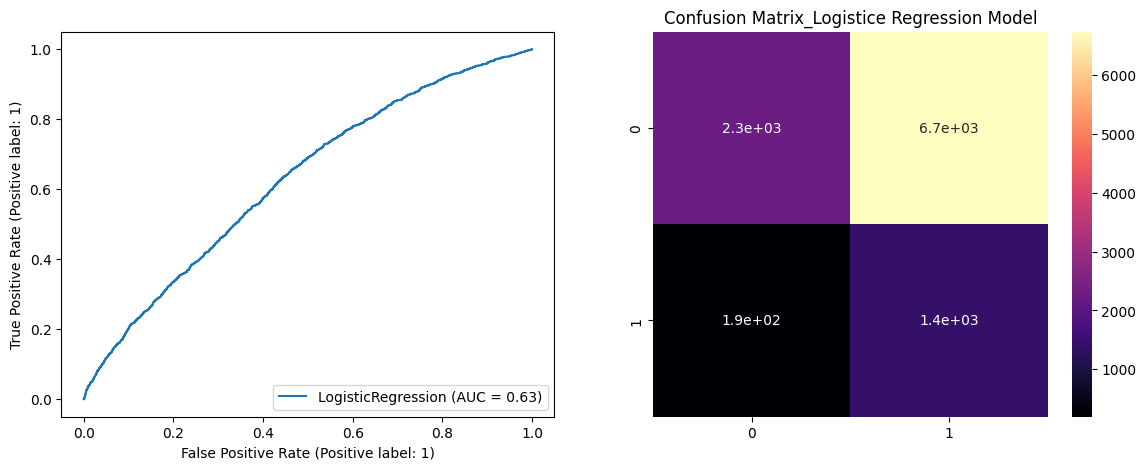

In [1048]:
from sklearn.metrics import RocCurveDisplay

fig,axes=plt.subplots(1,2,figsize=(14,5))

roc_Curve=RocCurveDisplay.from_estimator(log_reg, x_test, y_test,ax=axes[0])
plt.title("Confusion Matrix_Logistice Regression Model")
sns.heatmap(cm,annot=True,cmap='magma',ax=axes[1])

## RF

In [1049]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100,criterion="entropy")
rf.fit(x_train_smt, y_train_smt)
y_pred = rf.predict(x_test)
y_pred

array([1, 0, 0, ..., 0, 0, 1])

In [1050]:
F1_Score_rfc=f1_score(y_test,y_pred)
accuracy_rfc=accuracy_score(y_test,y_pred)

AUROC_rf=roc_auc_score( y_test, rf.predict_proba(x_test)[:, 1])

print("accuracy score: ",accuracy_rfc)
print("F1 score: ",F1_Score_rfc)
print( "AUROC score : ",roc_auc_score( y_test, rf.predict_proba(x_test)[:, 1]))

accuracy score:  0.6566588235294117
F1 score:  0.3241941459799926
AUROC score :  0.6407185533561064


<Axes: title={'center': 'Confusion Matrix_Random Forest Model'}>

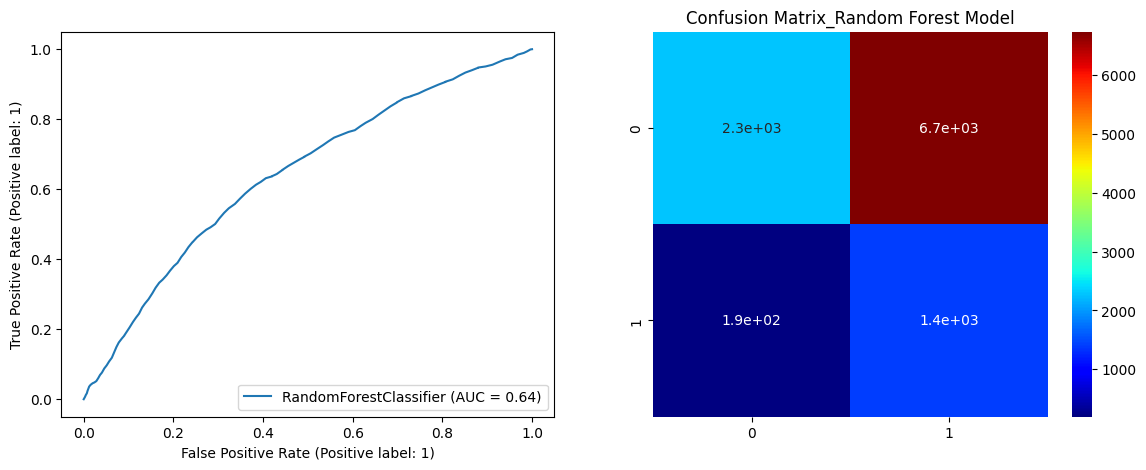

In [1051]:
from sklearn.metrics import RocCurveDisplay

fig,axes=plt.subplots(1,2,figsize=(14,5))

roc_Curve=RocCurveDisplay.from_estimator(rf, x_test, y_test,ax=axes[0])
plt.title("Confusion Matrix_Random Forest Model")
sns.heatmap(cm,annot=True,cmap='jet',ax=axes[1])

## XGB

In [1052]:
import xgboost as xgb
from sklearn.model_selection import cross_val_score
import numpy as np

for lr in [0.01,0.02,0.03,0.04,0.05,0.1,0.11,0.12,0.13,0.14,0.15,0.2,0.5,0.7,1]:
  model_xgb = xgb.XGBClassifier(learning_rate = lr, n_estimators=100, verbosity = 0) # initialise the model model.fit(X_smt,y_smt) #train the model
  print("Learning rate : ", lr," Cross-Val score : ", np.mean(cross_val_score(model_xgb, x_train, y_train, cv=10)))

Learning rate :  0.01  Cross-Val score :  0.8490305660661116
Learning rate :  0.02  Cross-Val score :  0.848967830808897
Learning rate :  0.03  Cross-Val score :  0.8488737180807066
Learning rate :  0.04  Cross-Val score :  0.8487795955101477
Learning rate :  0.05  Cross-Val score :  0.8483090121844586
Learning rate :  0.1  Cross-Val score :  0.8479011247465097
Learning rate :  0.11  Cross-Val score :  0.8473991541074761
Learning rate :  0.12  Cross-Val score :  0.8470854286095607
Learning rate :  0.13  Cross-Val score :  0.8471795413377512
Learning rate :  0.14  Cross-Val score :  0.8471796003919625
Learning rate :  0.15  Cross-Val score :  0.8469599088832886
Learning rate :  0.2  Cross-Val score :  0.8459246393460887
Learning rate :  0.5  Cross-Val score :  0.8379873005886918
Learning rate :  0.7  Cross-Val score :  0.8313988584427247
Learning rate :  1  Cross-Val score :  0.8213278024471278


In [1053]:
from sklearn.metrics import roc_curve, roc_auc_score, confusion_matrix, f1_score
model_xgb = xgb.XGBClassifier(learning_rate = 0.12, n_estimators=100, verbosity = 0)
model_xgb.fit(x_train_smt,y_train_smt)

AUROC_xgb=roc_auc_score( y_test, model_xgb.predict_proba(x_test)[:, 1])

print("Accuracy: ",model_xgb.score(x_test,y_test),"\nAUROC score:",roc_auc_score( y_test, model_xgb.predict_proba(x_test)[:, 1]))

Accuracy:  0.5965176470588235 
AUROC score: 0.656117576582875


In [1054]:
from sklearn.metrics import roc_curve, roc_auc_score, confusion_matrix, f1_score
model_xgb = xgb.XGBClassifier()
model_xgb.fit(x_train_smt,y_train_smt)

AUROC_xgb=roc_auc_score( y_test, model_xgb.predict_proba(x_test)[:, 1])

print("Accuracy: ",model_xgb.score(x_test,y_test),"\nAUROC score:",roc_auc_score( y_test, model_xgb.predict_proba(x_test)[:, 1]))

Accuracy:  0.6311529411764706 
AUROC score: 0.648730649542865


<Axes: title={'center': 'Confusion Matrix_XG Boost Model'}>

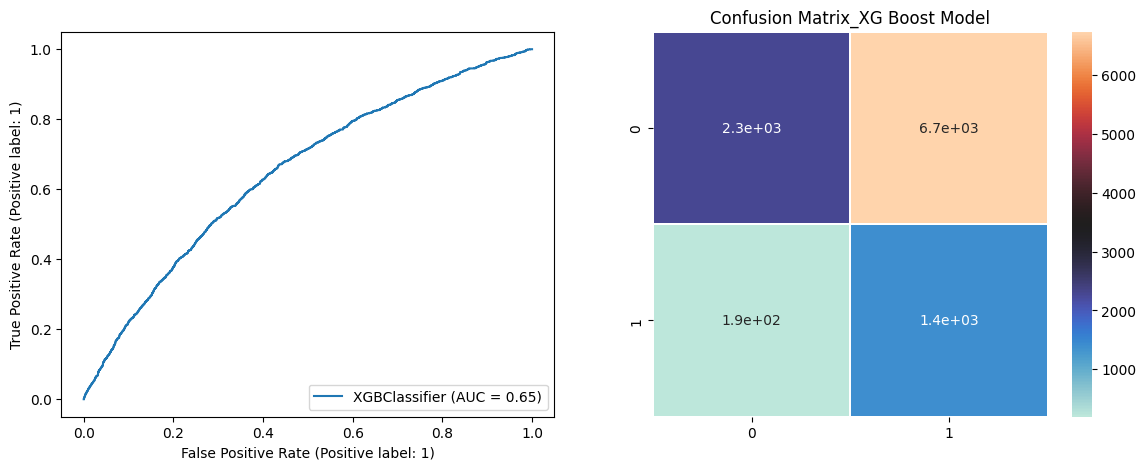

In [1055]:
from sklearn.metrics import RocCurveDisplay

fig,axes=plt.subplots(1,2,figsize=(14,5))

roc_Curve=RocCurveDisplay.from_estimator(model_xgb, x_test, y_test,ax=axes[0])
plt.title("Confusion Matrix_XG Boost Model")
sns.heatmap(cm,annot=True,cmap='icefire',ax=axes[1],linewidth=0.1)